In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Mastery_Project/'

Mounted at /content/drive


# EDA

## Hotels dataframe

### Loading df


In [ ]:
df_hotels = pd.read_csv(base_path +"Hotels.csv")

In [ ]:
df_hotels.head()

trip_id                hotel_name  nights  \
0  582979-5475b9940ee240bf9328a0cc0bc9900c        NH Hotel  - ottawa       6   
1  514785-863ac3b4eb984f1eb226d67955623a5d  Choice Hotels - montreal       3   
2  588386-233db0f627cf4aaaaeaa9a632daa5ec4      Accor - philadelphia       1   
3  600395-79e934e3dcf2462587a0beffbebd6783       Marriott  - memphis       1   
4  474120-a87f749cf54b4f4ca9262d07080a06b2     Accor - san francisco       4   

   rooms            check_in_time       check_out_time  hotel_per_room_usd  
0      1   2023-03-31 13:32:21.03  2023-04-07 11:00:00                 110  
1      1    2023-06-21 20:06:24.3  2023-06-25 11:00:00                  87  
2      1  2023-04-04 10:43:44.175  2023-04-05 11:00:00                 126  
3      2    2023-04-21 15:58:28.2  2023-04-23 11:00:00                 153  
4      2  2023-02-02 14:18:11.205  2023-02-07 11:00:00                 346

In [ ]:
df_hotels.dtypes

trip_id               object
hotel_name            object
nights                 int64
rooms                  int64
check_in_time         object
check_out_time        object
hotel_per_room_usd     int64
dtype: object

In [ ]:
#df_hotels.columns

In [ ]:
df_hotels.info() #good to see ow many no-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trip_id             13772 non-null  object
 1   hotel_name          13772 non-null  object
 2   nights              13772 non-null  int64 
 3   rooms               13772 non-null  int64 
 4   check_in_time       13772 non-null  object
 5   check_out_time      13772 non-null  object
 6   hotel_per_room_usd  13772 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 753.3+ KB


In [ ]:
df_hotels.isnull().sum()

trip_id               0
hotel_name            0
nights                0
rooms                 0
check_in_time         0
check_out_time        0
hotel_per_room_usd    0
dtype: int64

In [ ]:
print(df_hotels['check_in_time'].unique())

['2023-03-31 13:32:21.03' '2023-06-21 20:06:24.3'
 '2023-04-04 10:43:44.175' ... '2023-04-13 11:40:58.35'
 '2024-01-24 09:54:31.635' '2023-07-05 17:42:22.545']


In [ ]:
#convert columns with date in datetype
date_columns = ['check_in_time', 'check_out_time']

# Convert the columns to datetime
for column in date_columns:
    df_hotels[column] = pd.to_datetime(df_hotels[column], format='mixed')
# Verify the data types after conversion
df_hotels.dtypes


trip_id                       object
hotel_name                    object
nights                         int64
rooms                          int64
check_in_time         datetime64[ns]
check_out_time        datetime64[ns]
hotel_per_room_usd             int64
dtype: object

In [ ]:
 df_hotels['check_in_time']

0       2023-03-31 13:32:21.030
1       2023-06-21 20:06:24.300
2       2023-04-04 10:43:44.175
3       2023-04-21 15:58:28.200
4       2023-02-02 14:18:11.205
                  ...          
13767   2023-02-23 17:25:07.185
13768   2023-04-02 12:25:51.465
13769   2023-04-13 11:40:58.350
13770   2024-01-24 09:54:31.635
13771   2023-07-05 17:42:22.545
Name: check_in_time, Length: 13772, dtype: datetime64[ns]

In [ ]:
df_hotels.describe()

nights         rooms                  check_in_time  \
count  13772.000000  13772.000000                          13772   
mean       3.616250      1.195396  2023-04-05 18:44:13.492212480   
min       -2.000000      1.000000            2023-01-08 11:00:00   
25%        1.000000      1.000000  2023-02-16 09:59:15.157500160   
50%        2.000000      1.000000            2023-03-22 11:00:00   
75%        5.000000      1.000000  2023-05-15 12:20:50.043749888   
max       43.000000      4.000000     2024-07-17 00:33:41.625000   
std        3.758377      0.499596                            NaN   

                      check_out_time  hotel_per_room_usd  
count                          13772        13772.000000  
mean   2023-04-09 20:58:48.899215872          178.147401  
min              2023-01-10 11:00:00           17.000000  
25%              2023-02-20 11:00:00           99.000000  
50%              2023-03-26 11:00:00          148.000000  
75%              2023-05-19 11:00:00          223.000000  
max              2024-07-29 11:00:00         1376.000000  
std                              NaN          119.019998

nights has negative value

### Fix negative nights values

In [ ]:
#checking the negative nights
df_hotels[df_hotels['nights'] < 0][['check_in_time', 'check_out_time', 'nights']]


check_in_time      check_out_time  nights
93    2023-02-04 12:58:18.750 2023-02-04 11:00:00      -1
275   2023-04-12 12:22:57.855 2023-04-12 11:00:00      -1
331   2023-03-05 15:39:45.180 2023-03-05 11:00:00      -1
386   2023-02-05 22:15:56.520 2023-02-05 11:00:00      -1
565   2023-03-25 12:18:46.935 2023-03-25 11:00:00      -1
...                       ...                 ...     ...
12332 2023-05-20 13:46:41.160 2023-05-20 11:00:00      -1
12738 2023-01-20 19:18:09.990 2023-01-20 11:00:00      -1
13132 2023-01-27 21:33:36.180 2023-01-27 11:00:00      -1
13145 2023-04-29 14:40:43.050 2023-04-29 11:00:00      -1
13212 2023-01-16 20:56:32.325 2023-01-16 11:00:00      -1

[101 rows x 3 columns]

In [ ]:
#Calculate the nights again as new_nights from checkout_time - checkin_time (days)
df_hotels['new_nights'] = (df_hotels['check_out_time'] - df_hotels['check_in_time']).dt.days
# Only fix truly negative values (keep 0 as 0)
df_hotels['new_nights'] = df_hotels['new_nights'].apply(lambda x: max(1, x) if x < 1 else x)

In [ ]:
# Check if the 'nights' column is still exists after dropping
if 'nights' in df_hotels.columns:
    df_hotels = df_hotels.drop(columns='nights')
else:
    print("Column 'nights' not found in the DataFrame.")

In [ ]:
df_hotels.describe()

rooms                  check_in_time  \
count  13772.000000                          13772   
mean       1.195396  2023-04-05 18:44:13.492212480   
min        1.000000            2023-01-08 11:00:00   
25%        1.000000  2023-02-16 09:59:15.157500160   
50%        1.000000            2023-03-22 11:00:00   
75%        1.000000  2023-05-15 12:20:50.043749888   
max        4.000000     2024-07-17 00:33:41.625000   
std        0.499596                            NaN   

                      check_out_time  hotel_per_room_usd    new_nights  
count                          13772        13772.000000  13772.000000  
mean   2023-04-09 20:58:48.899215872          178.147401      3.654879  
min              2023-01-10 11:00:00           17.000000      1.000000  
25%              2023-02-20 11:00:00           99.000000      1.000000  
50%              2023-03-26 11:00:00          148.000000      2.000000  
75%              2023-05-19 11:00:00          223.000000      5.000000  
max              2024-07-29 11:00:00         1376.000000     43.000000  
std                              NaN          119.019998      3.676804

### Check in/out frequency/ heatmap

In [ ]:

df_hotels['check_in_monthofyear'] = df_hotels['check_in_time'].dt.month
df_hotels['check_in_hour'] = df_hotels['check_in_time'].dt.hour


df_hotels['check_out_monthofyear'] = df_hotels['check_out_time'].dt.month
df_hotels['check_out_hour'] = df_hotels['check_out_time'].dt.hour

In [ ]:
df_hotels['check_in_hour']

0        13
1        20
2        10
3        15
4        14
         ..
13767    17
13768    12
13769    11
13770     9
13771    17
Name: check_in_hour, Length: 13772, dtype: int32

In [ ]:
# plot for check_in
df_hotels.groupby([ 'check_in_hour', 'check_in_monthofyear']).size().unstack(fill_value=0)

check_in_monthofyear   1    2    3    4    5    6    7   8   9   10  11  12
check_in_hour                                                              
0                       2    1    2    1    2    1    1   0   2   2   0   1
1                       5    1    0    0    0    0    0   0   0   2   0   1
2                       4    2    1    1    1    1    2   1   3   1   2   2
3                       1    0    2    0    1    0    0   0   2   0   0   1
4                       2    3    3    0    0    0    0   0   0   0   0   1
5                       2    0    2    0    0    0    0   0   1   0   0   0
6                       0    1    1    0    0    1    0   0   0   0   0   1
7                       0    0    1    1    1    0    0   0   0   1   0   1
8                       0    0    0    2    0    0    0   0   1   2   0   0
9                      97  190  180  112   83   74   73   0   0   3   0   1
10                    151  215  204  139  113   80  106   1   0   3   3   0
11                    447  762  792  499  370  355  330  12   2   2   1   0
12                    158  283  265  161  136  103   93   1   1   0   2   1
13                    190  338  287  181  139  124  125   0   0   1   4   1
14                    125  216  204  122   97   74   85   0   2   0   2   0
15                    131  188  191  109   81   63   86   3   0   2   1   0
16                     90  193  145  111   79   70   71   1   0   1   1   2
17                    107  163  185  120   81   73   65   0   1   0   2   1
18                     97  214  171  117   81   67   85   0   0   0   0   0
19                     83  120  118   90   62   68   67   0   0   0   1   1
20                     58  100   93   61   45   38   33   3   0   1   0   2
21                     35   64   60   38   28   19   30   2   0   0   0   0
22                     23   33   38   21   17   14   24   0   0   1   1   1
23                      4    8    6    3    2    0    2   0   0   1   3   0

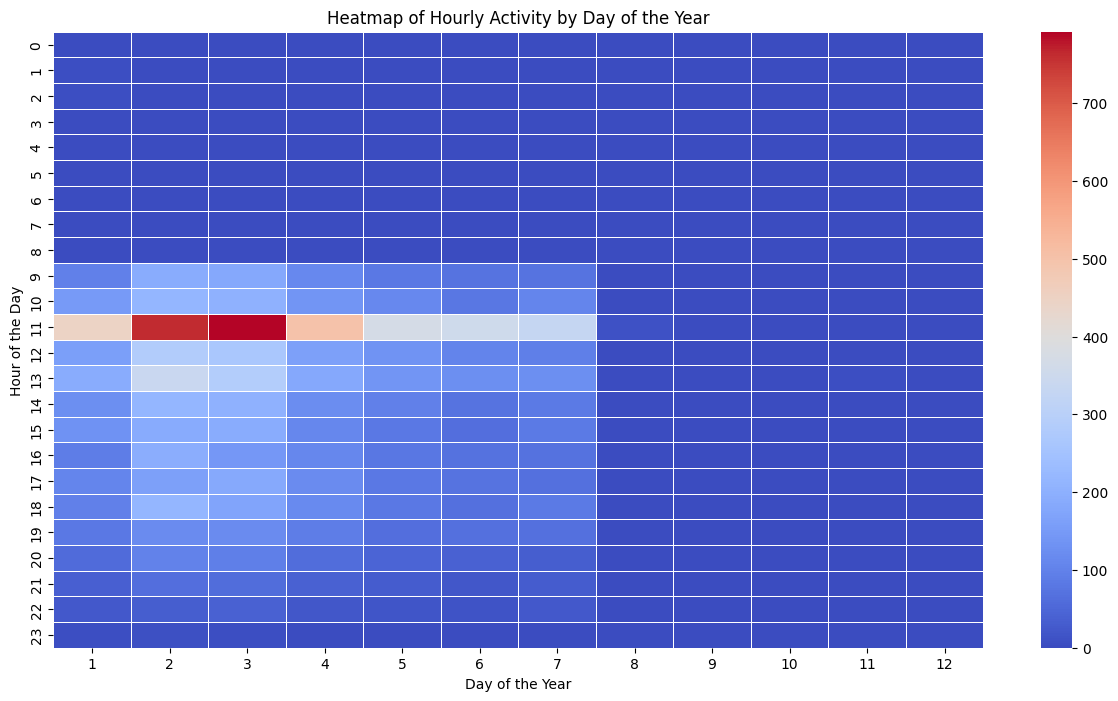

In [ ]:
#heatmap by day of the year and hour
heatmap_data = df_hotels.groupby([ 'check_in_hour', 'check_in_monthofyear']).size().unstack(fill_value=0)

# Plot heatmap using Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Heatmap of Hourly Activity by Day of the Year")
plt.xlabel("Day of the Year")
plt.ylabel("Hour of the Day")
plt.show()

In [ ]:
# plot for check_out
df_hotels.groupby([ 'check_out_hour', 'check_out_monthofyear']).size().unstack(fill_value=0)

check_out_monthofyear    1     2     3     4     5     6     7    8   9   10  \
check_out_hour                                                                 
11                     1415  3106  2970  2052  1447  1251  1321  138   9  24   

check_out_monthofyear  11  12  
check_out_hour                 
11                     23  16

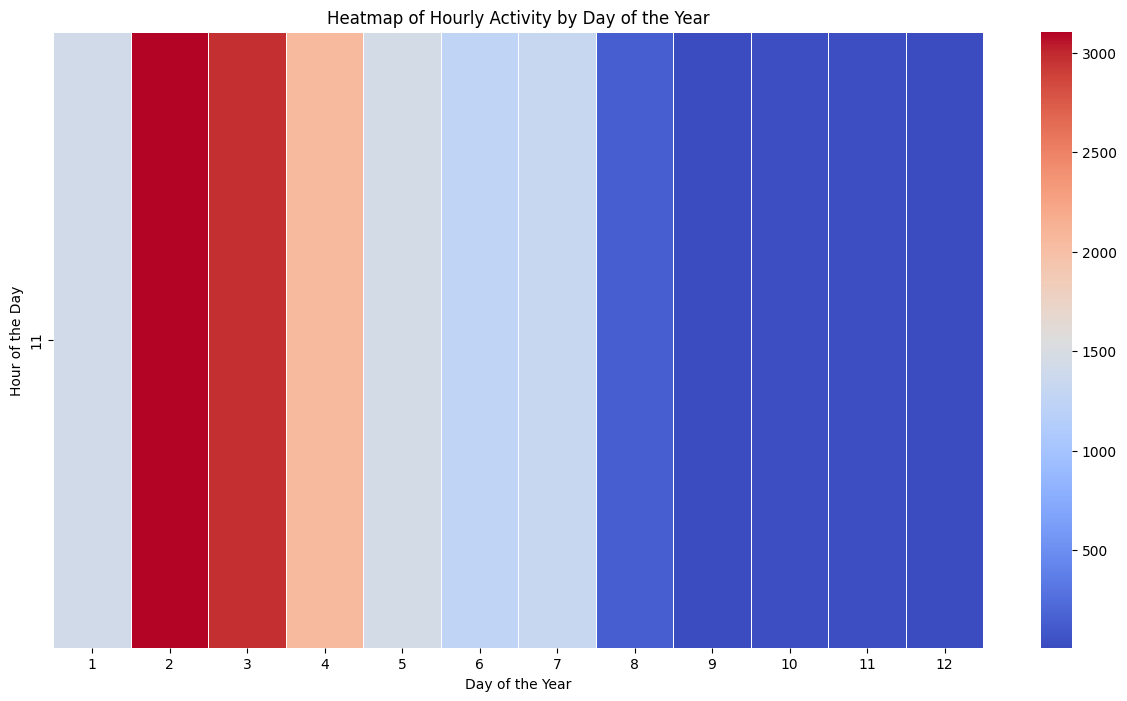

In [ ]:
#heatmap by day of the year and hour
heatmap_data = df_hotels.groupby([ 'check_out_hour', 'check_out_monthofyear']).size().unstack(fill_value=0)

# Plot heatmap using Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Heatmap of Hourly Activity by Day of the Year")
plt.xlabel("Day of the Year")
plt.ylabel("Hour of the Day")
plt.show()

the most frequent period for check in and check out is february.

### Count of n Check in / check out in timeline

In [ ]:
df_hotels['check_in_time'] = pd.to_datetime(df_hotels['check_in_time'], errors='coerce')
# Estrai il giorno dal check_in_time
df_hotels['check_in_time'] = df_hotels['check_in_time'].dt.date

# Conta quanti check-in ci sono al giorno, includendo anche i NaN
check_in_count_per_day = df_hotels['check_in_time'].value_counts(dropna=False).sort_index()

# Crea una tabella che mostra i valori validi e NaN per ogni giorno
check_in_summary = check_in_count_per_day.reset_index()
check_in_summary.columns = ['Day', 'Number of check in']

# Mostra i primi 10 valori della tabella
check_in_summary


Day  Number of check in
0    2023-01-08                   4
1    2023-01-09                  10
2    2023-01-10                  18
3    2023-01-11                  27
4    2023-01-12                  39
..          ...                 ...
350  2024-07-03                   1
351  2024-07-06                   1
352  2024-07-10                   2
353  2024-07-12                   1
354  2024-07-17                   1

[355 rows x 2 columns]

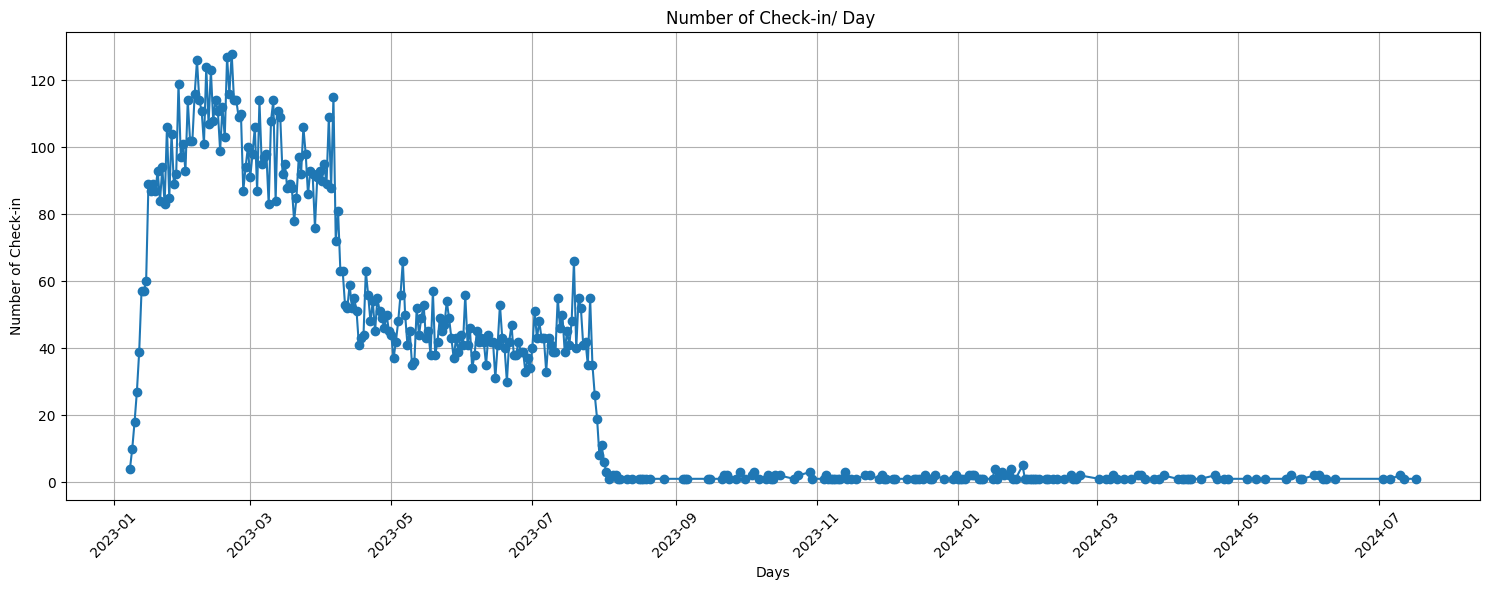

In [ ]:
import matplotlib.pyplot as plt

# Assicurati che check_in_time sia in datetime
df_hotels['check_in_time'] = pd.to_datetime(df_hotels['check_in_time'], errors='coerce')

# Rimuovi i NaN
valid_checkin_df = df_hotels[df_hotels['check_in_time'].notna()]

# Estrai la data (senza ora)
valid_checkin_df['check_in_date'] = valid_checkin_df['check_in_time'].dt.date

# Conta i check-in per giorno
checkin_counts = valid_checkin_df['check_in_date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
plt.plot(checkin_counts.index, checkin_counts.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Number of Check-in')
plt.title('Number of Check-in/ Day ')
plt.grid(True)
plt.tight_layout()
plt.show()


let´s do the same with check out

In [ ]:
import matplotlib.pyplot as plt

# Assicurati che check_out_time sia in datetime
df_hotels['check_out_time'] = pd.to_datetime(df_hotels['check_out_time'], errors='coerce')

# Rimuovi i NaN
valid_checkout_df = df_hotels[df_hotels['check_out_time'].notna()]

# Estrai la data (senza ora)
valid_checkout_df['check_out_date'] = valid_checkout_df['check_out_time'].dt.date

# Conta i check-out per giorno
checkout_counts = valid_checkout_df['check_out_date'].value_counts().sort_index()
checkout_counts

check_out_date
2023-01-10     2
2023-01-12    11
2023-01-13    15
2023-01-14    37
2023-01-15    37
              ..
2024-07-14     1
2024-07-18     1
2024-07-25     1
2024-07-27     1
2024-07-29     1
Name: count, Length: 364, dtype: int64

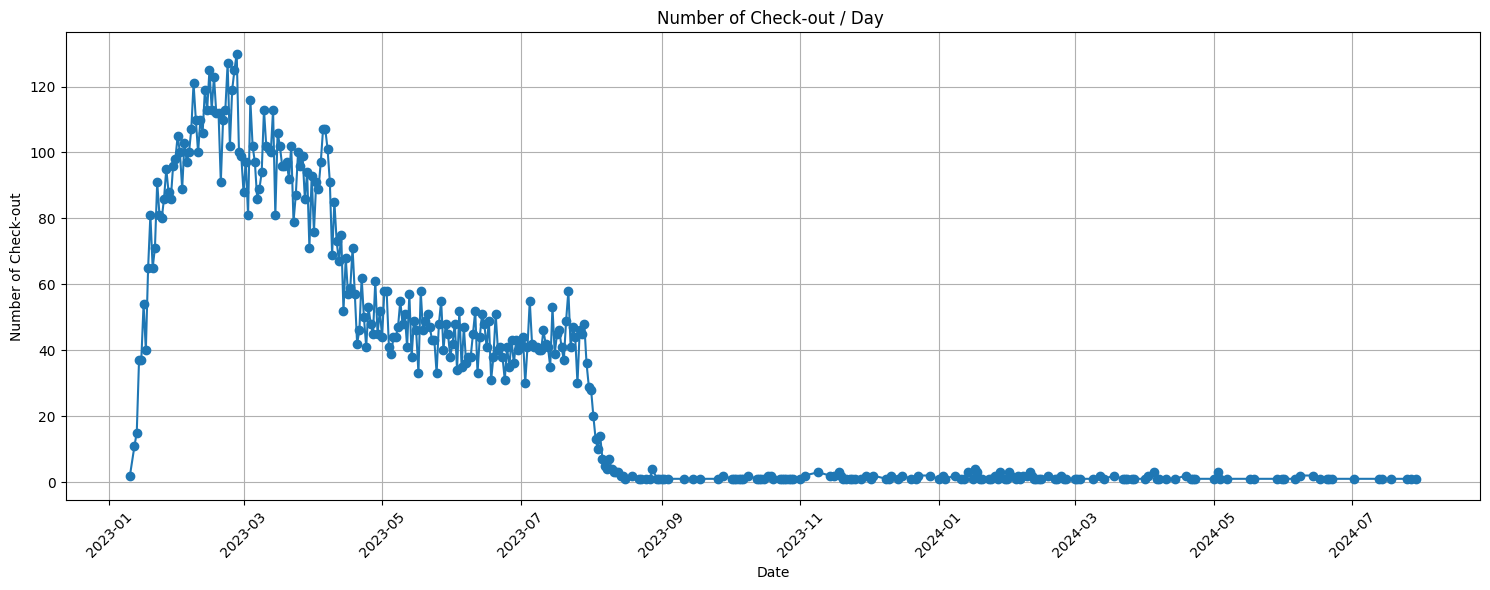

In [ ]:
# Plot
plt.figure(figsize=(15, 6))
plt.plot(checkout_counts.index, checkout_counts.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Check-out')
plt.title('Number of Check-out / Day ')
plt.grid(True)
plt.tight_layout()
plt.show()

key insights: there is a intense drop of check_in & check_out count after september 2023

### Plot Distribution num_col check

In [ ]:
num_col = ['new_nights', 'rooms', 'hotel_per_room_usd', 'check_in_time', 'check_out_time']

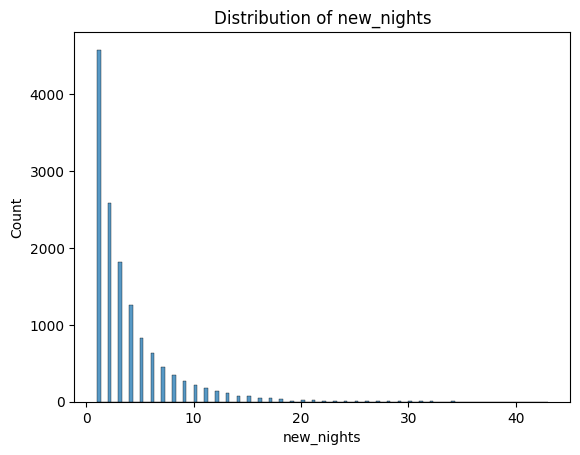

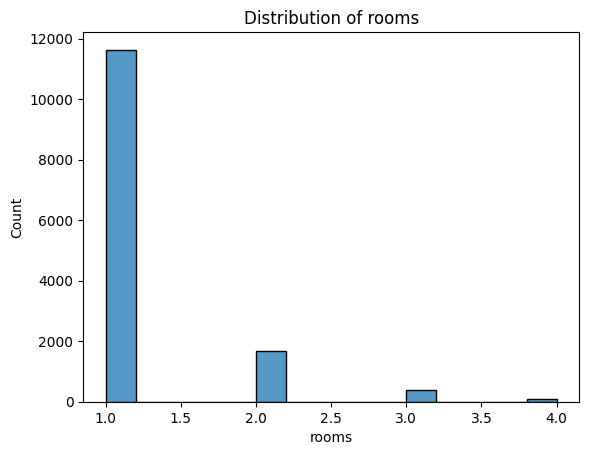

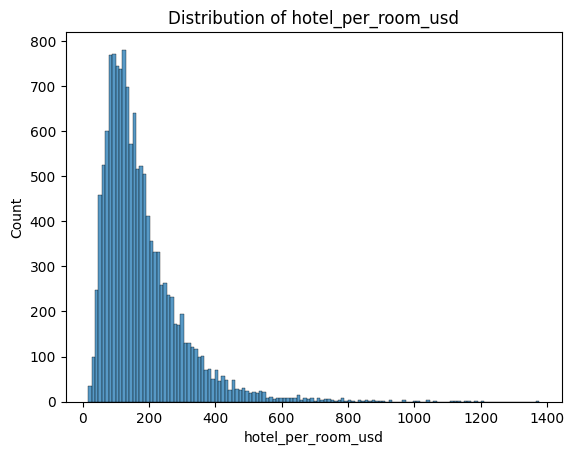

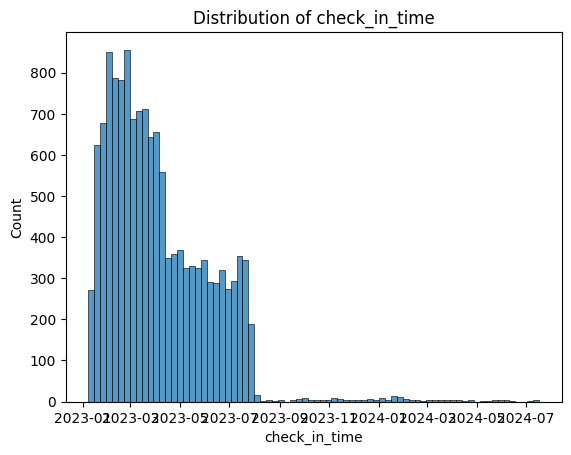

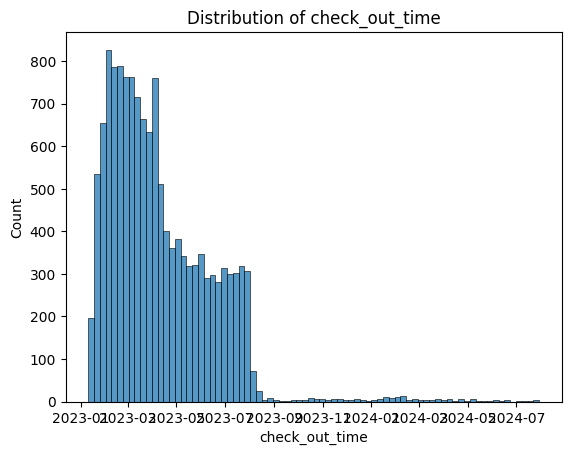

In [ ]:
for col in num_col:
    sns.histplot(data=df_hotels, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Hotel popularity

In [ ]:
#Now let´s see what is the most popular hotel
hotel_counts=df_hotels['hotel_name'].value_counts()
hotel_counts

hotel_name
Best Western - new york      115
Conrad  - new york           115
Accor - new york             111
Aman Resorts - new york      108
Hilton - new york            107
                            ... 
InterContinental  - xi'an      1
Four Seasons - cape town       1
Extended Stay  - tucson        1
Shangri-La - tucson            1
Hyatt - macau                  1
Name: count, Length: 954, dtype: int64

In [ ]:
#let´s if people choose the most popular hotel for their price
# Create a DataFrame with bookings and average price per room, then sort by Bookings (count)
hotel_data = (
    df_hotels.groupby('hotel_name')
    .agg(
        Bookings=('hotel_name', 'count'),
        Average_Price_Per_Room=('hotel_per_room_usd', 'mean')
    )
    .reset_index()
    .sort_values('Bookings', ascending=False)
)

# Display the top hotels
hotel_data.head()

hotel_name  Bookings  Average_Price_Per_Room
173  Best Western - new york       115              198.434783
267       Conrad  - new york       115              176.478261
26          Accor - new york       111              197.477477
77   Aman Resorts - new york       108              176.175926
504        Hilton - new york       107              171.635514

So, this is telling us the most popular hotel is not really the the cheapest

In [ ]:
#jut for curiosity let´s see which one is the cheapest

hotel_data = (
    df_hotels.groupby('hotel_name')
    .agg(
        Bookings=('hotel_name', 'count'),
        Average_Price_Per_Room=('hotel_per_room_usd', 'mean')
    )
    .reset_index()
    .sort_values('Average_Price_Per_Room', ascending=True)
)

# Display the top hotels
hotel_data.head()

hotel_name  Bookings  Average_Price_Per_Room
79         Aman Resorts - osaka         1                    51.0
826        Shangri-La - fukuoka         1                    52.0
453  Four Seasons - johor bahru         1                    55.0
943              Wyndham - rome         1                    56.0
45          Aman Resorts - agra         1                    59.0

## Flights dataframe

### loading df

In [ ]:
df_flights = pd.read_csv(base_path + "Flights.csv")

In [ ]:
df_flights.dtypes

trip_id                     object
origin_airport              object
destination                 object
destination_airport         object
seats                        int64
return_flight_booked          bool
departure_time              object
return_time                 object
checked_bags                 int64
trip_airline                object
destination_airport_lat    float64
destination_airport_lon    float64
base_fare_usd              float64
dtype: object

In [ ]:
#convert columns with date in datetype
date_columns = ['departure_time', 'return_time']

# Convert the columns to datetime
for column in date_columns:
    df_flights[column] = pd.to_datetime(df_flights[column], format='mixed')  # 'coerce' will turn invalid parsing into NaT (Not a Time)

# Verify the data types after conversion
df_flights.dtypes


trip_id                            object
origin_airport                     object
destination                        object
destination_airport                object
seats                               int64
return_flight_booked                 bool
departure_time             datetime64[ns]
return_time                datetime64[ns]
checked_bags                        int64
trip_airline                       object
destination_airport_lat           float64
destination_airport_lon           float64
base_fare_usd                     float64
dtype: object

In [ ]:
df_flights.head()

trip_id origin_airport    destination  \
0  582979-5475b9940ee240bf9328a0cc0bc9900c            RNO         ottawa   
1  514785-863ac3b4eb984f1eb226d67955623a5d            FTW       montreal   
2  588386-233db0f627cf4aaaaeaa9a632daa5ec4            CLE   philadelphia   
3  600395-79e934e3dcf2462587a0beffbebd6783            HOU        memphis   
4  474120-a87f749cf54b4f4ca9262d07080a06b2            YQB  san francisco   

  destination_airport  seats  return_flight_booked      departure_time  \
0                 YOW      1                  True 2023-03-31 07:00:00   
1                 YHU      1                 False 2023-06-21 15:00:00   
2                 PHL      1                  True 2023-04-04 08:00:00   
3                 MEM      2                  True 2023-04-21 13:00:00   
4                 SFO      2                  True 2023-02-02 07:00:00   

          return_time  checked_bags       trip_airline  \
0 2023-04-07 07:00:00             1         Air Canada   
1                 NaT             0    Delta Air Lines   
2 2023-04-06 08:00:00             2  American Airlines   
3 2023-04-24 13:00:00             0    Delta Air Lines   
4 2023-02-07 07:00:00             0    Alaska Airlines   

   destination_airport_lat  destination_airport_lon  base_fare_usd  
0                   45.323                  -75.669         657.64  
1                   45.517                  -73.417         221.83  
2                   39.872                  -75.241         106.00  
3                   35.042                  -89.977         320.19  
4                   37.619                 -122.375        1507.83

In [ ]:
df_flights.describe()

seats                 departure_time  \
count  13193.000000                          13193   
mean       1.200106  2023-04-11 10:41:27.500947456   
min        1.000000            2023-01-09 11:00:00   
25%        1.000000            2023-02-16 07:00:00   
50%        1.000000            2023-03-23 07:00:00   
75%        1.000000            2023-05-19 13:00:00   
max        8.000000            2024-07-16 07:00:00   
std        0.552416                            NaN   

                         return_time  checked_bags  destination_airport_lat  \
count                          12620  13193.000000             13193.000000   
mean   2023-04-15 16:40:21.299524352      0.584477                38.708329   
min              2023-01-11 11:00:00      0.000000               -37.008000   
25%              2023-02-19 15:00:00      0.000000                33.942000   
50%              2023-03-26 14:30:00      1.000000                39.872000   
75%              2023-05-23 12:00:00      1.000000                42.409000   
max              2024-07-29 07:00:00      8.000000                55.972000   
std                              NaN      0.653633                 6.642478   

       destination_airport_lon  base_fare_usd  
count             13193.000000   13193.000000  
mean                -90.471100     489.114071  
min                -157.927000       2.410000  
25%                -112.383000     198.600000  
50%                 -87.752000     377.820000  
75%                 -75.669000     590.590000  
max                 174.792000   14466.330000  
std                  29.068945     675.795966

In [ ]:
df_flights.isna().sum()

trip_id                      0
origin_airport               0
destination                  0
destination_airport          0
seats                        0
return_flight_booked         0
departure_time               0
return_time                573
checked_bags                 0
trip_airline                 0
destination_airport_lat      0
destination_airport_lon      0
base_fare_usd                0
dtype: int64

These negative nights could represnt people who only booked onw way trip. So, Let´s define Two way trip vs one way trip

In [ ]:
df_flights['trip_type'] = df_flights['return_time'].apply(
    lambda x: 'two_ways' if pd.notna(x) else 'one_way'
)
df_flights.head()

trip_id origin_airport    destination  \
0  582979-5475b9940ee240bf9328a0cc0bc9900c            RNO         ottawa   
1  514785-863ac3b4eb984f1eb226d67955623a5d            FTW       montreal   
2  588386-233db0f627cf4aaaaeaa9a632daa5ec4            CLE   philadelphia   
3  600395-79e934e3dcf2462587a0beffbebd6783            HOU        memphis   
4  474120-a87f749cf54b4f4ca9262d07080a06b2            YQB  san francisco   

  destination_airport  seats  return_flight_booked      departure_time  \
0                 YOW      1                  True 2023-03-31 07:00:00   
1                 YHU      1                 False 2023-06-21 15:00:00   
2                 PHL      1                  True 2023-04-04 08:00:00   
3                 MEM      2                  True 2023-04-21 13:00:00   
4                 SFO      2                  True 2023-02-02 07:00:00   

          return_time  checked_bags       trip_airline  \
0 2023-04-07 07:00:00             1         Air Canada   
1                 NaT             0    Delta Air Lines   
2 2023-04-06 08:00:00             2  American Airlines   
3 2023-04-24 13:00:00             0    Delta Air Lines   
4 2023-02-07 07:00:00             0    Alaska Airlines   

   destination_airport_lat  destination_airport_lon  base_fare_usd trip_type  
0                   45.323                  -75.669         657.64  two_ways  
1                   45.517                  -73.417         221.83   one_way  
2                   39.872                  -75.241         106.00  two_ways  
3                   35.042                  -89.977         320.19  two_ways  
4                   37.619                 -122.375        1507.83  two_ways

### Trip duration

calculate trip duration from return-departure

In [ ]:
# Calculate duration in days (handling NaNs for one-way flights)
df_flights['trip_duration_days'] = (df_flights['return_time'] - df_flights['departure_time']).dt.days
df_flights['trip_duration_days']

0         7.0
1         NaN
2         2.0
3         3.0
4         5.0
         ... 
13188     4.0
13189     6.0
13190     3.0
13191    14.0
13192     7.0
Name: trip_duration_days, Length: 13193, dtype: float64

In [ ]:
# For one-way flights (return_flight_booked=False), set duration to NaN
df_flights.loc[~df_flights['return_flight_booked'], 'trip_duration_days'] = None

In [ ]:
# Identify trips with duration >= 35 days
long_trips = df_flights[df_flights['trip_duration_days'] >= 35]
print(f"Found {len(long_trips)} suspicious trips:")
display(long_trips[['trip_id', 'departure_time', 'return_time', 'trip_duration_days']])

Found 2 suspicious trips:


trip_id      departure_time  \
727    534474-8e488c4849ea4125b8c1a96f42d8b405 2023-03-17 16:00:00   
11901  534351-4b44f32b4ef24145985672de80e86635 2023-07-24 08:00:00   

              return_time  trip_duration_days  
727   2023-04-21 16:00:00                35.0  
11901 2023-08-28 08:00:00                35.0

Apparenty they had a nice long trip

### Heatmap frot most intese period/ hours for departure/ return

In [ ]:
#Convert and extract datetime components for flights
df_flights['departure_time'] = pd.to_datetime(df_flights['departure_time'])
df_flights['departure_month'] = df_flights['departure_time'].dt.month
df_flights['departure_hour'] = df_flights['departure_time'].dt.hour

# Only process return_time if it exists (from your dtypes, it has some nulls)
if 'return_time' in df_flights.columns:
    df_flights['return_time'] = pd.to_datetime(df_flights['return_time'])
    df_flights['return_month'] = df_flights['return_time'].dt.month
    df_flights['return_hour'] = df_flights['return_time'].dt.hour

In [ ]:
#plot
df_flights.groupby([ 'departure_time', 'departure_month']).size().unstack(fill_value=0)

departure_month      1   2   3   4   5   6   7   8   9   10  11  12
departure_time                                                     
2023-01-09 11:00:00   2   0   0   0   0   0   0   0   0   0   0   0
2023-01-09 14:00:00   1   0   0   0   0   0   0   0   0   0   0   0
2023-01-09 15:00:00   3   0   0   0   0   0   0   0   0   0   0   0
2023-01-10 07:00:00   5   0   0   0   0   0   0   0   0   0   0   0
2023-01-10 12:00:00   1   0   0   0   0   0   0   0   0   0   0   0
...                  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2024-07-10 07:00:00   0   0   0   0   0   0   2   0   0   0   0   0
2024-07-12 14:00:00   0   0   0   0   0   0   2   0   0   0   0   0
2024-07-12 18:00:00   0   0   0   0   0   0   1   0   0   0   0   0
2024-07-15 22:00:00   0   0   0   0   0   0   1   0   0   0   0   0
2024-07-16 07:00:00   0   0   0   0   0   0   1   0   0   0   0   0

[2409 rows x 12 columns]

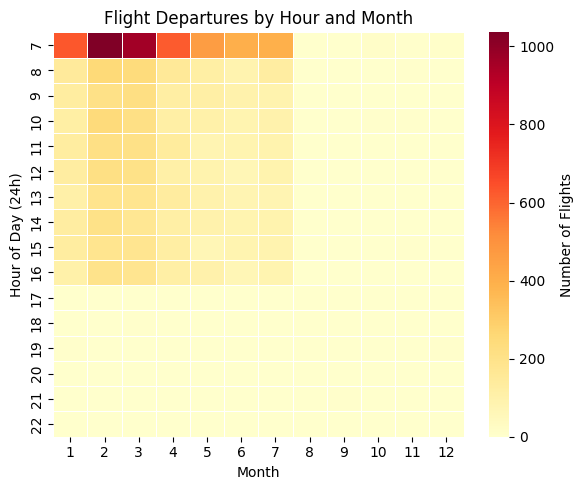

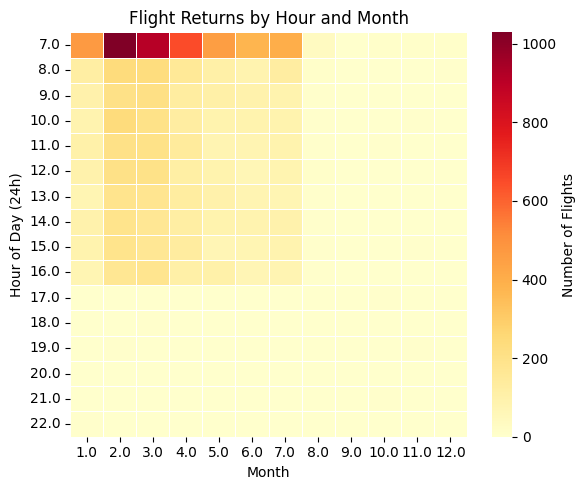

In [ ]:

plt.figure(figsize=(6, 5))
departure_heatmap = df_flights.groupby(['departure_hour', 'departure_month']).size().unstack(fill_value=0)
sns.heatmap(departure_heatmap,
            cmap="YlOrRd",
            cbar=True,
            linewidths=0.5,
            cbar_kws={'label': 'Number of Flights'})
plt.title("Flight Departures by Hour and Month")
plt.xlabel("Month")
plt.ylabel("Hour of Day (24h)")
plt.tight_layout()
plt.show()

# For Returns Heatmap (only if return data exists)
if 'return_hour' in df_flights.columns and 'return_month' in df_flights.columns:
    plt.figure(figsize=(6, 5))
    return_heatmap = df_flights.groupby(['return_hour', 'return_month']).size().unstack(fill_value=0)
    sns.heatmap(return_heatmap,
                cmap="YlOrRd",
                cbar=True,
                linewidths=0.5,
                cbar_kws={'label': 'Number of Flights'})
    plt.title("Flight Returns by Hour and Month")
    plt.xlabel("Month")
    plt.ylabel("Hour of Day (24h)")
    plt.tight_layout()
    plt.show()

Both departure & return have highest peak on February at 7 am. (Rember the data was filtered from 2023-01-04)

### One way vs two ways booking

In [ ]:
df_flights.isnull().sum()

trip_id                      0
origin_airport               0
destination                  0
destination_airport          0
seats                        0
return_flight_booked         0
departure_time               0
return_time                573
checked_bags                 0
trip_airline                 0
destination_airport_lat      0
destination_airport_lon      0
base_fare_usd                0
trip_type                    0
trip_duration_days         573
departure_month              0
departure_hour               0
return_month               573
return_hour                573
dtype: int64

could be that the user only booked the departure flight

In [ ]:
# Count one-way vs round-trip flights
one_way_stats = df_flights['return_flight_booked'].value_counts(normalize=True).mul(100).round(2)

print("Percentage of one-way vs round-trip flights:")
print(one_way_stats.to_markdown())

Percentage of one-way vs round-trip flights:
| return_flight_booked   |   proportion |
|:-----------------------|-------------:|
| True                   |        95.66 |
| False                  |         4.34 |


Only ~4% of flights are one-way travelers

### Price categories

<Axes: xlabel='base_fare_usd', ylabel='Density'>

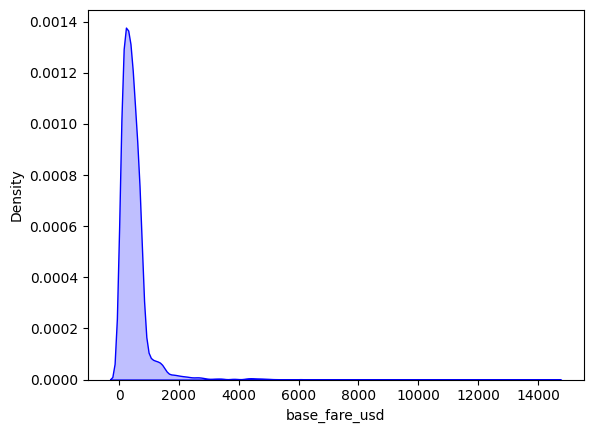

In [ ]:
sns.kdeplot(df_flights['base_fare_usd'], fill=True, color='blue')

In [ ]:
# To create price categories need to Define bins and labels
bins = [0, 100, 200, 1000, 5000, 10000, float('inf')]
labels = [
    "Very Low (<$100)",
    "Low ($100-$200)",
    "Medium ($200-$1K)",
    "Costly ($1K-$5K)",
    "Expensive ($5K-$10K)",
    "Extra Expensive (>$10K)"
]

# Categorize flights
df_flights['price_segment'] = pd.cut(
    df_flights['base_fare_usd'],
    bins=bins,
    labels=labels
)

In [ ]:
segment_counts = df_flights['price_segment'].value_counts().sort_index()
print("Flights per price segment:")
print(segment_counts.to_markdown())  # Pretty-print as a table

Flights per price segment:
| price_segment           |   count |
|:------------------------|--------:|
| Very Low (<$100)        |    1419 |
| Low ($100-$200)         |    1916 |
| Medium ($200-$1K)       |    8983 |
| Costly ($1K-$5K)        |     826 |
| Expensive ($5K-$10K)    |      37 |
| Extra Expensive (>$10K) |      12 |


<ipython-input-50-32f5daf410ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


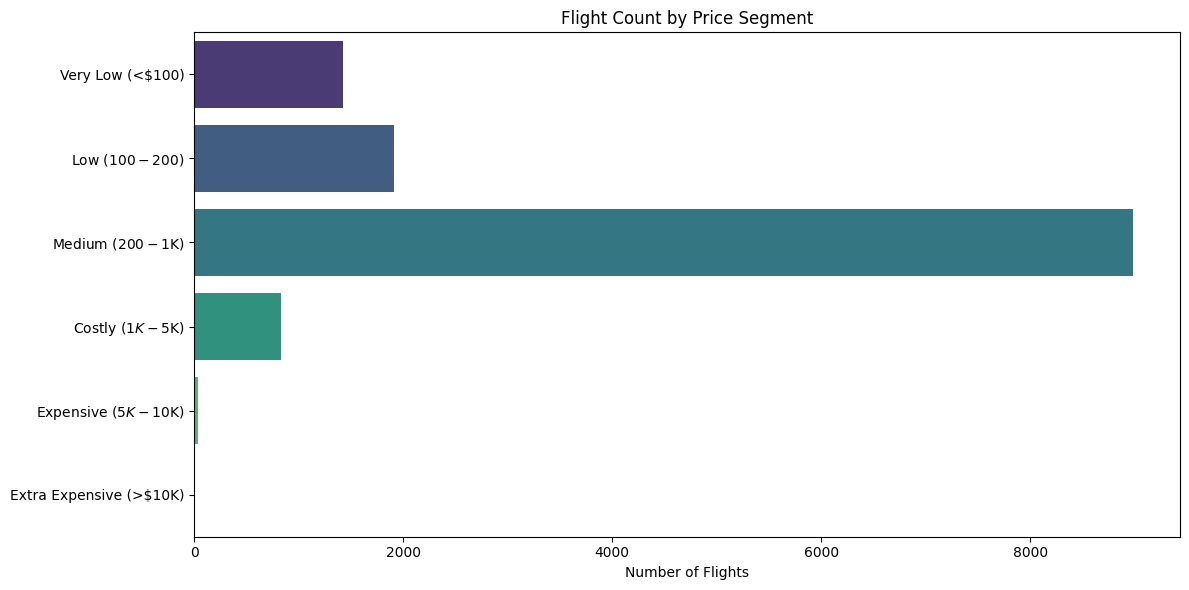

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_flights,
    y='price_segment',
    order=labels,
    palette='viridis'
)
plt.title('Flight Count by Price Segment')
plt.xlabel('Number of Flights')
plt.ylabel('')
plt.tight_layout()

#### investigation for one way trip

In [ ]:
# Compare price segments for one-way flights
one_way_prices = df_flights[df_flights['return_flight_booked'] == True].groupby('price_segment').agg({
    'base_fare_usd': ['mean', 'count'],
    'seats': 'mean'
}).sort_values(('base_fare_usd', 'count'), ascending=False)


print(one_way_prices.to_markdown())

| price_segment           |   ('base_fare_usd', 'mean') |   ('base_fare_usd', 'count') |   ('seats', 'mean') |
|:------------------------|----------------------------:|-----------------------------:|--------------------:|
| Medium ($200-$1K)       |                    472.029  |                         8723 |             1.14135 |
| Low ($100-$200)         |                    145.687  |                         1762 |             1.07435 |
| Very Low (<$100)        |                     65.3771 |                         1270 |             1.03228 |
| Costly ($1K-$5K)        |                   1802.53   |                          817 |             2.22277 |
| Expensive ($5K-$10K)    |                   6397.9    |                           36 |             2.88889 |
| Extra Expensive (>$10K) |                  12623      |                           12 |             5.5     |


<ipython-input-51-1263a5af27da>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_way_prices = df_flights[df_flights['return_flight_booked'] == True].groupby('price_segment').agg({


In [ ]:
# Compare price segments for two-way flights
one_way_prices = df_flights[df_flights['return_flight_booked'] == True].groupby('price_segment').agg({
    'base_fare_usd': ['mean', 'count'],
    'seats': 'mean'
}).sort_values(('base_fare_usd', 'count'), ascending=False)


print(one_way_prices.to_markdown())

| price_segment           |   ('base_fare_usd', 'mean') |   ('base_fare_usd', 'count') |   ('seats', 'mean') |
|:------------------------|----------------------------:|-----------------------------:|--------------------:|
| Medium ($200-$1K)       |                    472.029  |                         8723 |             1.14135 |
| Low ($100-$200)         |                    145.687  |                         1762 |             1.07435 |
| Very Low (<$100)        |                     65.3771 |                         1270 |             1.03228 |
| Costly ($1K-$5K)        |                   1802.53   |                          817 |             2.22277 |
| Expensive ($5K-$10K)    |                   6397.9    |                           36 |             2.88889 |
| Extra Expensive (>$10K) |                  12623      |                           12 |             5.5     |


<ipython-input-52-3e39b26a6056>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_way_prices = df_flights[df_flights['return_flight_booked'] == True].groupby('price_segment').agg({


### Most popular destination

In [ ]:
df_flights['destination'].value_counts()

destination
new york       1868
los angeles     983
toronto         707
chicago         677
houston         545
               ... 
punta cana        1
pune              1
nice              1
abu dhabi         1
hanoi             1
Name: count, Length: 124, dtype: int64

In [ ]:
# Get stats for each deaparture origin
price_stats = df_flights.groupby('origin_airport')['base_fare_usd'].agg(
    ['count', 'mean', 'median', 'min', 'max']
).sort_values('count', ascending=False)

# Display top 10 most expensive
print(price_stats.head(10))

                count        mean   median    min       max
origin_airport                                             
LGA               835  474.544048  395.360  14.65   6099.91
JFK               776  481.903789  406.185  13.68   5895.18
LAX               698  621.889756  538.480  15.26  11743.14
DAL               265  353.900377  348.400   7.99   2036.28
YYC               233  551.609871  486.210  50.28   5453.69
IND               198  310.728788  242.010  35.51   1727.82
SJC               193  632.017047  568.450   8.45   5484.19
BNA               192  350.183646  224.325  32.26   4572.97
AUS               190  527.905105  383.270   8.10   7480.76
SFO               184  584.944783  540.010   8.08   4842.87


In [ ]:
# Get stats for each destination
price_stats = df_flights.groupby('destination')['base_fare_usd'].agg(
    ['count', 'mean', 'median', 'min', 'max']
).sort_values('count', ascending=False)

# Display top 10 most expensive
print(price_stats.head(10))

              count        mean   median    min      max
destination                                             
new york       1868  448.059791  382.915   3.28  2982.71
los angeles     983  539.171211  514.370   2.41  3154.87
toronto         707  348.339675  254.080  14.06  2412.07
chicago         677  332.492304  248.710  20.42  2029.16
houston         545  371.554991  374.020  27.04  1652.40
montreal        428  397.443294  324.430  20.80  2234.19
phoenix         410  445.056854  432.435  34.96  1985.20
philadelphia    380  388.819026  305.725  11.46  2867.64
san antonio     365  396.981726  356.290   8.10  2005.92
dallas          350  340.659086  341.075   7.05  1516.40


#### Which destinations have the most expensive flights?

In [ ]:
expensive_flights =df_flights[df_flights['base_fare_usd']>8000]

In [ ]:
expensive_flights_by_dest = expensive_flights['destination'].value_counts().reset_index()
expensive_flights_by_dest.columns = ['destination', 'flight_count']
# Display top 10 destinations with most expensive flights
print("\nTop 10 destinations with most flights > $8000:")
print(expensive_flights_by_dest.head(10))


Top 10 destinations with most flights > $8000:
  destination  flight_count
0       delhi             2
1   amsterdam             1
2       tokyo             1
3    istanbul             1
4     colombo             1
5       macau             1
6      guilin             1
7       dubai             1
8        agra             1
9  casablanca             1


### Airlines

In [ ]:
# Cross-tabulate airlines vs. price segments
airline_segment_counts = pd.crosstab(
    df_flights['trip_airline'],
    df_flights['price_segment'],
    margins=True
)

print("Flights by Airline and Price Segment:")
print(airline_segment_counts.to_markdown())

Flights by Airline and Price Segment:
| trip_airline                              |   Very Low (<$100) |   Low ($100-$200) |   Medium ($200-$1K) |   Costly ($1K-$5K) |   Expensive ($5K-$10K) |   Extra Expensive (>$10K) |   All |
|:------------------------------------------|-------------------:|------------------:|--------------------:|-------------------:|-----------------------:|--------------------------:|------:|
| Abu Dhabi Amiri Flight                    |                  1 |                 4 |                  15 |                  0 |                      0 |                         0 |    20 |
| Aegean Airlines                           |                  0 |                 0 |                   1 |                  3 |                      0 |                         0 |     4 |
| Aer Lingus                                |                  0 |                 1 |                  11 |                  1 |                      0 |                         0 |    13 |
| AeroM

In [ ]:
airline_price_stats = df_flights.groupby('trip_airline').agg({
    'base_fare_usd': ['mean', 'median', 'count']
}).sort_values(('base_fare_usd', 'mean'), ascending=False)

print("\nAverage Fare by Airline:")
print(airline_price_stats.round(2).to_markdown())


Average Fare by Airline:
| trip_airline                              |   ('base_fare_usd', 'mean') |   ('base_fare_usd', 'median') |   ('base_fare_usd', 'count') |
|:------------------------------------------|----------------------------:|------------------------------:|-----------------------------:|
| Air Mauritius                             |                    13902.1  |                      13902.1  |                            1 |
| Vietnam Airlines                          |                    13771.5  |                      13771.5  |                            1 |
| Pegasus Airlines                          |                     8431.34 |                       8431.34 |                            1 |
| Spicejet                                  |                     7274.8  |                       7274.8  |                            1 |
| Jetstar Airways                           |                     7073.45 |                       7073.45 |                            2 |
|

In [ ]:
# Top 30 airlines only for readability
top_airlines = df_flights['trip_airline'].value_counts().head(30).index
df_top = df_flights[df_flights['trip_airline'].isin(top_airlines)]
# Filter and sort data
plot_data = (
    pd.crosstab(df_flights['trip_airline'], df_flights['price_segment'])
    .reindex(top_airlines)  # Sort by flight count
    .loc[top_airlines]      # Ensure order is preserved
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Delta Air Lines'),
  Text(1, 0, 'American Airlines'),
  Text(2, 0, 'United Airlines'),
  Text(3, 0, 'Southwest Airlines'),
  Text(4, 0, 'Ryanair'),
  Text(5, 0, 'JetBlue Airways'),
  Text(6, 0, 'AirTran Airways'),
  Text(7, 0, 'Allegiant Air'),
  Text(8, 0, 'Air Canada'),
  Text(9, 0, 'WestJet'),
  Text(10, 0, 'Alaska Airlines'),
  Text(11, 0, 'Porter Airlines'),
  Text(12, 0, 'Air France'),
  Text(13, 0, 'Cebu Pacific'),
  Text(14, 0, 'KLM Royal Dutch Airlines'),
  Text(15, 0, 'Kenmore Air'),
  Text(16, 0, 'Air New Zealand'),
  Text(17, 0, 'Air Transat'),
  Text(18, 0, 'Conviasa'),
  Text(19, 0, 'Lufthansa'),
  Text(20, 0, 'Spirit Airlines'),
  Text(21, 0, 'Alitalia'),
  Text(22, 0, 'Frontier Airlines'),
  Text(23, 0, 'Virgin Atlantic Airways'),
  Text(24, 0, 'AeroMéxico'),
  Text(25, 0, 'Finnair'),
  Text(26, 0, 'Virgin America'),
  T

<Figure size 4000x2000 with 0 Axes>

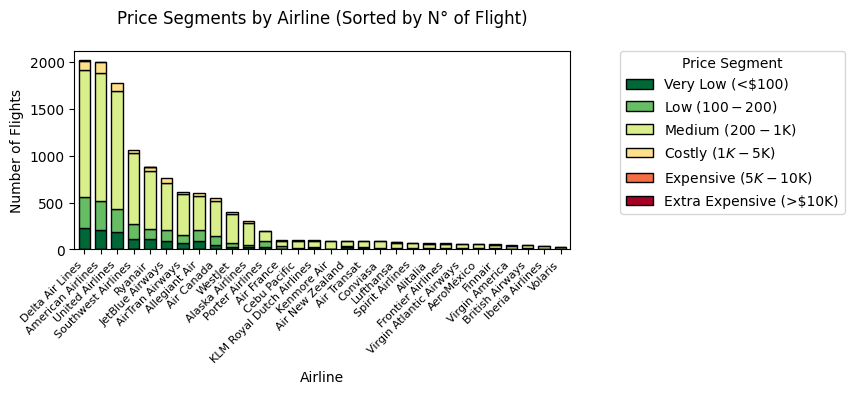

In [ ]:
plt.figure(figsize=(40, 20))
ax=plot_data.plot(
    kind='bar',
    stacked=True,
    colormap='RdYlGn_r',  # Red (expensive) to Green (cheap)
    edgecolor='black',
    width=0.7
)

# Force exact dimensions
ax.set_box_aspect(0.4)  # Height/width ratio (0.5 = height is half of width)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Larger labels
ax.autoscale(enable=False)  # Prevent resizing

# Customize legend (place outside top-right)
plt.legend(
    title='Price Segment',
    bbox_to_anchor=(1.10, 1),  # Outside right
    loc='upper left',
    borderaxespad=0.
)

# Add labels and title
plt.title("Price Segments by Airline (Sorted by N° of Flight)", pad=20)
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45, ha='right')

## Users dataframe

### Loading df

In [ ]:
df_users = pd.read_csv(base_path + "Users.csv")

In [ ]:
df_users.head()

user_id   birthdate gender  married  has_children home_country  \
0   531931  1984-05-26      F    False         False          usa   
1   611065  1981-08-20      F    False         False          usa   
2   586762  1987-09-26      F    False         False       canada   
3   229330  1976-11-08      F     True         False          usa   
4   536035  1995-11-09      M    False         False          usa   

          home_city home_airport  home_airport_lat  home_airport_lon  \
0          san jose          SJC            37.362          -121.929   
1       los angeles          LAX            33.942          -118.408   
2          montreal          YUL            45.468           -73.741   
3  colorado springs          COS            38.806          -104.700   
4          new york          LGA            40.777           -73.872   

  sign_up_date  
0   2023-01-15  
1   2023-02-22  
2   2023-02-11  
3   2022-06-27  
4   2023-01-17

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5782 non-null   int64  
 1   birthdate         5782 non-null   object 
 2   gender            5782 non-null   object 
 3   married           5782 non-null   bool   
 4   has_children      5782 non-null   bool   
 5   home_country      5782 non-null   object 
 6   home_city         5782 non-null   object 
 7   home_airport      5782 non-null   object 
 8   home_airport_lat  5782 non-null   float64
 9   home_airport_lon  5782 non-null   float64
 10  sign_up_date      5782 non-null   object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 418.0+ KB


In [ ]:
# Convert date columns
df_users['birthdate'] = pd.to_datetime(df_users['birthdate'])
df_users['sign_up_date'] = pd.to_datetime(df_users['sign_up_date'])

### Age

In [ ]:
df_users['age'] = (pd.to_datetime('today') - df_users['birthdate']).dt.days // 365
df_users['age']

0       40
1       43
2       37
3       48
4       29
        ..
5777    35
5778    42
5779    48
5780    55
5781    37
Name: age, Length: 5782, dtype: int64

In [ ]:
#age statistic
age_stats = df_users.groupby('gender')['age'].describe()
print(age_stats)

         count       mean        std   min   25%   50%   75%   max
gender                                                            
F       5118.0  42.714342  12.064192  18.0  36.0  43.0  50.0  89.0
M        653.0  42.307810  11.893129  18.0  36.0  43.0  49.0  86.0
O         11.0  38.363636  13.139808  19.0  25.5  42.0  49.5  52.0


In [ ]:
# Extract the mean ages
mean_ages = age_stats['mean']

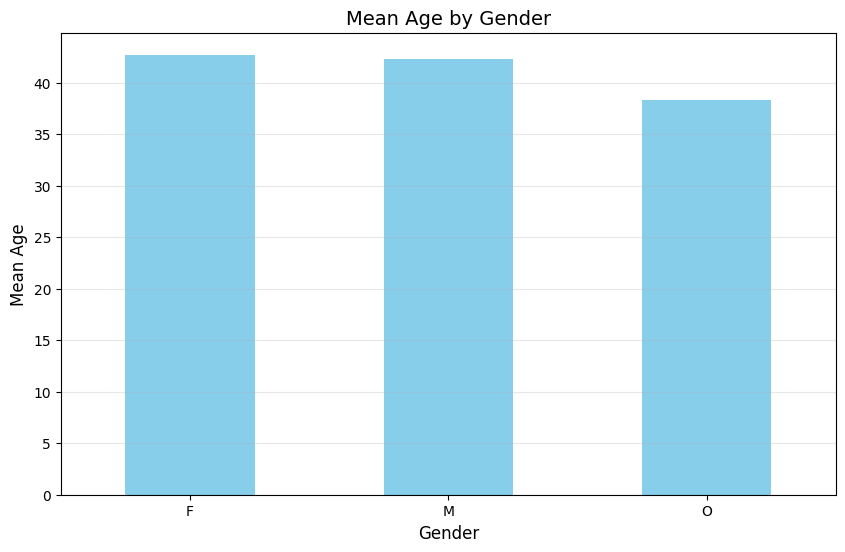

In [ ]:
plt.figure(figsize=(10, 6))
mean_ages.plot(kind='bar', color='skyblue')

plt.title('Mean Age by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Age', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

<ipython-input-70-0536d2920e66>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_users.groupby(['age_bin', 'gender']).size().unstack()


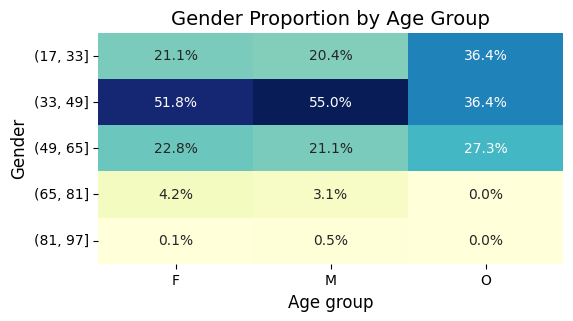

In [ ]:
# Create 5-year age bins
df_users['age_bin'] = pd.cut(df_users['age'], bins=range(17, 100, 16))

# Compute proportions
heatmap_data = df_users.groupby(['age_bin', 'gender']).size().unstack()
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# Plot
plt.figure(figsize=(6, 3))
sns.heatmap(heatmap_data, annot=True, fmt='.1%', cmap='YlGnBu', cbar=False)
plt.title('Gender Proportion by Age Group', fontsize=14)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.show()

### Gender and mariage status

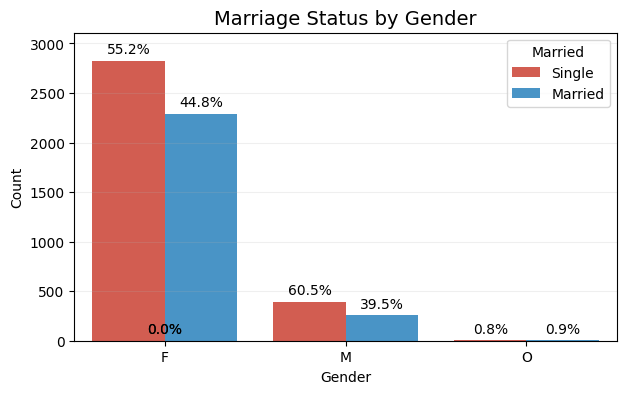

In [ ]:
# 1. Create the countplot
plt.figure(figsize=(7, 4))
ax = sns.countplot(
    data=df_users,
    x='gender',
    hue='married',
    palette={False: '#e74c3c', True: '#3498db'}
)

# 2. Calculate percentages
total_counts = df_users['gender'].value_counts()
for p in ax.patches:
    # Get bar height (count)
    height = p.get_height()
    # Calculate percentage relative to gender group
    gender = p.get_x() + p.get_width()/2  # Get gender position
    gender = 0 if gender < 0.5 else 1      # 0=Female, 1=Male (adjust if needed)
    percentage = 100 * height / total_counts.iloc[gender]

    # Annotate the bar
    ax.annotate(
        f'{percentage:.1f}%',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 3),
        textcoords='offset points'
    )

# 3. Customize plot
plt.title('Marriage Status by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Married', labels=['Single', 'Married'])
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)  # Add headroom
plt.grid(axis='y', alpha=0.2)
plt.show()


### children and marriage status

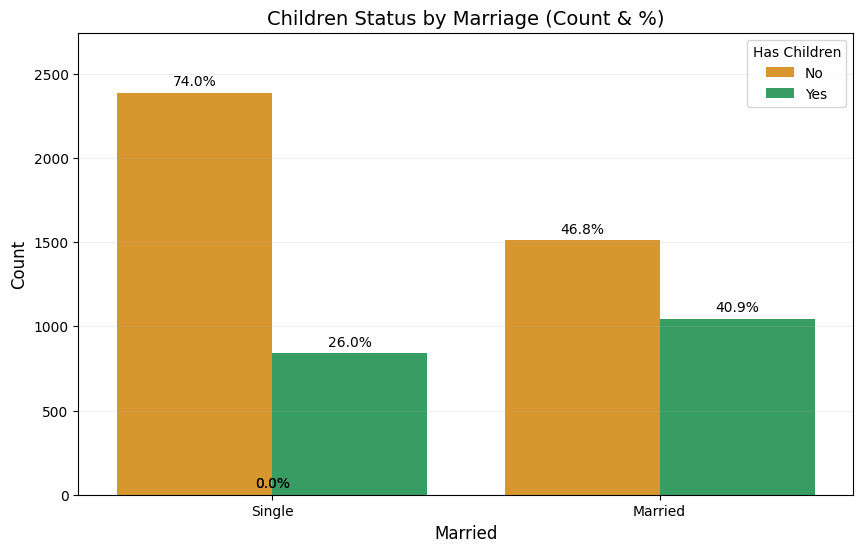

In [ ]:
# Calculate proportions
cross_tab = pd.crosstab(
    index=df_users['married'],
    columns=df_users['has_children'],
    margins=True,
    normalize='index'  # Row-wise percentages
).round(3) * 100

#print("Children Status by Marriage (%):")
#display(cross_tab)
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_users,
    x='married',
    hue='has_children',
    palette={False: '#f39c12', True: '#27ae60'}  # Orange=No kids, Green=Kids
)

# Add percentages
total_counts = df_users['married'].value_counts()
for p in ax.patches:
    height = p.get_height()
    married_status = int(p.get_x())  # 0=False, 1=True
    percentage = 100 * height / total_counts.iloc[married_status]

    ax.annotate(
        f'{percentage:.1f}%',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 3),
        textcoords='offset points',
        fontsize=10
    )

# Customize
plt.title('Children Status by Marriage (Count & %)', fontsize=14)
plt.xlabel('Married', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Single', 'Married'])
plt.legend(title='Has Children', labels=['No', 'Yes'])
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)  # Add headroom
plt.grid(axis='y', alpha=0.2)
plt.show()

### sign_up_date exploration

In [ ]:
df_users['sign_up_year'] = df_users['sign_up_date'].dt.year
df_users['sign_up_month'] = df_users['sign_up_date'].dt.month
# 2. Extract weekday name (this creates the missing column)
df_users['sign_up_weekday'] = df_users['sign_up_date'].dt.day_name()

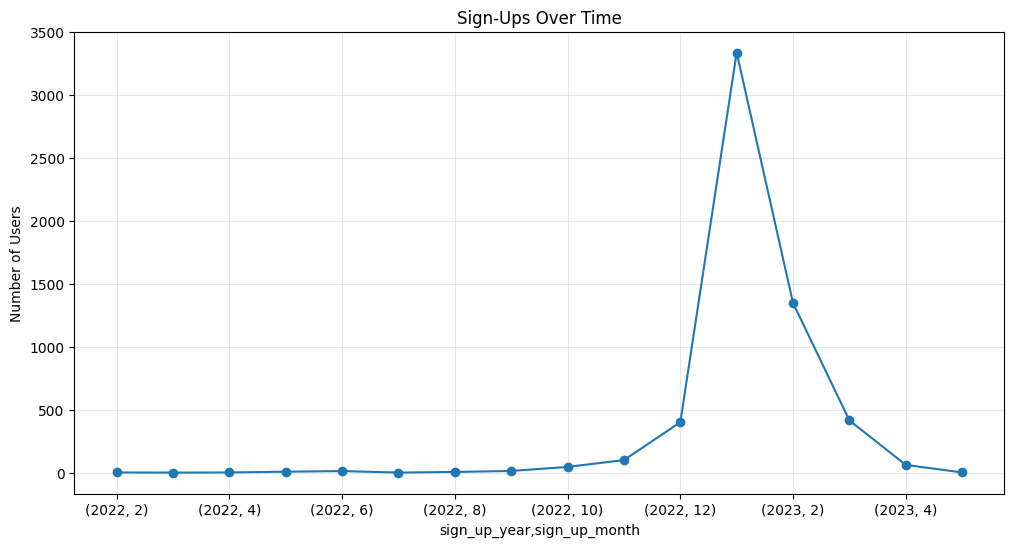

In [ ]:
#qtime line t check spot seasonal spikes or growth trends
plt.figure(figsize=(12, 6))
df_users.groupby(['sign_up_year', 'sign_up_month']).size().plot(marker='o')
plt.title('Sign-Ups Over Time')
plt.ylabel('Number of Users')
plt.grid(alpha=0.3)

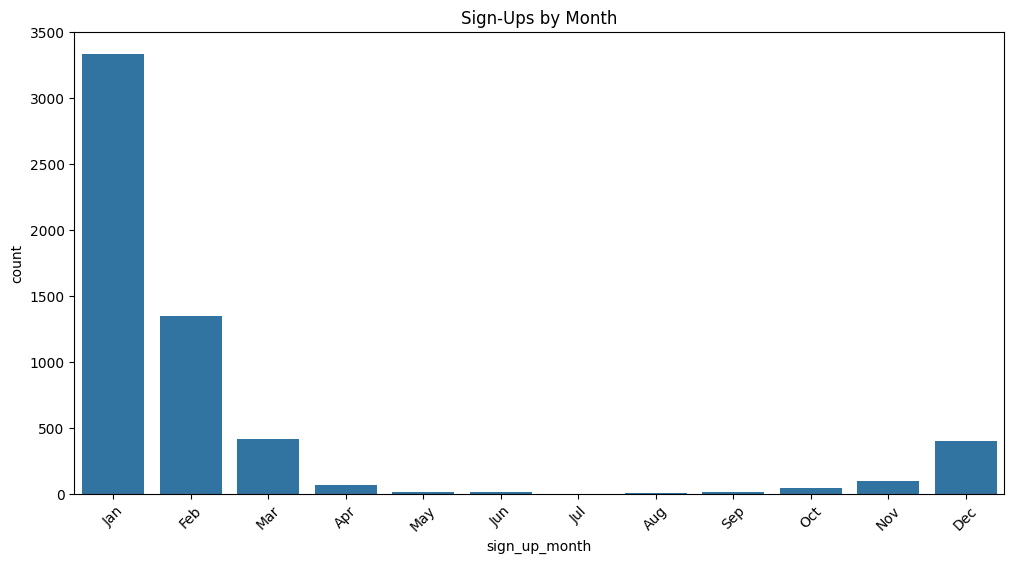

In [ ]:
#low/high season
plt.figure(figsize=(12, 6))
sns.countplot(data=df_users, x='sign_up_month', order=range(1, 13))

month_labels = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # 12 labels

plt.xticks(ticks=range(12), labels=month_labels, rotation=45)
plt.title('Sign-Ups by Month')
plt.show()


In [ ]:
#weekday preferences

<ipython-input-77-61e723f09d39>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


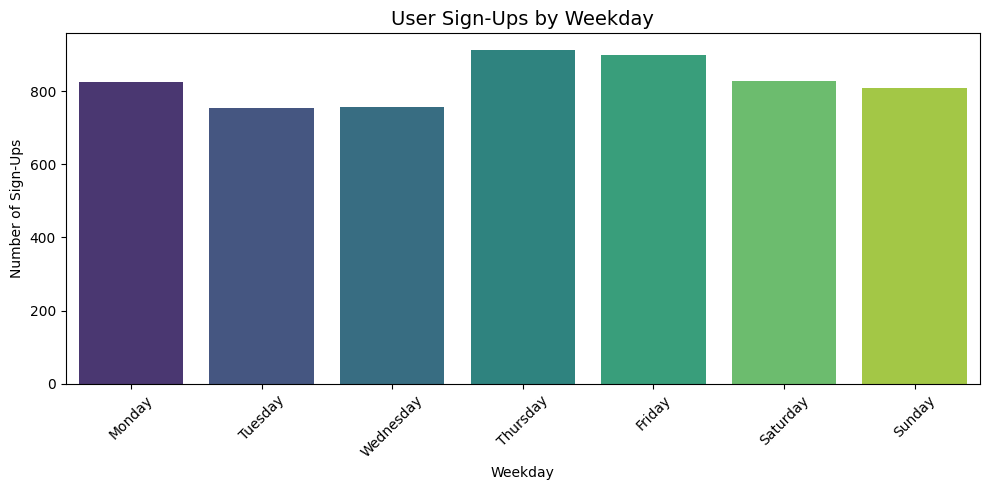

In [ ]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_users,
    x='sign_up_weekday',
    order=weekday_order,
    palette='viridis'
)
plt.title('User Sign-Ups by Weekday', fontsize=14)
plt.xlabel('Weekday')
plt.ylabel('Number of Sign-Ups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### User activity

Text(0.5, 1.0, 'Cohort Retention Analysis')

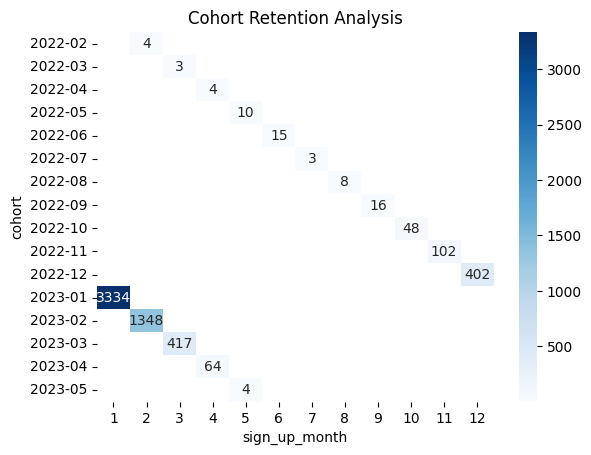

In [ ]:
# Create cohorts based on sign-up year/month. What percentage of users who signed up in a given period are still active/engaged in later periods?
df_users['cohort'] = df_users['sign_up_date'].dt.to_period('M')
cohort_data = df_users.groupby(['cohort', 'sign_up_month']).size().unstack()
sns.heatmap(cohort_data, cmap='Blues', annot=True, fmt='.0f')
plt.title('Cohort Retention Analysis')

 If all cohorts drop 50% in Month 1, your onboarding might need fixes

#### Gender sign_up comparison

Text(0.5, 1.0, 'Monthly Sign-Ups by Gender')

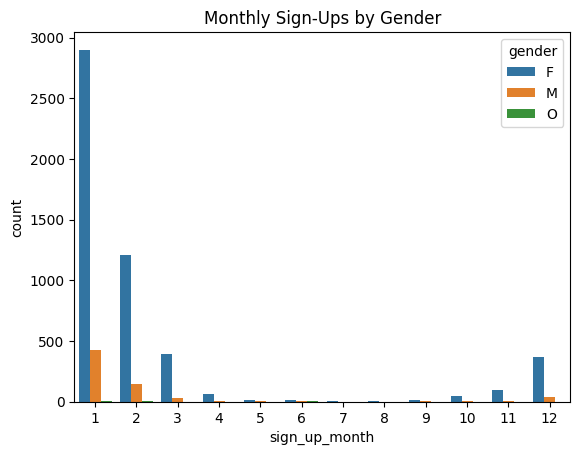

In [ ]:
#combine demographics
# Gender x Month interaction
sns.countplot(data=df_users, x='sign_up_month', hue='gender')
plt.title('Monthly Sign-Ups by Gender')

Text(0.5, 1.0, 'Sing_up Over Time (month)')

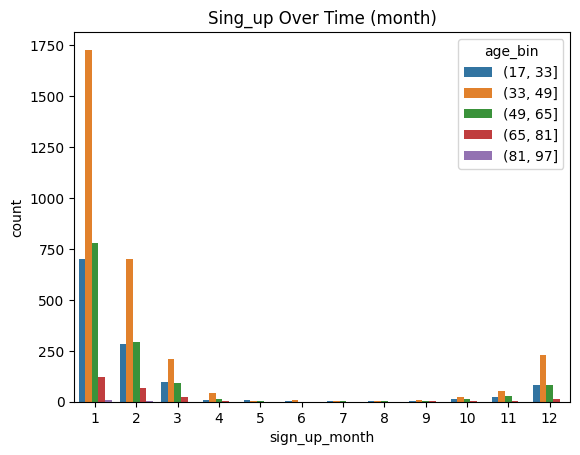

In [ ]:
# Age distribution by sign-up year
sns.countplot(data=df_users, x='sign_up_month', hue='age_bin')
plt.title('Sing_up Over Time (month)')

#### time line plot of sign_up rate

In [ ]:
import matplotlib.dates as mdates

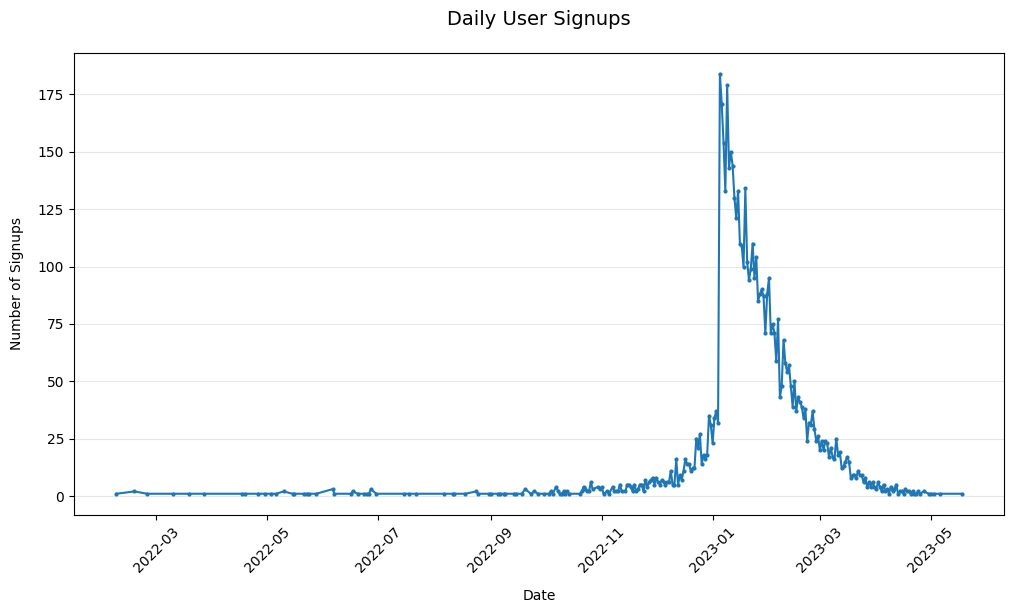

In [ ]:
#count sign_up
daily_signups = df_users['sign_up_date'].value_counts().sort_index()
#  plot
plt.figure(figsize=(12, 6))
plt.plot(daily_signups.index,
         daily_signups.values,
         color='#1f77b4',
         linewidth=1.5,
         marker='o',        # Optional data points
         markersize=2)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g. "Jan 2023"
plt.xticks(rotation=45)
plt.title('Daily User Signups', pad=20, fontsize=14)
plt.ylabel('Number of Signups', labelpad=10)
plt.xlabel('Date', labelpad=10)
plt.grid(axis='y', alpha=0.3)

####  old vs new users

In [ ]:
import numpy as np

In [ ]:
# define Old / new clients with  threshold = 6 month
df_users['cohort'] = np.where(
    df_users['sign_up_month'] > 6,
    'Old Clients',
    'New Clients'
)
df_users

user_id  birthdate gender  married  has_children home_country  \
0      531931 1984-05-26      F    False         False          usa   
1      611065 1981-08-20      F    False         False          usa   
2      586762 1987-09-26      F    False         False       canada   
3      229330 1976-11-08      F     True         False          usa   
4      536035 1995-11-09      M    False         False          usa   
...       ...        ...    ...      ...           ...          ...   
5777   521235 1989-06-21      F    False         False          usa   
5778   591155 1982-12-26      M     True         False       canada   
5779   600351 1976-07-15      F     True         False          usa   
5780   577044 1969-07-26      F     True          True          usa   
5781   597300 1987-09-04      F     True          True          usa   

             home_city home_airport  home_airport_lat  home_airport_lon  \
0             san jose          SJC            37.362          -121.929   
1          los angeles          LAX            33.942          -118.408   
2             montreal          YUL            45.468           -73.741   
3     colorado springs          COS            38.806          -104.700   
4             new york          LGA            40.777           -73.872   
...                ...          ...               ...               ...   
5777           seattle          SEA            47.449          -122.309   
5778           windsor          YQG            42.276           -82.956   
5779          portland          PDX            45.589          -122.597   
5780           chicago          UGN            42.422           -87.868   
5781          new york          JFK            40.640           -73.779   

     sign_up_date  age   age_bin  sign_up_year  sign_up_month sign_up_weekday  \
0      2023-01-15   40  (33, 49]          2023              1          Sunday   
1      2023-02-22   43  (33, 49]          2023              2       Wednesday   
2      2023-02-11   37  (33, 49]          2023              2        Saturday   
3      2022-06-27   48  (33, 49]          2022              6          Monday   
4      2023-01-17   29  (17, 33]          2023              1         Tuesday   
...           ...  ...       ...           ...            ...             ...   
5777   2023-01-10   35  (33, 49]          2023              1         Tuesday   
5778   2023-02-13   42  (33, 49]          2023              2          Monday   
5779   2023-02-17   48  (33, 49]          2023              2          Friday   
5780   2023-02-06   55  (49, 65]          2023              2          Monday   
5781   2023-02-16   37  (33, 49]          2023              2        Thursday   

           cohort  
0     New Clients  
1     New Clients  
2     New Clients  
3     New Clients  
4     New Clients  
...           ...  
5777  New Clients  
5778  New Clients  
5779  New Clients  
5780  New Clients  
5781  New Clients  

[5782 rows x 17 columns]

<Axes: xlabel='cohort', ylabel='count'>

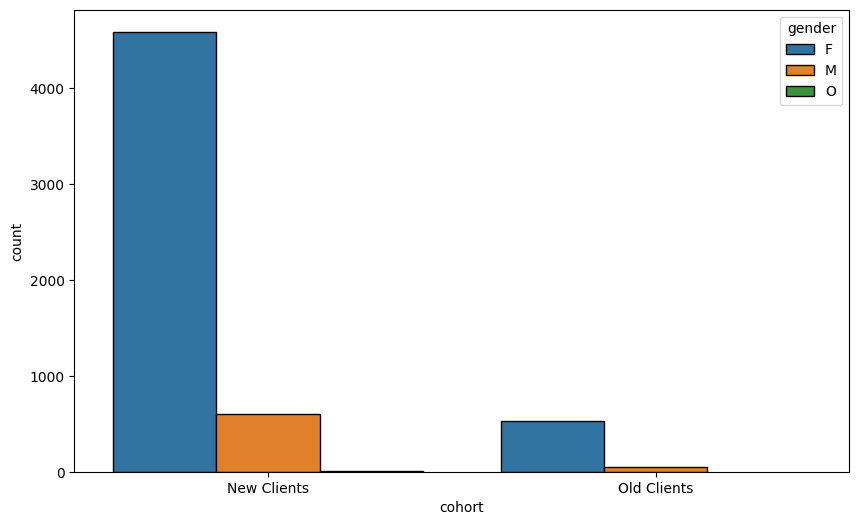

In [ ]:
#  plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_users,
    x='cohort',
    hue='gender',
    order=['New Clients', 'Old Clients'],  # Ensures consistent ordering
    edgecolor='black'
)

## Session dataframe

### df_loading

In [ ]:
df_session = pd.read_csv(base_path + "sessions.csv")

In [ ]:
df_session.head()

session_id  user_id  \
0  536782-40ea451ff53841b296036272519d4e7e   536782   
1  570600-1913f4dc10e445e59765e73588e68dfd   570600   
2  677209-77c593f41bd04228b89a55b3a9d34141   677209   
3  511055-89aed43aef924e97a0b4cadff654328f   511055   
4  546867-c1b3888def70494a893b025bfa3a1b80   546867   

                                   trip_id        session_start  \
0                                      NaN  2023-01-18 19:33:00   
1                                      NaN  2023-04-28 21:24:00   
2                                      NaN  2023-06-01 21:20:00   
3  511055-57ed6923358d47a0a3be86eaf8128ece  2023-02-02 20:49:00   
4                                      NaN  2023-03-04 20:38:00   

           session_end  flight_discount  hotel_discount  \
0  2023-01-18 19:34:20            False           False   
1  2023-04-28 21:24:16            False           False   
2  2023-06-01 21:20:24            False           False   
3  2023-02-02 20:52:39             True           False   
4  2023-03-04 20:39:08            False           False   

   flight_discount_amount  hotel_discount_amount  flight_booked  hotel_booked  \
0                     NaN                    NaN          False         False   
1                     NaN                    NaN          False         False   
2                     NaN                    NaN          False         False   
3                     0.1                    NaN           True          True   
4                     NaN                    NaN          False         False   

   page_clicks  cancellation  
0           11         False  
1            2         False  
2            3         False  
3           30         False  
4            9         False

In [ ]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47436 entries, 0 to 47435
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              47436 non-null  object 
 1   user_id                 47436 non-null  int64  
 2   trip_id                 16066 non-null  object 
 3   session_start           47436 non-null  object 
 4   session_end             47436 non-null  object 
 5   flight_discount         47436 non-null  bool   
 6   hotel_discount          47436 non-null  bool   
 7   flight_discount_amount  7971 non-null   float64
 8   hotel_discount_amount   6015 non-null   float64
 9   flight_booked           47436 non-null  bool   
 10  hotel_booked            47436 non-null  bool   
 11  page_clicks             47436 non-null  int64  
 12  cancellation            47436 non-null  bool   
dtypes: bool(5), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [ ]:
#convert columns with date in datetype
date_columns = ['session_start', 'session_end']

# Convert the columns to datetime
for column in date_columns:
    df_session[column] = pd.to_datetime(df_session[column], errors='coerce')  # 'coerce' will turn invalid parsing into NaT (Not a Time)

# Verify the data types after conversion
df_session.dtypes

session_id                        object
user_id                            int64
trip_id                           object
session_start             datetime64[ns]
session_end               datetime64[ns]
flight_discount                     bool
hotel_discount                      bool
flight_discount_amount           float64
hotel_discount_amount            float64
flight_booked                       bool
hotel_booked                        bool
page_clicks                        int64
cancellation                        bool
dtype: object

#### Check for Nan to correct

In [ ]:
df_session[df_session['session_end'].isnull()]

session_id  user_id  \
379    560680-ca6b428f7de14c01bdf43b3ebccef16c   560680   
569    521335-0c2551eadeea4cf989c76079ac73f0fd   521335   
573    509421-eb3dc6b335f443f7b2de3fe496404240   509421   
673    622343-8de1e79234d94afca297fa7dee9af5ce   622343   
805    331039-ca1ee1ce5d5e4568acd2e7a0d8afdb9b   331039   
...                                        ...      ...   
45917  543008-b437b0bf1c09421d80fba518cf33f2c0   543008   
46352  592035-5099c9890ec040d8b70490d31c3464b2   592035   
46951  574409-8e1c8cb34dfb4bf09079254745e4a2db   574409   
47323  555257-f837f2f1c3dc44b1a1ecb35a3a439688   555257   
47418  534703-41a418f68d304dcf86c0b989911b5de0   534703   

                                       trip_id       session_start  \
379    560680-54e6857f4e42431e8ad7ff187a0e0d24 2023-02-17 14:09:30   
569    521335-087c5132bfe640af9360f0d76147f698 2023-01-31 15:02:54   
573    509421-231423b401c84e999eb56675a6995dee 2023-07-10 15:29:56   
673    622343-2061dc37f60d410f9af97a51a7c8b676 2023-07-20 18:42:37   
805    331039-aeea9e6e87ab49bc9d6012a4162d82d2 2023-04-23 09:07:37   
...                                        ...                 ...   
45917  543008-018968306110444f836e188ac8ef7448 2023-04-28 14:00:55   
46352  592035-373d5f3982ee46c4b2c569cd85bcbfd8 2023-03-22 20:45:23   
46951  574409-4a705ed3d7f844808dd61fa78fa32fe4 2023-03-16 10:04:18   
47323  555257-a928c13a2ebb4f4cacdbbeaa41e06f0a 2023-03-20 19:41:30   
47418  534703-adcab62a242a48bd965a8db842038768 2023-02-05 00:19:00   

      session_end  flight_discount  hotel_discount  flight_discount_amount  \
379           NaT             True            True                     NaN   
569           NaT             True            True                     NaN   
573           NaT             True            True                     NaN   
673           NaT             True            True                     NaN   
805           NaT             True            True                     NaN   
...           ...              ...             ...                     ...   
45917         NaT             True            True                     NaN   
46352         NaT             True            True                     NaN   
46951         NaT             True            True                     NaN   
47323         NaT             True            True                     NaN   
47418         NaT             True            True                     NaN   

       hotel_discount_amount  flight_booked  hotel_booked  page_clicks  \
379                      NaN           True          True           87   
569                      NaN           True          True           30   
573                      NaN           True          True          102   
673                      NaN           True          True           68   
805                      NaN           True          True           64   
...                      ...            ...           ...          ...   
45917                    NaN           True          True           43   
46352                    NaN           True          True          102   
46951                    NaN           True          True           27   
47323                    NaN           True          True           59   
47418                    NaN           True          True           10   

       cancellation  
379            True  
569            True  
573            True  
673            True  
805            True  
...             ...  
45917          True  
46352          True  
46951          True  
47323          True  
47418          True  

[232 rows x 13 columns]

Trip ID nan could be because user might have not booked anything.
The NaN in session_end could be due to a data entry issue or missing data when records are being inserted or processed or incomplete/ abandoned session, but some users booked hotels/flights

Flights discount

In [ ]:
# Filter the DataFrame where 'flight_discount_amount' is NaN and 'flight_discount' is True
filter_condition = (df_session['flight_discount_amount'].isnull()) & (df_session['flight_discount'] == True)
# Apply the filter to the DataFrame
trips_with_missing_discount_amount = df_session[filter_condition]
# Show the filtered rows
trips_with_missing_discount_amount[['trip_id', 'flight_discount', 'flight_discount_amount']].head(100)
#nan_values = df_session['flight_discount_amount'].isnull().sum()
#nan_values

trip_id  flight_discount  \
132   581491-d35d5deaf3b94448985188367b7a9c11             True   
285   478146-58ebe4bb5b0f4912a0c85ae5232e2935             True   
379   560680-54e6857f4e42431e8ad7ff187a0e0d24             True   
387   488314-616505f4f9fd40059b9f8844c6e1929c             True   
470   513787-15bb5ff1d8a94b538ca2e2c0d58c05fc             True   
...                                       ...              ...   
8317  527133-3a5fff725dcb4b36a133acfc12641024             True   
8447  690420-7d4259fe983e4f509e08e6a9e330cef0             True   
8528  516301-ed464826afef4e3bbf72443258e7ba0d             True   
8564  519747-9cf248b57fb04be5ae1afbaa60f6909e             True   
8576  527455-4156ab4dadbc4e5e894acb55ad4a61ab             True   

      flight_discount_amount  
132                      NaN  
285                      NaN  
379                      NaN  
387                      NaN  
470                      NaN  
...                      ...  
8317                     NaN  
8447                     NaN  
8528                     NaN  
8564                     NaN  
8576                     NaN  

[100 rows x 3 columns]

In [ ]:
#Let´s correct flight_discount column with FALSE for amount= Nan
df_session.loc[df_session['flight_discount_amount'].isnull(), 'flight_discount'] = False

In [ ]:
#let´s double check
# filter the DataFrame to see the trips where 'flight_discount' is True, but 'flight_discount_amount' is NaN
filter_condition = (df_session['flight_discount_amount'].isnull()) & (df_session['flight_discount'] == True)
trips_with_missing_discount_amount = df_session[filter_condition]

# Show the filtered rows
print(trips_with_missing_discount_amount[['trip_id', 'flight_discount', 'flight_discount_amount']].head(100))

Empty DataFrame
Columns: [trip_id, flight_discount, flight_discount_amount]
Index: []


Hotels discount correction

In [ ]:
# Filter the DataFrame where 'flight_discount_amount' is NaN and 'flight_discount' is True
filter_flights = (df_session['hotel_discount_amount'].isnull()) & (df_session['hotel_discount'] == True)
# Apply the filter to the DataFrame
trips_with_missing_discount_amount = df_session[filter_flights]
# Show the filtered rows
trips_with_missing_discount_amount[['trip_id', 'hotel_discount', 'hotel_discount_amount']].head(100)
#nan_values = df_session['flight_discount_amount'].isnull().sum()
#nan_values

trip_id  hotel_discount  \
132   581491-d35d5deaf3b94448985188367b7a9c11            True   
285   478146-58ebe4bb5b0f4912a0c85ae5232e2935            True   
379   560680-54e6857f4e42431e8ad7ff187a0e0d24            True   
387   488314-616505f4f9fd40059b9f8844c6e1929c            True   
470   513787-15bb5ff1d8a94b538ca2e2c0d58c05fc            True   
...                                       ...             ...   
8317  527133-3a5fff725dcb4b36a133acfc12641024            True   
8447  690420-7d4259fe983e4f509e08e6a9e330cef0            True   
8528  516301-ed464826afef4e3bbf72443258e7ba0d            True   
8564  519747-9cf248b57fb04be5ae1afbaa60f6909e            True   
8576  527455-4156ab4dadbc4e5e894acb55ad4a61ab            True   

      hotel_discount_amount  
132                     NaN  
285                     NaN  
379                     NaN  
387                     NaN  
470                     NaN  
...                     ...  
8317                    NaN  
8447                    NaN  
8528                    NaN  
8564                    NaN  
8576                    NaN  

[100 rows x 3 columns]

In [ ]:
#Let´s correct hotel_discount column with FALSE for amount= Nan
df_session.loc[df_session['hotel_discount_amount'].isnull(), 'hotel_discount'] = False
#and double check again
filter_hotel = (df_session['hotel_discount_amount'].isnull()) & (df_session['hotel_discount'] == True)
trips_with_missing_discount_amount = df_session[filter_hotel]

# Show the filtered rows
print(trips_with_missing_discount_amount[['trip_id', 'hotel_discount', 'hotel_discount_amount']].head(100))

Empty DataFrame
Columns: [trip_id, hotel_discount, hotel_discount_amount]
Index: []


### Session activity

In [ ]:
#Let´s see heat map of session start day/ week:
#Extract time features
df_session['hour'] = df_session['session_start'].dt.hour
df_session['day_of_week'] = df_session['session_start'].dt.day_name()  # Or dt.weekday for numbers

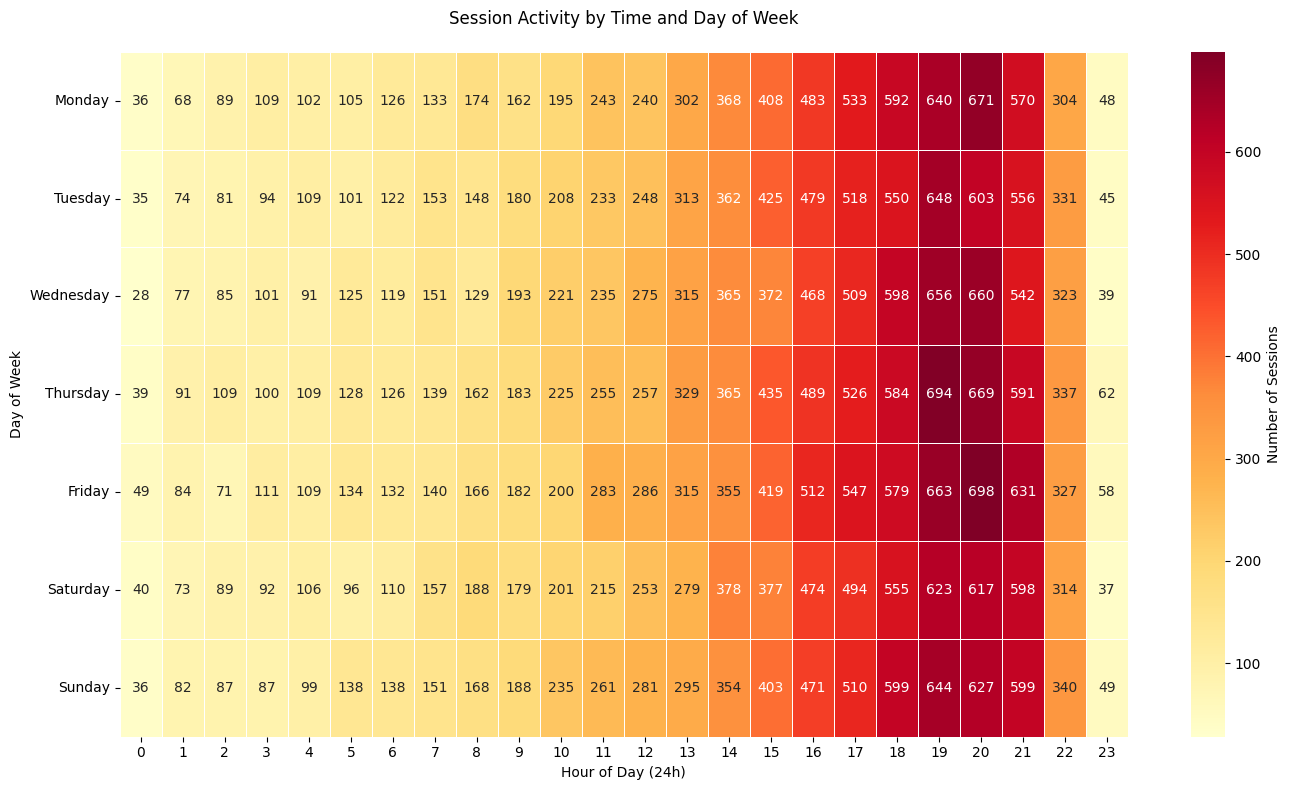

In [ ]:
heatmap_data = df_session.groupby(['day_of_week', 'hour']).size().unstack()

# 3. Reorder days (Monday-Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# 4. Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    annot=True,
    fmt='d',
    linewidths=.5,
    cbar_kws={'label': 'Number of Sessions'}
)

# 5. Customize plot
plt.title('Session Activity by Time and Day of Week', pad=20)
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Day of Week')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Session activity peak it´s alway in the evening from 19-21.

### Session duration

In [ ]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47436 entries, 0 to 47435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              47436 non-null  object        
 1   user_id                 47436 non-null  int64         
 2   trip_id                 16066 non-null  object        
 3   session_start           47436 non-null  datetime64[ns]
 4   session_end             47204 non-null  datetime64[ns]
 5   flight_discount         47436 non-null  bool          
 6   hotel_discount          47436 non-null  bool          
 7   flight_discount_amount  7971 non-null   float64       
 8   hotel_discount_amount   6015 non-null   float64       
 9   flight_booked           47436 non-null  bool          
 10  hotel_booked            47436 non-null  bool          
 11  page_clicks             47436 non-null  int64         
 12  cancellation            47436 non-null  bool  

In [ ]:
df_session['session_duration'] = (df_session['session_end'] - df_session['session_start']).dt.total_seconds() / 60

In [ ]:
# Overall average
avg_duration = df_session['session_duration'].mean()
print(f"Average session duration: {avg_duration:.1f} min")

Average session duration: 2.9 min


- AVG session duration per gender or age can be a feature engineering

####  Session duration and booked n° of flight/hotel

In [ ]:
# Clean NaNs (for safe calculations)
df_clean = df_session.dropna(subset=['session_duration'])

In [ ]:
# empty dictionary to store the counts for both flight and hotel bookings
booking_counts = {}
# Loop to count the values for 'hotel_booked' and 'flight_booked'
for col in ['hotel_booked', 'flight_booked']:
    booking_counts[col] = df_clean[col].value_counts()

In [ ]:
# Create a new column to represent the combined booking count (0, 1, or 2 bookings)
df_clean.loc[:, 'booking_count'] = df_clean[['flight_booked', 'hotel_booked']].astype(int).sum(axis=1)

<ipython-input-103-40a4e97e0dc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'booking_count'] = df_clean[['flight_booked', 'hotel_booked']].astype(int).sum(axis=1)


In [ ]:
# Map the booking_count to descriptive labels for clarity
booking_count_labels = {
    0: 'No Booking',
    1: 'One Booking (Flight or Hotel)',
    2: 'Both Booked (Flight and Hotel)'
}

# Add a new column to map the booking_count to a description
df_clean['booking_count_label'] = df_clean['booking_count'].map(booking_count_labels)

# Group by the booking count and calculate the average session duration
booking_duration_stats = df_clean.groupby('booking_count_label')['session_duration'].agg(['mean', 'count'])
print("\nSession duration stats by number of bookings per session:")
print(booking_duration_stats)



Session duration stats by number of bookings per session:
                                    mean  count
booking_count_label                            
Both Booked (Flight and Hotel)  6.754470  11834
No Booking                      1.420979  31370
One Booking (Flight or Hotel)   2.519554   4000


<ipython-input-104-5790d806b4e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['booking_count_label'] = df_clean['booking_count'].map(booking_count_labels)


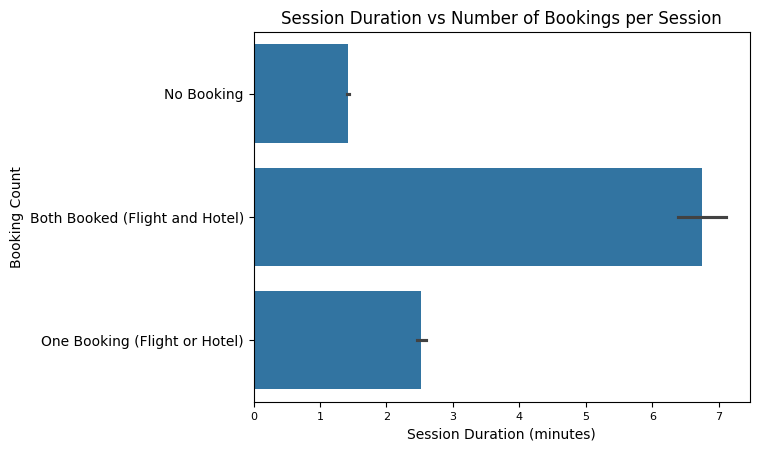

In [ ]:
# Optional: Visualization with a clear label
sns.barplot(data=df_clean, y='booking_count_label', x='session_duration')
plt.title("Session Duration vs Number of Bookings per Session")
plt.ylabel("Booking Count", )
plt.xlabel("Session Duration (minutes)")
plt.xticks(fontsize=8)
plt.show()

#### Session duration and page clicks

In [ ]:
# Explore correlation between session_duration and page_clicks
correlation = df_clean[['session_duration', 'page_clicks']].corr()
print("Correlation between session_duration and page_clicks:")
print(correlation)

Correlation between session_duration and page_clicks:
                  session_duration  page_clicks
session_duration          1.000000     0.802547
page_clicks               0.802547     1.000000


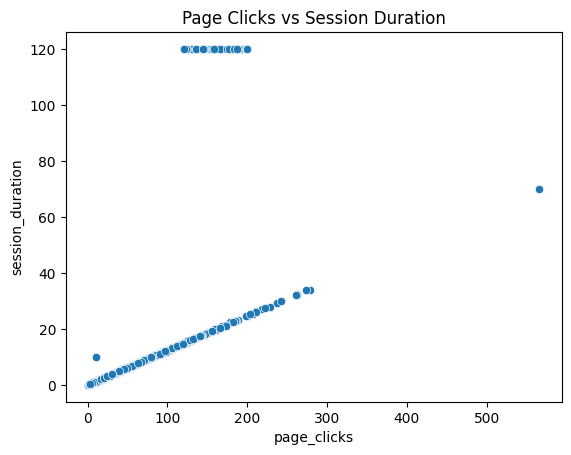

In [ ]:
# plot
sns.scatterplot(data=df_clean, x='page_clicks', y='session_duration')
plt.title('Page Clicks vs Session Duration')
plt.show()

### Convertion analysis

#### % of Sessions That Result in Bookings

In [ ]:
# Calculate booking conversion rate
total_sessions = len(df_session)
booked_sessions = df_session[(df_session['flight_booked'] == 1) | (df_session['hotel_booked'] == 1)].shape[0]
conversion_rate = (booked_sessions / total_sessions) * 100

print(f"""
Conversion Analysis:
- Total sessions: {total_sessions:,}
- Booked sessions: {booked_sessions:,}
- Conversion rate: {conversion_rate:.1f}% of sessions result in bookings
""")


Conversion Analysis:
- Total sessions: 47,436
- Booked sessions: 16,066
- Conversion rate: 33.9% of sessions result in bookings




Click Analysis:
- Total clicks: 834,786
- Clicks per booking: 52.0
- (On average, users need 52 clicks to make a booking)



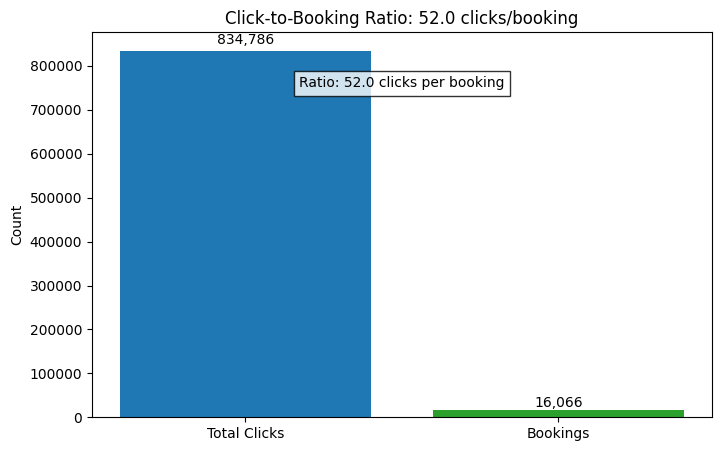

In [ ]:
 #Click-to-Booking Ratio
total_clicks = df_session['page_clicks'].sum()
click_to_booking_ratio = total_clicks / booked_sessions

print(f"""
Click Analysis:
- Total clicks: {total_clicks:,}
- Clicks per booking: {click_to_booking_ratio:.1f}
- (On average, users need {int(round(click_to_booking_ratio))} clicks to make a booking)
""")

#Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(['Total Clicks', 'Bookings'], [total_clicks, booked_sessions], color=['#1f77b4', '#2ca02c'])
plt.title('Click-to-Booking Ratio: {:.1f} clicks/booking'.format(click_to_booking_ratio))
plt.ylabel('Count')

# Add ratio as text annotation
plt.text(0.5, max(total_clicks, booked_sessions)*0.9,
         f"Ratio: {click_to_booking_ratio:.1f} clicks per booking",
         ha='center', bbox=dict(facecolor='white', alpha=0.8))

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height*1.01,
             f"{height:,}",
             ha='center', va='bottom')

plt.show()

### Heatmap of key variables: clicks vs. duration vs. bookings

In [ ]:
# let´s make a copy
session_df = df_session.copy()

# Convert session duration to minutes
session_df['session_start'] = pd.to_datetime(session_df['session_start'])
session_df['session_end'] = pd.to_datetime(session_df['session_end'])
session_df['duration_min'] = (session_df['session_end'] - session_df['session_start']).dt.total_seconds() / 60

# Create booking flags
session_df['any_booking'] = session_df['flight_booked'] | session_df['hotel_booked']
session_df['booking_type'] = session_df.apply(lambda x:
    'Both' if x['flight_booked'] and x['hotel_booked'] else
    'Flight' if x['flight_booked'] else
    'Hotel' if x['hotel_booked'] else 'None', axis=1)


In [ ]:
# Prepare correlation matrix
corr_data = session_df[['page_clicks', 'duration_min', 'flight_booked', 'hotel_booked', 'cancellation']]
corr_matrix = corr_data.corr()


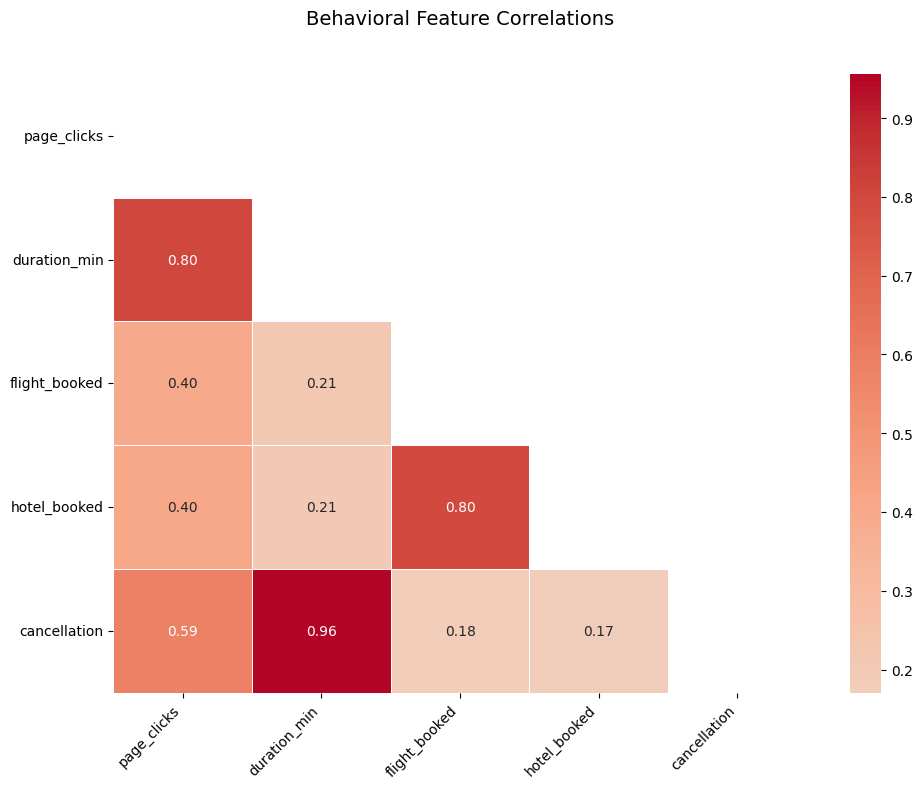

In [ ]:
# Enhanced Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            annot_kws={'size': 10},
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))  # Hide upper triangle

plt.title('Behavioral Feature Correlations\n', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Key insights:
- higher n of clicks positive correlated with longer session
- longer duration relates with more cancellation
- high correlation hotell booking and flight booking


###  cancellation rate

In [ ]:
cancel_trip_id = df_session[df_session['cancellation'] == True]['trip_id'].unique()
cancel_trip_id

array(['581491-d35d5deaf3b94448985188367b7a9c11',
       '478146-58ebe4bb5b0f4912a0c85ae5232e2935',
       '560680-54e6857f4e42431e8ad7ff187a0e0d24',
       '488314-616505f4f9fd40059b9f8844c6e1929c',
       '513787-15bb5ff1d8a94b538ca2e2c0d58c05fc',
       '562275-5b2550a902f14543a77ca64eccdce8f8',
       '521335-087c5132bfe640af9360f0d76147f698',
       '509421-231423b401c84e999eb56675a6995dee',
       '599649-419470087b72404a9a61f9ca92963971',
       '622343-2061dc37f60d410f9af97a51a7c8b676',
       '565827-22aa93ceeea24a01a41e5e1a50ceff9b',
       '331039-aeea9e6e87ab49bc9d6012a4162d82d2',
       '547100-c11a039eff2348da975f7f853f138d6f',
       '655166-b4985d2f61d24462a7df41e77b73d86c',
       '521491-12a59e8343ab4c98a8489573bac1070b',
       '547006-86c559087a7e47c6a2378ae9a769c223',
       '524194-fbd57fb047634eeb8b4dac9e0b07fc1b',
       '533932-c899b45d3a644d0a848bf066af4bbc7f',
       '504916-5761fe54f65241bc9c5a6b092da887c2',
       '566953-7f382e8ea4ba4476b4c16b6f610b9752',


In [ ]:
booked_trip_id= df_session[df_session['cancellation'] == True]['trip_id'].unique()
booked_trip_id

array(['581491-d35d5deaf3b94448985188367b7a9c11',
       '478146-58ebe4bb5b0f4912a0c85ae5232e2935',
       '560680-54e6857f4e42431e8ad7ff187a0e0d24',
       '488314-616505f4f9fd40059b9f8844c6e1929c',
       '513787-15bb5ff1d8a94b538ca2e2c0d58c05fc',
       '562275-5b2550a902f14543a77ca64eccdce8f8',
       '521335-087c5132bfe640af9360f0d76147f698',
       '509421-231423b401c84e999eb56675a6995dee',
       '599649-419470087b72404a9a61f9ca92963971',
       '622343-2061dc37f60d410f9af97a51a7c8b676',
       '565827-22aa93ceeea24a01a41e5e1a50ceff9b',
       '331039-aeea9e6e87ab49bc9d6012a4162d82d2',
       '547100-c11a039eff2348da975f7f853f138d6f',
       '655166-b4985d2f61d24462a7df41e77b73d86c',
       '521491-12a59e8343ab4c98a8489573bac1070b',
       '547006-86c559087a7e47c6a2378ae9a769c223',
       '524194-fbd57fb047634eeb8b4dac9e0b07fc1b',
       '533932-c899b45d3a644d0a848bf066af4bbc7f',
       '504916-5761fe54f65241bc9c5a6b092da887c2',
       '566953-7f382e8ea4ba4476b4c16b6f610b9752',


In [ ]:
# Calculate cancellation rates
cancellation_analysis = pd.DataFrame({
    'Flight Cancellation Rate': df_session['flight_booked'].sum() and \
                                (df_session['cancellation'].sum() / df_session['flight_booked'].sum()) * 100,
    'Hotel Cancellation Rate': df_session['hotel_booked'].sum() and \
                              (df_session['cancellation'].sum() / df_session['hotel_booked'].sum()) * 100
}, index=['Rate'])

print("Cancellation Rates (% of bookings):")
display(cancellation_analysis.round(1))

Cancellation Rates (% of bookings):


Flight Cancellation Rate  Hotel Cancellation Rate
Rate                       4.3                      4.1

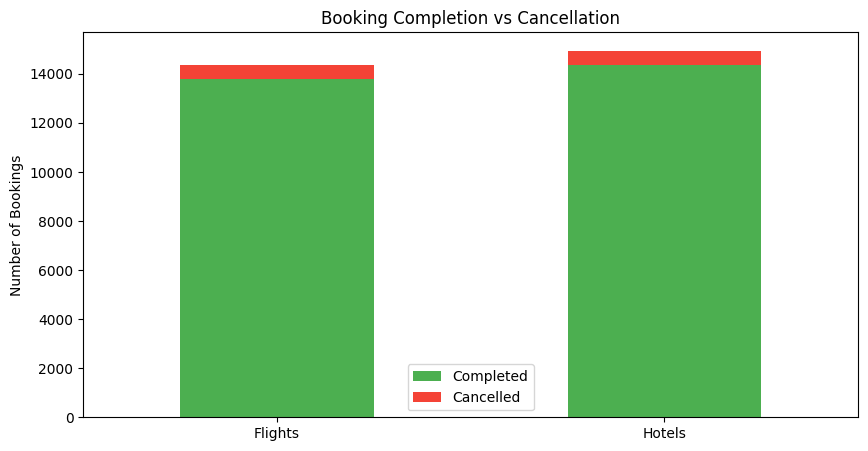

In [ ]:
# Prepare data
status_counts = pd.DataFrame({
    'Completed': [df_session['flight_booked'].sum(), df_session['hotel_booked'].sum()],
    'Cancelled': [df_session['cancellation'].sum(), df_session['cancellation'].sum()]
}, index=['Flights', 'Hotels'])

# Plot
status_counts.plot(kind='bar', stacked=True, color=['#4caf50','#f44336'], figsize=(10,5))
plt.title('Booking Completion vs Cancellation')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

user level cancellation

In [ ]:
user_cancellations = df_session.groupby('user_id').apply(
    lambda x: pd.Series({
        'total_bookings': x['flight_booked'].sum() + x['hotel_booked'].sum(),
        'total_cancellations': x['cancellation'].sum()
    })
).query('total_bookings > 0')

user_cancellations['cancel_rate'] = (user_cancellations['total_cancellations'] /
                                   user_cancellations['total_bookings']) * 100
print("Top 10 Users by Cancellation Rate:")
display(user_cancellations.sort_values('cancel_rate', ascending=False).head(10))

Top 10 Users by Cancellation Rate:


<ipython-input-117-63784a760fff>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_cancellations = df_session.groupby('user_id').apply(


total_bookings  total_cancellations  cancel_rate
user_id                                                  
182191                2                    1    50.000000
508111                2                    1    50.000000
171470                5                    2    40.000000
258451                3                    1    33.333333
491995                3                    1    33.333333
692211                3                    1    33.333333
709630                3                    1    33.333333
492497                3                    1    33.333333
377069                3                    1    33.333333
513441                3                    1    33.333333

# Features


* tenure / how long is the the person with us
* how many nights
* avg of flights cose the perso is speninding
* has a family? children?
* get te flight around the birthday?

from jupyter--> features_engineering. Let´s see how he did
1. import table
2. for example page_click= sessions.groupby('users_id')['page_clicks'].mean()  --> average of click per user it´s a sort of new mini data frame and i can save it.
page_click is then one of the new feature ( column ) for the final dataset. So calculate each column independetly and the join them together.
3. feature are columns that have to be calculated by me .
 for example :
* page_click
* hotel price = hotelrooms* nights* price x room
* fligh_price
* session_duration
* N of unique trip x user
* N of cancellation
* avergae night x user: join table session_valid_[user_id, trip id] , user_trip_id=session valid_[user_id, trip id] . drop_duplicate(),  now merge  user_trip_id with hotel--> panda.merge using key
4. feature should be user oriented because we awant to undersatand the users




## Total cost

#### calculate hotel & flight cost

In [ ]:
booked_trip_id = df_session[df_session['flight_booked'] == True]['trip_id'].unique()  # Example logic

# Now filter the df_flights DataFrame to get only the booked flights
valid_flights = df_session[df_session['trip_id'].isin(booked_trip_id)].copy()

In [ ]:
#Filterin for actually BOOKED flights first
valid_flights = df_flights[df_flights['trip_id'].isin(booked_trip_id)].copy()
#Let´s calculate Hotel cost
valid_flights['flight_cost'] = valid_flights['seats'] * valid_flights['base_fare_usd']
valid_flights['flight_cost']

0         657.64
1         221.83
2         106.00
3         640.38
4        3015.66
          ...   
13188     633.95
13189      59.34
13190     369.10
13191    7722.08
13192     508.95
Name: flight_cost, Length: 13193, dtype: float64

In [ ]:
#Filterin for actually BOOKED hotel first
valid_hotels = df_hotels[df_hotels['trip_id'].isin(booked_trip_id)].dropna().copy()
valid_hotels.dropna()

trip_id                 hotel_name  \
0      582979-5475b9940ee240bf9328a0cc0bc9900c         NH Hotel  - ottawa   
1      514785-863ac3b4eb984f1eb226d67955623a5d   Choice Hotels - montreal   
2      588386-233db0f627cf4aaaaeaa9a632daa5ec4       Accor - philadelphia   
3      600395-79e934e3dcf2462587a0beffbebd6783        Marriott  - memphis   
4      474120-a87f749cf54b4f4ca9262d07080a06b2      Accor - san francisco   
...                                        ...                        ...   
13767  583623-70097bf1d1334cfb891ac2bd09f448ae      Shangri-La - montreal   
13768  512377-acf089357a6b497d91eda34bb532578d     Marriott  - washington   
13769  497042-fa163de72e234eaf9c9bc8b477fbf66a        Hyatt - san antonio   
13770  598533-40848e5db09e46aa8f56c0c3ccdefb2d              Hyatt - macau   
13771  610144-4e95defd2af24ea190dab8b1f563fd77  Four Seasons - louisville   

       rooms check_in_time      check_out_time  hotel_per_room_usd  \
0          1    2023-03-31 2023-04-07 11:00:00                 110   
1          1    2023-06-21 2023-06-25 11:00:00                  87   
2          1    2023-04-04 2023-04-05 11:00:00                 126   
3          2    2023-04-21 2023-04-23 11:00:00                 153   
4          2    2023-02-02 2023-02-07 11:00:00                 346   
...      ...           ...                 ...                 ...   
13767      1    2023-02-23 2023-02-27 11:00:00                 142   
13768      1    2023-04-02 2023-04-08 11:00:00                 446   
13769      1    2023-04-13 2023-04-15 11:00:00                 103   
13770      1    2024-01-24 2024-02-05 11:00:00                 114   
13771      1    2023-07-05 2023-07-11 11:00:00                 341   

       new_nights  check_in_monthofyear  check_in_hour  check_out_monthofyear  \
0               6                     3             13                      4   
1               3                     6             20                      6   
2               1                     4             10                      4   
3               1                     4             15                      4   
4               4                     2             14                      2   
...           ...                   ...            ...                    ...   
13767           3                     2             17                      2   
13768           5                     4             12                      4   
13769           1                     4             11                      4   
13770          12                     1              9                      2   
13771           5                     7             17                      7   

       check_out_hour  
0                  11  
1                  11  
2                  11  
3                  11  
4                  11  
...               ...  
13767              11  
13768              11  
13769              11  
13770              11  
13771              11  

[11529 rows x 11 columns]

In [ ]:
#let´s calculate Hotel cost
valid_hotels['hotel_cost'] = (
    valid_hotels['rooms'] *
    valid_hotels['hotel_per_room_usd'] *
    valid_hotels['new_nights']
)
valid_hotels


trip_id                 hotel_name  \
0      582979-5475b9940ee240bf9328a0cc0bc9900c         NH Hotel  - ottawa   
1      514785-863ac3b4eb984f1eb226d67955623a5d   Choice Hotels - montreal   
2      588386-233db0f627cf4aaaaeaa9a632daa5ec4       Accor - philadelphia   
3      600395-79e934e3dcf2462587a0beffbebd6783        Marriott  - memphis   
4      474120-a87f749cf54b4f4ca9262d07080a06b2      Accor - san francisco   
...                                        ...                        ...   
13767  583623-70097bf1d1334cfb891ac2bd09f448ae      Shangri-La - montreal   
13768  512377-acf089357a6b497d91eda34bb532578d     Marriott  - washington   
13769  497042-fa163de72e234eaf9c9bc8b477fbf66a        Hyatt - san antonio   
13770  598533-40848e5db09e46aa8f56c0c3ccdefb2d              Hyatt - macau   
13771  610144-4e95defd2af24ea190dab8b1f563fd77  Four Seasons - louisville   

       rooms check_in_time      check_out_time  hotel_per_room_usd  \
0          1    2023-03-31 2023-04-07 11:00:00                 110   
1          1    2023-06-21 2023-06-25 11:00:00                  87   
2          1    2023-04-04 2023-04-05 11:00:00                 126   
3          2    2023-04-21 2023-04-23 11:00:00                 153   
4          2    2023-02-02 2023-02-07 11:00:00                 346   
...      ...           ...                 ...                 ...   
13767      1    2023-02-23 2023-02-27 11:00:00                 142   
13768      1    2023-04-02 2023-04-08 11:00:00                 446   
13769      1    2023-04-13 2023-04-15 11:00:00                 103   
13770      1    2024-01-24 2024-02-05 11:00:00                 114   
13771      1    2023-07-05 2023-07-11 11:00:00                 341   

       new_nights  check_in_monthofyear  check_in_hour  check_out_monthofyear  \
0               6                     3             13                      4   
1               3                     6             20                      6   
2               1                     4             10                      4   
3               1                     4             15                      4   
4               4                     2             14                      2   
...           ...                   ...            ...                    ...   
13767           3                     2             17                      2   
13768           5                     4             12                      4   
13769           1                     4             11                      4   
13770          12                     1              9                      2   
13771           5                     7             17                      7   

       check_out_hour  hotel_cost  
0                  11         660  
1                  11         261  
2                  11         126  
3                  11         306  
4                  11        2768  
...               ...         ...  
13767              11         426  
13768              11        2230  
13769              11         103  
13770              11        1368  
13771              11        1705  

[11529 rows x 12 columns]

In [ ]:
#check fot nan in valid hotels
valid_hotels[valid_hotels['hotel_cost'].isna()]

Empty DataFrame
Columns: [trip_id, hotel_name, rooms, check_in_time, check_out_time, hotel_per_room_usd, new_nights, check_in_monthofyear, check_in_hour, check_out_monthofyear, check_out_hour, hotel_cost]
Index: []

In [ ]:
df_h_f= valid_flights.merge(valid_hotels, on='trip_id', how='left')
df_h_f.head()

trip_id origin_airport    destination  \
0  582979-5475b9940ee240bf9328a0cc0bc9900c            RNO         ottawa   
1  514785-863ac3b4eb984f1eb226d67955623a5d            FTW       montreal   
2  588386-233db0f627cf4aaaaeaa9a632daa5ec4            CLE   philadelphia   
3  600395-79e934e3dcf2462587a0beffbebd6783            HOU        memphis   
4  474120-a87f749cf54b4f4ca9262d07080a06b2            YQB  san francisco   

  destination_airport  seats  return_flight_booked      departure_time  \
0                 YOW      1                  True 2023-03-31 07:00:00   
1                 YHU      1                 False 2023-06-21 15:00:00   
2                 PHL      1                  True 2023-04-04 08:00:00   
3                 MEM      2                  True 2023-04-21 13:00:00   
4                 SFO      2                  True 2023-02-02 07:00:00   

          return_time  checked_bags       trip_airline  ...  rooms  \
0 2023-04-07 07:00:00             1         Air Canada  ...    1.0   
1                 NaT             0    Delta Air Lines  ...    1.0   
2 2023-04-06 08:00:00             2  American Airlines  ...    1.0   
3 2023-04-24 13:00:00             0    Delta Air Lines  ...    2.0   
4 2023-02-07 07:00:00             0    Alaska Airlines  ...    2.0   

   check_in_time      check_out_time hotel_per_room_usd  new_nights  \
0     2023-03-31 2023-04-07 11:00:00              110.0         6.0   
1     2023-06-21 2023-06-25 11:00:00               87.0         3.0   
2     2023-04-04 2023-04-05 11:00:00              126.0         1.0   
3     2023-04-21 2023-04-23 11:00:00              153.0         1.0   
4     2023-02-02 2023-02-07 11:00:00              346.0         4.0   

   check_in_monthofyear  check_in_hour  check_out_monthofyear  check_out_hour  \
0                   3.0           13.0                    4.0            11.0   
1                   6.0           20.0                    6.0            11.0   
2                   4.0           10.0                    4.0            11.0   
3                   4.0           15.0                    4.0            11.0   
4                   2.0           14.0                    2.0            11.0   

  hotel_cost  
0      660.0  
1      261.0  
2      126.0  
3      306.0  
4     2768.0  

[5 rows x 32 columns]

In [ ]:
#check for NAN in mergers
df_h_f[df_h_f['hotel_cost'].isna()]

trip_id origin_airport   destination  \
7      548504-2e8f6613291c43cbb9557975f5e273e5            IAH   los angeles   
22     536489-bb6da6ee4eab4291ae734b0fff953b1b            TIK  jacksonville   
24     516368-9e890b48e6a540ccb8264922339f7977            DEN       seattle   
35     533490-84cc41e02e4a4869864709675299af82            BWI      new york   
37     532835-322f5a3d681e41d4b097167ae3e8795c            YVR      hamilton   
...                                        ...            ...           ...   
13146  232647-0f62c6fb78044ab0acc938fca55b097b            BHM      new york   
13154  560739-b91cdfb66dee4b618b2c383cebcc4300            LCK         tokyo   
13162  561243-a7307d49f14444d790a96ff8f116bda7            NZY        dallas   
13177  534957-cedca12ef9b94863a4bccaf97ee48e74            YYC        fresno   
13185  512610-dc7bfdb921324c9398b9168fac36f89a            LAS    washington   

      destination_airport  seats  return_flight_booked      departure_time  \
7                     LAX      1                  True 2024-02-26 15:00:00   
22                    JAX      1                  True 2023-04-24 15:00:00   
24                    BFI      4                  True 2023-10-21 21:00:00   
35                    JFK      1                  True 2023-02-11 08:00:00   
37                    HLZ      1                  True 2023-02-19 13:00:00   
...                   ...    ...                   ...                 ...   
13146                 LGA      1                  True 2023-03-03 12:00:00   
13154                 HND      2                  True 2024-01-17 15:00:00   
13162                 DAL      1                  True 2023-03-12 10:00:00   
13177                 FAT      1                  True 2023-03-25 07:00:00   
13185                 DCA      1                  True 2023-05-03 14:00:00   

              return_time  checked_bags        trip_airline  ...  rooms  \
7     2024-03-12 15:00:00             0   American Airlines  ...    NaN   
22    2023-04-25 15:00:00             1       Allegiant Air  ...    NaN   
24    2023-10-30 21:00:00             3         Kenmore Air  ...    NaN   
35    2023-02-16 08:00:00             0     Delta Air Lines  ...    NaN   
37    2023-02-20 13:00:00             1     Air New Zealand  ...    NaN   
...                   ...           ...                 ...  ...    ...   
13146 2023-03-06 12:00:00             1  Southwest Airlines  ...    NaN   
13154 2024-01-31 15:00:00             1  All Nippon Airways  ...    NaN   
13162 2023-03-13 10:00:00             0     United Airlines  ...    NaN   
13177 2023-03-27 07:00:00             0             Volaris  ...    NaN   
13185 2023-05-07 14:00:00             1          Air Canada  ...    NaN   

       check_in_time  check_out_time hotel_per_room_usd  new_nights  \
7                NaT             NaT                NaN         NaN   
22               NaT             NaT                NaN         NaN   
24               NaT             NaT                NaN         NaN   
35               NaT             NaT                NaN         NaN   
37               NaT             NaT                NaN         NaN   
...              ...             ...                ...         ...   
13146            NaT             NaT                NaN         NaN   
13154            NaT             NaT                NaN         NaN   
13162            NaT             NaT                NaN         NaN   
13177            NaT             NaT                NaN         NaN   
13185            NaT             NaT                NaN         NaN   

       check_in_monthofyear  check_in_hour  check_out_monthofyear  \
7                       NaN            NaN                    NaN   
22                      NaN            NaN                    NaN   
24                      NaN            NaN                    NaN   
35                      NaN            NaN                    NaN   
37                      NaN            NaN            

In [ ]:
df_h_f['hotel_cost'].fillna(0, inplace=True)

<ipython-input-125-85601ea75354>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_h_f['hotel_cost'].fillna(0, inplace=True)


In [ ]:
trip_cost = df_h_f[['trip_id', 'flight_cost','hotel_cost']].copy()
trip_cost['total_cost']= trip_cost['flight_cost'] + trip_cost['hotel_cost']
trip_cost

trip_id  flight_cost  hotel_cost  \
0      582979-5475b9940ee240bf9328a0cc0bc9900c       657.64       660.0   
1      514785-863ac3b4eb984f1eb226d67955623a5d       221.83       261.0   
2      588386-233db0f627cf4aaaaeaa9a632daa5ec4       106.00       126.0   
3      600395-79e934e3dcf2462587a0beffbebd6783       640.38       306.0   
4      474120-a87f749cf54b4f4ca9262d07080a06b2      3015.66      2768.0   
...                                        ...          ...         ...   
13188  583623-70097bf1d1334cfb891ac2bd09f448ae       633.95       426.0   
13189  512377-acf089357a6b497d91eda34bb532578d        59.34      2230.0   
13190  497042-fa163de72e234eaf9c9bc8b477fbf66a       369.10       103.0   
13191  598533-40848e5db09e46aa8f56c0c3ccdefb2d      7722.08      1368.0   
13192  610144-4e95defd2af24ea190dab8b1f563fd77       508.95      1705.0   

       total_cost  
0         1317.64  
1          482.83  
2          232.00  
3          946.38  
4         5783.66  
...           ...  
13188     1059.95  
13189     2289.34  
13190      472.10  
13191     9090.08  
13192     2213.95  

[13193 rows x 4 columns]

In [ ]:
#Let´s merge with session to find user_id and group by it
total_cost_byuser= trip_cost.merge(df_session, on='trip_id', how='left')
total_cost_byuser.head(30)

trip_id  flight_cost  hotel_cost  \
0   582979-5475b9940ee240bf9328a0cc0bc9900c       657.64       660.0   
1   514785-863ac3b4eb984f1eb226d67955623a5d       221.83       261.0   
2   588386-233db0f627cf4aaaaeaa9a632daa5ec4       106.00       126.0   
3   600395-79e934e3dcf2462587a0beffbebd6783       640.38       306.0   
4   474120-a87f749cf54b4f4ca9262d07080a06b2      3015.66      2768.0   
5   526855-8691d87fc4fe46ae941c577802c2056f       492.47       165.0   
6   486751-e7e65a5bc12243769cf849fa1342aac7      1375.00       436.0   
7   548504-2e8f6613291c43cbb9557975f5e273e5       398.73         0.0   
8   516704-bbf5ac8dfbcf4a0ca5d72da05cdaef8e       648.54      1110.0   
9   587483-3c7662807a0e4e6db083c6a40f8210d5       307.07       135.0   
10  532941-698a9657afc54bfe9899124d281da13f       113.83      1696.0   
11  521956-3f5c4243e6ef493cbd7a116263dbded8       173.56        97.0   
12  516269-4261337592f14d3dbe4af818324972bf       748.78       151.0   
13  620033-8462fa463ad1416f9d461ef25dc5443d       878.42      2366.0   
14  620033-8462fa463ad1416f9d461ef25dc5443d       878.42      2366.0   
15  569572-58e7ec8d1ac3467e8995d0f821219ead       189.49       154.0   
16  559981-3fd703a6f75d4a298498bcf54a213e73       143.32       180.0   
17  540666-7e2dbdb4bdf045299f3a154ad0e4e312       723.54       422.0   
18  566650-0b3813724eed4f649dcb91062192f0f0       321.28       129.0   
19  529362-5f76615d6e8f4458a4d7f4396664b25b       418.41       149.0   
20  526062-06393c397ab04b0293f5ee1206ef414b       764.44      2968.0   
21  528122-e8d223794f87496f813eb959225566f6        92.64       157.0   
22  503418-efcfc88341d74b4187268dd7c18aa9f9       712.10       540.0   
23  536489-bb6da6ee4eab4291ae734b0fff953b1b       248.86         0.0   
24  608629-5848be11a4ff445bb777d516e689aaed       204.61       194.0   
25  516368-9e890b48e6a540ccb8264922339f7977      4800.80         0.0   
26  516368-9e890b48e6a540ccb8264922339f7977      4800.80         0.0   
27  542208-a10ed4525eed4f19b87a0619a24e4457       706.96       904.0   
28  630738-ed3e73bba8bd4baa87baa36938740a88       165.61       330.0   
29  548120-b4ca37705802480ba52f6f0deed5835d       312.83       264.0   

    total_cost                               session_id  user_id  \
0      1317.64  582979-c49e6e60fbd1413bbb98a4fb97fe829a   582979   
1       482.83  514785-2df3b592495b4c89af4f7f37ed39d093   514785   
2       232.00  588386-6eeb3eb39b334940abfa117c3c03ddaa   588386   
3       946.38  600395-dba9316c27c04710b1d69a9f5982fab3   600395   
4      5783.66  474120-895e18d5bf924852b06154730d455ae8   474120   
5       657.47  526855-fe98044e6d0b4f0189b1e2e16919428f   526855   
6      1811.00  486751-74e11a4783ed4fe69d9377e01043e1a9   486751   
7       398.73  548504-2232935af2bb4f64b5acd4435f93bd79   548504   
8      1758.54  516704-7cd7370a1c1047d89f396adef87ea9f0   516704   
9       442.07  587483-370d90940fa348dead64bfa490b5bbf9   587483   
10     1809.83  532941-b8b2a8966356471cb1086dd3aeb52dfd   532941   
11      270.56  521956-a9ad68820dec4b82ae2300a59f306ad2   521956   
12      899.78  516269-beb949f87b99417392198ead5cda5e84   516269   
13     3244.42  620033-c34b7fd277644467b2f6b424ccfc1ea0   620033   
14     3244.42  620033-0b10ee4165f543e9bca8068375065d60   620033   
15      343.49  569572-f53bfae8a87a4d3691d3deb42eb4a0b9   569572   
16      323.32  559981-d04751e4906c49368ea653529fe7fe97   559981   
17     1145.54  540666-31161eb858f6442e859eb25f508fb817   540666   
18      450.28  566650-7b2887b8508c4620b2e9299b61321c5c   566650   
19      567.41  529362-146f8077dcf94c038bc27f2bec15a58b   529362   
20     3732.44  526062-cdd7b43ee62e4844ae3d5a682cf3fd7e   526062   
21      249.64  528122-e70ad3b61d574f4787d0c3cf5ec50c3d   528122   
22     1252.10  503418-a6e555c2ea244a50b62fdfe80045cee8   503418   
23      248.86  536489-82f9519d19fd45ada8d1f3e515ce2dd7   536489   
24      398.61  608629-6d6c5ed7c0ba483796322fdb2377c52e   608629   
25     4800.80  516368-d56b384437f6

#### Feature 1: Final calculation how much users spend for flight / hotel

In [ ]:
#finally let´s see the total cost per user (feature 1)
total_cost_byuser_grouped = total_cost_byuser.groupby('user_id').agg(
    total_spending=('total_cost', 'sum'),
    total_flight_cost=('flight_cost', 'sum'),
    total_hotel_cost=('hotel_cost', 'sum'),
    num_trips=('trip_id', 'count'),
    avg_spending=('total_cost', 'mean')
).reset_index()
total_cost_byuser_grouped.head(10)

user_id  total_spending  total_flight_cost  total_hotel_cost  num_trips  \
0    94883         1717.26            1487.26             230.0          2   
1   101486          948.91             189.91             759.0          1   
2   101961         3671.66            1242.66            2429.0          5   
3   106907       175338.72          166824.72            8514.0          2   
4   118043         9026.56            5126.56            3900.0          3   
5   125845         3152.70            2463.70             689.0          3   
6   133058          423.51             423.51               0.0          1   
7   152583          793.83             367.83             426.0          1   
8   153982         1337.87             656.87             681.0          3   
9   160754          521.62              93.62             428.0          1   

   avg_spending  
0    858.630000  
1    948.910000  
2    734.332000  
3  87669.360000  
4   3008.853333  
5   1050.900000  
6    423.510000  
7    793.830000  
8    445.956667  
9    521.620000

### Feature 2: price segmentation by user

In [ ]:
# Create price segmentation based on total_spending
bins = [0, 500, 2000, float('inf')]  # Custom thresholds: low (<500), medium (500-2000), high (>2000)
labels = ['Low Spender', 'Medium Spender', 'High Spender']
total_cost_byuser_grouped['price_segment'] = pd.cut(total_cost_byuser_grouped['total_spending'], bins=bins, labels=labels)

# Create a new mini dataset with user_id and price segment
price_segmentation_df = total_cost_byuser_grouped[['user_id', 'price_segment']]

# Check the first few rows
price_segmentation_df.head(10)


user_id   price_segment
0    94883  Medium Spender
1   101486  Medium Spender
2   101961    High Spender
3   106907    High Spender
4   118043    High Spender
5   125845    High Spender
6   133058     Low Spender
7   152583  Medium Spender
8   153982  Medium Spender
9   160754  Medium Spender

### Feature 3:Correlation price and trip_duration

In [ ]:
#let´s merge d_h_f with session to get user_id
df_h_f_s= df_h_f.merge(df_session, on='trip_id', how='left')
df_h_f_s.head()

trip_id origin_airport    destination  \
0  582979-5475b9940ee240bf9328a0cc0bc9900c            RNO         ottawa   
1  514785-863ac3b4eb984f1eb226d67955623a5d            FTW       montreal   
2  588386-233db0f627cf4aaaaeaa9a632daa5ec4            CLE   philadelphia   
3  600395-79e934e3dcf2462587a0beffbebd6783            HOU        memphis   
4  474120-a87f749cf54b4f4ca9262d07080a06b2            YQB  san francisco   

  destination_airport  seats  return_flight_booked      departure_time  \
0                 YOW      1                  True 2023-03-31 07:00:00   
1                 YHU      1                 False 2023-06-21 15:00:00   
2                 PHL      1                  True 2023-04-04 08:00:00   
3                 MEM      2                  True 2023-04-21 13:00:00   
4                 SFO      2                  True 2023-02-02 07:00:00   

          return_time  checked_bags       trip_airline  ...  hotel_discount  \
0 2023-04-07 07:00:00             1         Air Canada  ...            True   
1                 NaT             0    Delta Air Lines  ...           False   
2 2023-04-06 08:00:00             2  American Airlines  ...           False   
3 2023-04-24 13:00:00             0    Delta Air Lines  ...           False   
4 2023-02-07 07:00:00             0    Alaska Airlines  ...           False   

   flight_discount_amount  hotel_discount_amount flight_booked  hotel_booked  \
0                     NaN                    0.1          True          True   
1                     NaN                    NaN          True          True   
2                     NaN                    NaN          True          True   
3                     NaN                    NaN          True          True   
4                     NaN                    NaN          True          True   

   page_clicks  cancellation  hour  day_of_week session_duration  
0           26         False    21      Tuesday         3.266667  
1           24         False    16       Friday         2.916667  
2           17         False    16       Friday         2.033333  
3           30         False    21       Monday         3.766667  
4           18         False    21       Monday         2.233333  

[5 rows x 47 columns]

In [ ]:
print(df_h_f_s.columns)

Index(['trip_id', 'origin_airport', 'destination', 'destination_airport',
       'seats', 'return_flight_booked', 'departure_time', 'return_time',
       'checked_bags', 'trip_airline', 'destination_airport_lat',
       'destination_airport_lon', 'base_fare_usd', 'trip_type',
       'trip_duration_days', 'departure_month', 'departure_hour',
       'return_month', 'return_hour', 'price_segment', 'flight_cost',
       'hotel_name', 'rooms', 'check_in_time', 'check_out_time',
       'hotel_per_room_usd', 'new_nights', 'check_in_monthofyear',
       'check_in_hour', 'check_out_monthofyear', 'check_out_hour',
       'hotel_cost', 'session_id', 'user_id', 'session_start', 'session_end',
       'flight_discount', 'hotel_discount', 'flight_discount_amount',
       'hotel_discount_amount', 'flight_booked', 'hotel_booked', 'page_clicks',
       'cancellation', 'hour', 'day_of_week', 'session_duration'],
      dtype='object')


In [ ]:
trip_duration_user = df_h_f_s[['user_id', 'trip_duration_days']]
trip_duration_user

user_id  trip_duration_days
0       582979                 7.0
1       514785                 NaN
2       588386                 2.0
3       600395                 3.0
4       474120                 5.0
...        ...                 ...
13722   512377                 6.0
13723   497042                 3.0
13724   598533                14.0
13725   598533                14.0
13726   610144                 7.0

[13727 rows x 2 columns]

In [ ]:
#now we can merge total cost and trip duration
cost_duration_user= total_cost_byuser_grouped.merge(trip_duration_user, on='user_id', how='left')
cost_duration_user

user_id  total_spending  total_flight_cost  total_hotel_cost  \
0        94883         1717.26            1487.26             230.0   
1        94883         1717.26            1487.26             230.0   
2       101486          948.91             189.91             759.0   
3       101961         3671.66            1242.66            2429.0   
4       101961         3671.66            1242.66            2429.0   
...        ...             ...                ...               ...   
13722   796032        10982.76            9721.76            1261.0   
13723   801660         1281.96             409.96             872.0   
13724   801660         1281.96             409.96             872.0   
13725   801660         1281.96             409.96             872.0   
13726   811077         1431.79             579.79             852.0   

       num_trips  avg_spending   price_segment  trip_duration_days  
0              2       858.630  Medium Spender                 2.0  
1              2       858.630  Medium Spender                 1.0  
2              1       948.910  Medium Spender                 4.0  
3              5       734.332    High Spender                 5.0  
4              5       734.332    High Spender                 8.0  
...          ...           ...             ...                 ...  
13722          4      2745.690    High Spender                 9.0  
13723          3       427.320  Medium Spender                 3.0  
13724          3       427.320  Medium Spender                 3.0  
13725          3       427.320  Medium Spender                 3.0  
13726          1      1431.790  Medium Spender                 8.0  

[13727 rows x 8 columns]

In [ ]:
# Calculate the correlation between total spending and trip duration
correlation = cost_duration_user[['total_spending', 'trip_duration_days']].corr()

# Display the correlation matrix
print(correlation)

                    total_spending  trip_duration_days
total_spending            1.000000            0.241822
trip_duration_days        0.241822            1.000000


very weak positive correlation

In [ ]:
cost_duration_user_unique = cost_duration_user.drop_duplicates(subset='user_id', keep='first')
cost_duration_user_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4984 entries, 0 to 13726
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   user_id             4984 non-null   int64   
 1   total_spending      4984 non-null   float64 
 2   total_flight_cost   4984 non-null   float64 
 3   total_hotel_cost    4984 non-null   float64 
 4   num_trips           4984 non-null   int64   
 5   avg_spending        4984 non-null   float64 
 6   price_segment       4984 non-null   category
 7   trip_duration_days  4779 non-null   float64 
dtypes: category(1), float64(5), int64(2)
memory usage: 316.5 KB


### Feature 4: discount usage

In [ ]:
df_h_f_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  13727 non-null  object        
 1   origin_airport           13727 non-null  object        
 2   destination              13727 non-null  object        
 3   destination_airport      13727 non-null  object        
 4   seats                    13727 non-null  int64         
 5   return_flight_booked     13727 non-null  bool          
 6   departure_time           13727 non-null  datetime64[ns]
 7   return_time              13135 non-null  datetime64[ns]
 8   checked_bags             13727 non-null  int64         
 9   trip_airline             13727 non-null  object        
 10  destination_airport_lat  13727 non-null  float64       
 11  destination_airport_lon  13727 non-null  float64       
 12  base_fare_usd            13727 n

Let´s see if the users used any discount at all

In [ ]:
# Create a new column 'used_discount' to indicate if the user used any discount (either flight or hotel)
df_h_f_s['used_discount'] = df_h_f_s['flight_discount'] | df_h_f_s['hotel_discount']
#df_h_f_s['used_discount']

In [ ]:
# Discount used grouped by user_id
discount_usage_user = df_h_f_s.groupby('user_id')['used_discount'].sum().reset_index()

# total discount amount per user (sum of flight and hotel discounts)
df_h_f_s['total_discount'] = df_h_f_s['flight_discount_amount'].fillna(0) + df_h_f_s['hotel_discount_amount'].fillna(0)

# Group by user_id to sum the total discount amount across all trips for each user
total_discount_user = df_h_f_s.groupby('user_id')['total_discount'].sum().reset_index()


### merging all


In [ ]:
# Merge the discount usage and total discount with total_cost per user
total_cost_features = total_cost_byuser_grouped.merge(discount_usage_user, on='user_id', how='left')

# Check the final DataFrame
total_cost_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            4984 non-null   int64   
 1   total_spending     4984 non-null   float64 
 2   total_flight_cost  4984 non-null   float64 
 3   total_hotel_cost   4984 non-null   float64 
 4   num_trips          4984 non-null   int64   
 5   avg_spending       4984 non-null   float64 
 6   price_segment      4984 non-null   category
 7   used_discount      4984 non-null   int64   
dtypes: category(1), float64(4), int64(3)
memory usage: 277.7 KB


## Demographic features

#### Feature 5: demographic filtered df

In [ ]:
# Select demographic features from the users DataFrame
demographic_features = df_users[['user_id', 'age', 'gender', 'married', 'has_children']].copy()
demographic_features = demographic_features.drop_duplicates(subset=['user_id'])
demographic_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       5782 non-null   int64 
 1   age           5782 non-null   int64 
 2   gender        5782 non-null   object
 3   married       5782 non-null   bool  
 4   has_children  5782 non-null   bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 146.9+ KB


#### (EDA) Spending cost across age

In [ ]:
# Group by age_group and calculate average total spending
#spending_by_age = demographic_cost.groupby('age_group')['total_spending'].mean().sort_index()

# Plot
#spending_by_age.plot(kind='bar', color='mediumseagreen')
#plt.title('Average Total Spending by Age Group')
#plt.xlabel('Age Group')
#plt.ylabel('Average Total Spending')
#plt.xticks(rotation=360)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()

## Booking behaviour:



#### Feature 6: Booking rate

In [ ]:
# Calculate conversion rate for each session
df_session['conversion_rate'] = df_session.apply(
    lambda x: 1 if (x['flight_booked'] == 1) or (x['hotel_booked'] == 1) else 0, axis=1
)

# Now group by user_id and calculate the mean conversion rate per user
session_to_booking = df_session.groupby('user_id')['conversion_rate'].mean().reset_index()

# Check the first few rows
session_to_booking.head()


user_id  conversion_rate
0    94883            0.250
1   101486            0.250
2   101961            0.625
3   106907            0.250
4   118043            0.625

#### Feature 7: N click per session

In [ ]:
# Calculate the number of clicks per session
df_session['clicks_per_session'] = df_session['page_clicks']  # If the clicks are already in the 'clicks' column

# If you want to group by user_id to get the total clicks per user:
clicks_per_user = df_session.groupby('user_id')['page_clicks'].sum().reset_index()

# Check the result
clicks_per_user.head()

user_id  page_clicks
0    94883           73
1   101486          131
2   101961          126
3   106907          240
4   118043          164

#### Feature 8: One way booker or two ways booker

In [ ]:
# Create a new column to mark one-way or two-way bookings
df_session['booking_type'] = df_session.apply(
    lambda row: 'two-way' if row['flight_booked'] == 1 and row['hotel_booked'] == 1 else 'one-way', axis=1
)

# Group by user_id and get the booking type for each user (we can use 'first' here to check any booking type for the user)
user_booking_type = df_session.groupby('user_id')['booking_type'].first().reset_index()

# Check the result
user_booking_type.head()

user_id booking_type
0    94883      one-way
1   101486      one-way
2   101961      one-way
3   106907      one-way
4   118043      one-way

#### Feature 9:  Booking preference

In [ ]:
# First, drop the rows with NaN values in the booking columns
df_session_clean = df_session.dropna(subset=['flight_booked', 'hotel_booked'])

In [ ]:
# Create a new column to represent booking preference for each user based on df_session_clean
df_session_clean['booking_preference'] = df_session_clean.apply(
    lambda row: 'Both' if row['flight_booked'] and row['hotel_booked']
               else ('Flight only' if row['flight_booked']
                     else ('Hotel only' if row['hotel_booked'] else 'Neither')),
    axis=1
)

In [ ]:
# Now, let's calculate how many users prefer each type of booking by grouping on 'user_id'
booking_preference_user = df_session_clean.groupby('user_id')['booking_preference'].agg(lambda x: x.mode()[0]).reset_index()
print(booking_preference_user.head())

   user_id booking_preference
0    94883            Neither
1   101486            Neither
2   101961               Both
3   106907            Neither
4   118043            Neither


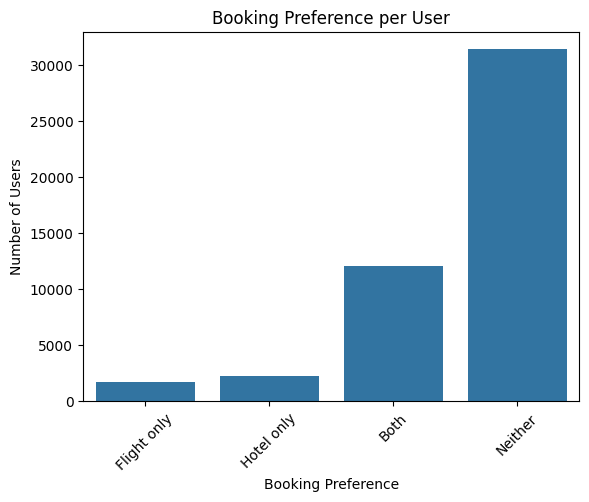

In [ ]:
sns.countplot(data=df_session_clean, x='booking_preference', order=['Flight only', 'Hotel only', 'Both', 'Neither'])
plt.title("Booking Preference per User")
plt.xlabel("Booking Preference")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

####  Feature 10: Total booking per user

In [ ]:
# Calculate the total booking per user by summing the flight and hotel bookings
df_session['total_bookings'] = df_session[['flight_booked', 'hotel_booked']].sum(axis=1)

In [ ]:
# Now, group by 'user_id' and calculate the total number of bookings per user
total_bookings_per_user = df_session.groupby('user_id')['total_bookings'].sum()
total_bookings_per_user = total_bookings_per_user.reset_index()

In [ ]:
total_bookings_per_user

user_id  total_bookings
0       94883               4
1      101486               3
2      101961              10
3      106907               4
4      118043               7
...       ...             ...
5777   792549               5
5778   796032               7
5779   801660               6
5780   811077               2
5781   844489               0

[5782 rows x 2 columns]

#### Feature 11: Cancellation rate

In [ ]:
# Calculate total bookings and total cancellations per user
user_cancellations = df_session.groupby('user_id').apply(
    lambda x: pd.Series({
        'total_bookings': x['flight_booked'].sum() + x['hotel_booked'].sum(),
        'total_cancellations': x['cancellation'].sum()
    })
).query('total_bookings > 0')

# Calculate the cancellation rate per user
user_cancellations['cancel_rate'] = (user_cancellations['total_cancellations'] /
                                   user_cancellations['total_bookings']) * 100

# Reset the index to make sure 'user_id' is a column
user_cancellations = user_cancellations.reset_index()

# Now user_cancellations has 'user_id' as a column and can be merged correctly
print("Top 10 Users by Cancellation Rate:")
display(user_cancellations.sort_values('cancel_rate', ascending=False).head(10))


Top 10 Users by Cancellation Rate:


<ipython-input-152-c70fcb17c7eb>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_cancellations = df_session.groupby('user_id').apply(


user_id  total_bookings  total_cancellations  cancel_rate
15     182191               2                    1    50.000000
650    508111               2                    1    50.000000
11     171470               5                    2    40.000000
35     258451               3                    1    33.333333
459    491995               3                    1    33.333333
5243   692211               3                    1    33.333333
5275   709630               3                    1    33.333333
464    492497               3                    1    33.333333
85     377069               3                    1    33.333333
928    513441               3                    1    33.333333

#### merging all

In [ ]:

booking_behaviour_feature = session_to_booking.merge(clicks_per_user, on='user_id', how='left')  # f_6 + f7
booking_behaviour_feature = booking_behaviour_feature.merge(user_booking_type, on='user_id', how='left')  # f8
booking_behaviour_feature = booking_behaviour_feature.merge(booking_preference_user, on='user_id', how='left')  # f9
booking_behaviour_feature = booking_behaviour_feature.merge(total_bookings_per_user, on='user_id', how='left')  # f10
booking_behaviour_feature = booking_behaviour_feature.merge(user_cancellations, on='user_id', how='left')  # f11
booking_behaviour_feature.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              5782 non-null   int64  
 1   conversion_rate      5782 non-null   float64
 2   page_clicks          5782 non-null   int64  
 3   booking_type         5782 non-null   object 
 4   booking_preference   5782 non-null   object 
 5   total_bookings_x     5782 non-null   int64  
 6   total_bookings_y     5336 non-null   float64
 7   total_cancellations  5336 non-null   float64
 8   cancel_rate          5336 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 406.7+ KB


## Loyalty & Engagement:

#### Feature 12: over all engagement

In [ ]:
df_session['activity_rate'] = (df_session['flight_booked'] + df_session['hotel_booked'] + df_session['page_clicks']+df_session['cancellation']) / df_session['session_duration'] # activity normalised on session duration
#user aggregation
activity_rate_by_user = df_session.groupby('user_id')['activity_rate'].sum().reset_index()
activity_rate_by_user

user_id  activity_rate
0       94883      64.918560
1      101486      65.138120
2      101961      66.614913
3      106907      56.066173
4      118043      66.191998
...       ...            ...
5777   792549      66.103961
5778   796032      57.593761
5779   801660      65.857010
5780   811077      63.584884
5781   844489      64.040110

[5782 rows x 2 columns]

#### Feature 13: Trip per user

In [ ]:
trips_per_user = df_session.groupby('user_id')['trip_id'].nunique().reset_index()

# Rename the column to something meaningful
trips_per_user.rename(columns={'trip_id': 'num_trips'}, inplace=True)

# Check the result
trips_per_user.head()

user_id  num_trips
0    94883          2
1   101486          2
2   101961          5
3   106907          1
4   118043          5

#### Feature 14 Clients status: old/new customer

In [ ]:
#calling previous EDA calculation
df_users['cohort'] = np.where(
    df_users['sign_up_month'] > 6,
    'Old Clients',
    'New Clients'
)
df_users

user_id  birthdate gender  married  has_children home_country  \
0      531931 1984-05-26      F    False         False          usa   
1      611065 1981-08-20      F    False         False          usa   
2      586762 1987-09-26      F    False         False       canada   
3      229330 1976-11-08      F     True         False          usa   
4      536035 1995-11-09      M    False         False          usa   
...       ...        ...    ...      ...           ...          ...   
5777   521235 1989-06-21      F    False         False          usa   
5778   591155 1982-12-26      M     True         False       canada   
5779   600351 1976-07-15      F     True         False          usa   
5780   577044 1969-07-26      F     True          True          usa   
5781   597300 1987-09-04      F     True          True          usa   

             home_city home_airport  home_airport_lat  home_airport_lon  \
0             san jose          SJC            37.362          -121.929   
1          los angeles          LAX            33.942          -118.408   
2             montreal          YUL            45.468           -73.741   
3     colorado springs          COS            38.806          -104.700   
4             new york          LGA            40.777           -73.872   
...                ...          ...               ...               ...   
5777           seattle          SEA            47.449          -122.309   
5778           windsor          YQG            42.276           -82.956   
5779          portland          PDX            45.589          -122.597   
5780           chicago          UGN            42.422           -87.868   
5781          new york          JFK            40.640           -73.779   

     sign_up_date  age   age_bin  sign_up_year  sign_up_month sign_up_weekday  \
0      2023-01-15   40  (33, 49]          2023              1          Sunday   
1      2023-02-22   43  (33, 49]          2023              2       Wednesday   
2      2023-02-11   37  (33, 49]          2023              2        Saturday   
3      2022-06-27   48  (33, 49]          2022              6          Monday   
4      2023-01-17   29  (17, 33]          2023              1         Tuesday   
...           ...  ...       ...           ...            ...             ...   
5777   2023-01-10   35  (33, 49]          2023              1         Tuesday   
5778   2023-02-13   42  (33, 49]          2023              2          Monday   
5779   2023-02-17   48  (33, 49]          2023              2          Friday   
5780   2023-02-06   55  (49, 65]          2023              2          Monday   
5781   2023-02-16   37  (33, 49]          2023              2        Thursday   

           cohort  
0     New Clients  
1     New Clients  
2     New Clients  
3     New Clients  
4     New Clients  
...           ...  
5777  New Clients  
5778  New Clients  
5779  New Clients  
5780  New Clients  
5781  New Clients  

[5782 rows x 17 columns]

In [ ]:
# Extract the 'user_id' and 'cohort' columns from df_users
client_status_df = df_users[['user_id', 'cohort']]
client_status_df

user_id       cohort
0      531931  New Clients
1      611065  New Clients
2      586762  New Clients
3      229330  New Clients
4      536035  New Clients
...       ...          ...
5777   521235  New Clients
5778   591155  New Clients
5779   600351  New Clients
5780   577044  New Clients
5781   597300  New Clients

[5782 rows x 2 columns]

#### Feature 15: Average session duration

In [ ]:
# Calculate the average session duration per user
avg_session_duration_per_user = df_session.groupby('user_id')['session_duration'].mean().reset_index()

# Rename the column to reflect that it's the average duration
avg_session_duration_per_user.rename(columns={'session_duration': 'avg_session_duration'}, inplace=True)

# Check the result
avg_session_duration_per_user.head()


user_id  avg_session_duration
0    94883              1.129167
1   101486              2.037500
2   101961              1.962500
3   106907              2.821429
4   118043              2.552083

### merging all

In [ ]:
# Merge activity_rate_by_user with trips_per_user
engagement_features = activity_rate_by_user.merge(trips_per_user, on='user_id', how='left')  # f12 + f13
engagement_features = engagement_features.merge(client_status_df, on='user_id', how='left')  # f14
engagement_features = engagement_features.merge(avg_session_duration_per_user, on='user_id', how='left')  # f15
engagement_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               5782 non-null   int64  
 1   activity_rate         5782 non-null   float64
 2   num_trips             5782 non-null   int64  
 3   cohort                5782 non-null   object 
 4   avg_session_duration  5782 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 226.0+ KB


## Preferences


#### Feature 16: favourite destination

In [ ]:
# Step 1: Group by user_id and destination, count the occurrences of each destination
user_destinations = df_h_f_s.groupby(['user_id', 'destination']).size().reset_index(name='destination_count')

# Step 2: For each user, get the destination with the maximum count
favourite_destination = user_destinations.loc[user_destinations.groupby('user_id')['destination_count'].idxmax()]

# Step 3: Merge it with the user data to get the favourite destination for each user
favourite_destination = favourite_destination[['user_id', 'destination']]

# View the final result
favourite_destination.head()


user_id   destination
0    94883  jacksonville
2   101486      edmonton
3   101961     charlotte
8   106907        durban
9   118043       el paso

## Final feature table

Merge all in the final_user_features df

In [ ]:
final_features_df = total_cost_features.merge(demographic_features, on='user_id', how='left')  # total_cost + demographic
final_features_df = final_features_df.merge(booking_behaviour_feature, on='user_id', how='left')  # booking_behaviour
final_features_df = final_features_df.merge(engagement_features, on='user_id', how='left')  # engagement_features
final_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   user_id               4984 non-null   int64   
 1   total_spending        4984 non-null   float64 
 2   total_flight_cost     4984 non-null   float64 
 3   total_hotel_cost      4984 non-null   float64 
 4   num_trips_x           4984 non-null   int64   
 5   avg_spending          4984 non-null   float64 
 6   price_segment         4984 non-null   category
 7   used_discount         4984 non-null   int64   
 8   age                   4984 non-null   int64   
 9   gender                4984 non-null   object  
 10  married               4984 non-null   bool    
 11  has_children          4984 non-null   bool    
 12  conversion_rate       4984 non-null   float64 
 13  page_clicks           4984 non-null   int64   
 14  booking_type          4984 non-null   object  
 15  book

In [ ]:
# Define the file path
file_path = base_path+ 'final_features.csv'
# Export the dataframe to CSV
final_features_df.to_csv(file_path, index=False)



# Pre- Segmentation

#### Df inspecting

In [ ]:
df = pd.read_csv(base_path + "final_features.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               4984 non-null   int64  
 1   total_spending        4984 non-null   float64
 2   total_flight_cost     4984 non-null   float64
 3   total_hotel_cost      4984 non-null   float64
 4   num_trips_x           4984 non-null   int64  
 5   avg_spending          4984 non-null   float64
 6   price_segment         4984 non-null   object 
 7   used_discount         4984 non-null   int64  
 8   age                   4984 non-null   int64  
 9   gender                4984 non-null   object 
 10  married               4984 non-null   bool   
 11  has_children          4984 non-null   bool   
 12  conversion_rate       4984 non-null   float64
 13  page_clicks           4984 non-null   int64  
 14  booking_type          4984 non-null   object 
 15  booking_preference   

In [ ]:
# Clean the gender column (remove whitespace & standardize case)
df['gender'] = df['gender'].str.strip().str.upper()
# Map to numerical values
gender_map = {'M': 0, 'F': 1, 'O': 2}
df['gender'] = df['gender'].map(gender_map)


In [ ]:
# Drop non-numeric and categorical columns before clustering
columns_to_drop = ['user_id', 'booking_type', 'booking_preference', 'cohort','price_segment']
df_filtered = df.drop(columns=columns_to_drop)

# If 'married' and 'has_children' are booleans, they might be already numeric (0 or 1),
# but you can ensure this by converting them to int if necessary.
df_filtered['married'] = df_filtered['married'].astype(int)
df_filtered['has_children'] = df_filtered['has_children'].astype(int)
df_filtered['gender'] = df_filtered['gender'].astype(int)

# Now df_clustering is ready for clustering
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_spending        4984 non-null   float64
 1   total_flight_cost     4984 non-null   float64
 2   total_hotel_cost      4984 non-null   float64
 3   num_trips_x           4984 non-null   int64  
 4   avg_spending          4984 non-null   float64
 5   used_discount         4984 non-null   int64  
 6   age                   4984 non-null   int64  
 7   gender                4984 non-null   int64  
 8   married               4984 non-null   int64  
 9   has_children          4984 non-null   int64  
 10  conversion_rate       4984 non-null   float64
 11  page_clicks           4984 non-null   int64  
 12  total_bookings_x      4984 non-null   int64  
 13  total_bookings_y      4984 non-null   float64
 14  total_cancellations   4984 non-null   float64
 15  cancel_rate          

#### plot distributions

In [ ]:
#let´s make a copy
df_copy= df_filtered.copy()
df_copy.head()

total_spending  total_flight_cost  total_hotel_cost  num_trips_x  \
0         1717.26            1487.26             230.0            2   
1          948.91             189.91             759.0            1   
2         3671.66            1242.66            2429.0            5   
3       175338.72          166824.72            8514.0            2   
4         9026.56            5126.56            3900.0            3   

   avg_spending  used_discount  age  gender  married  has_children  \
0    858.630000              0   53       1        1             0   
1    948.910000              0   52       1        1             1   
2    734.332000              1   44       1        1             0   
3  87669.360000              0   46       1        1             1   
4   3008.853333              1   52       1        0             1   

   conversion_rate  page_clicks  total_bookings_x  total_bookings_y  \
0            0.250           73                 4               4.0   
1            0.250          131                 3               3.0   
2            0.625          126                10              10.0   
3            0.250          240                 4               4.0   
4            0.625          164                 7               7.0   

   total_cancellations  cancel_rate  activity_rate  num_trips_y  \
0                  0.0          0.0      64.918560            2   
1                  0.0          0.0      65.138120            2   
2                  0.0          0.0      66.614913            5   
3                  1.0         25.0      56.066173            1   
4                  0.0          0.0      66.191998            5   

   avg_session_duration  
0              1.129167  
1              2.037500  
2              1.962500  
3              2.821429  
4              2.552083

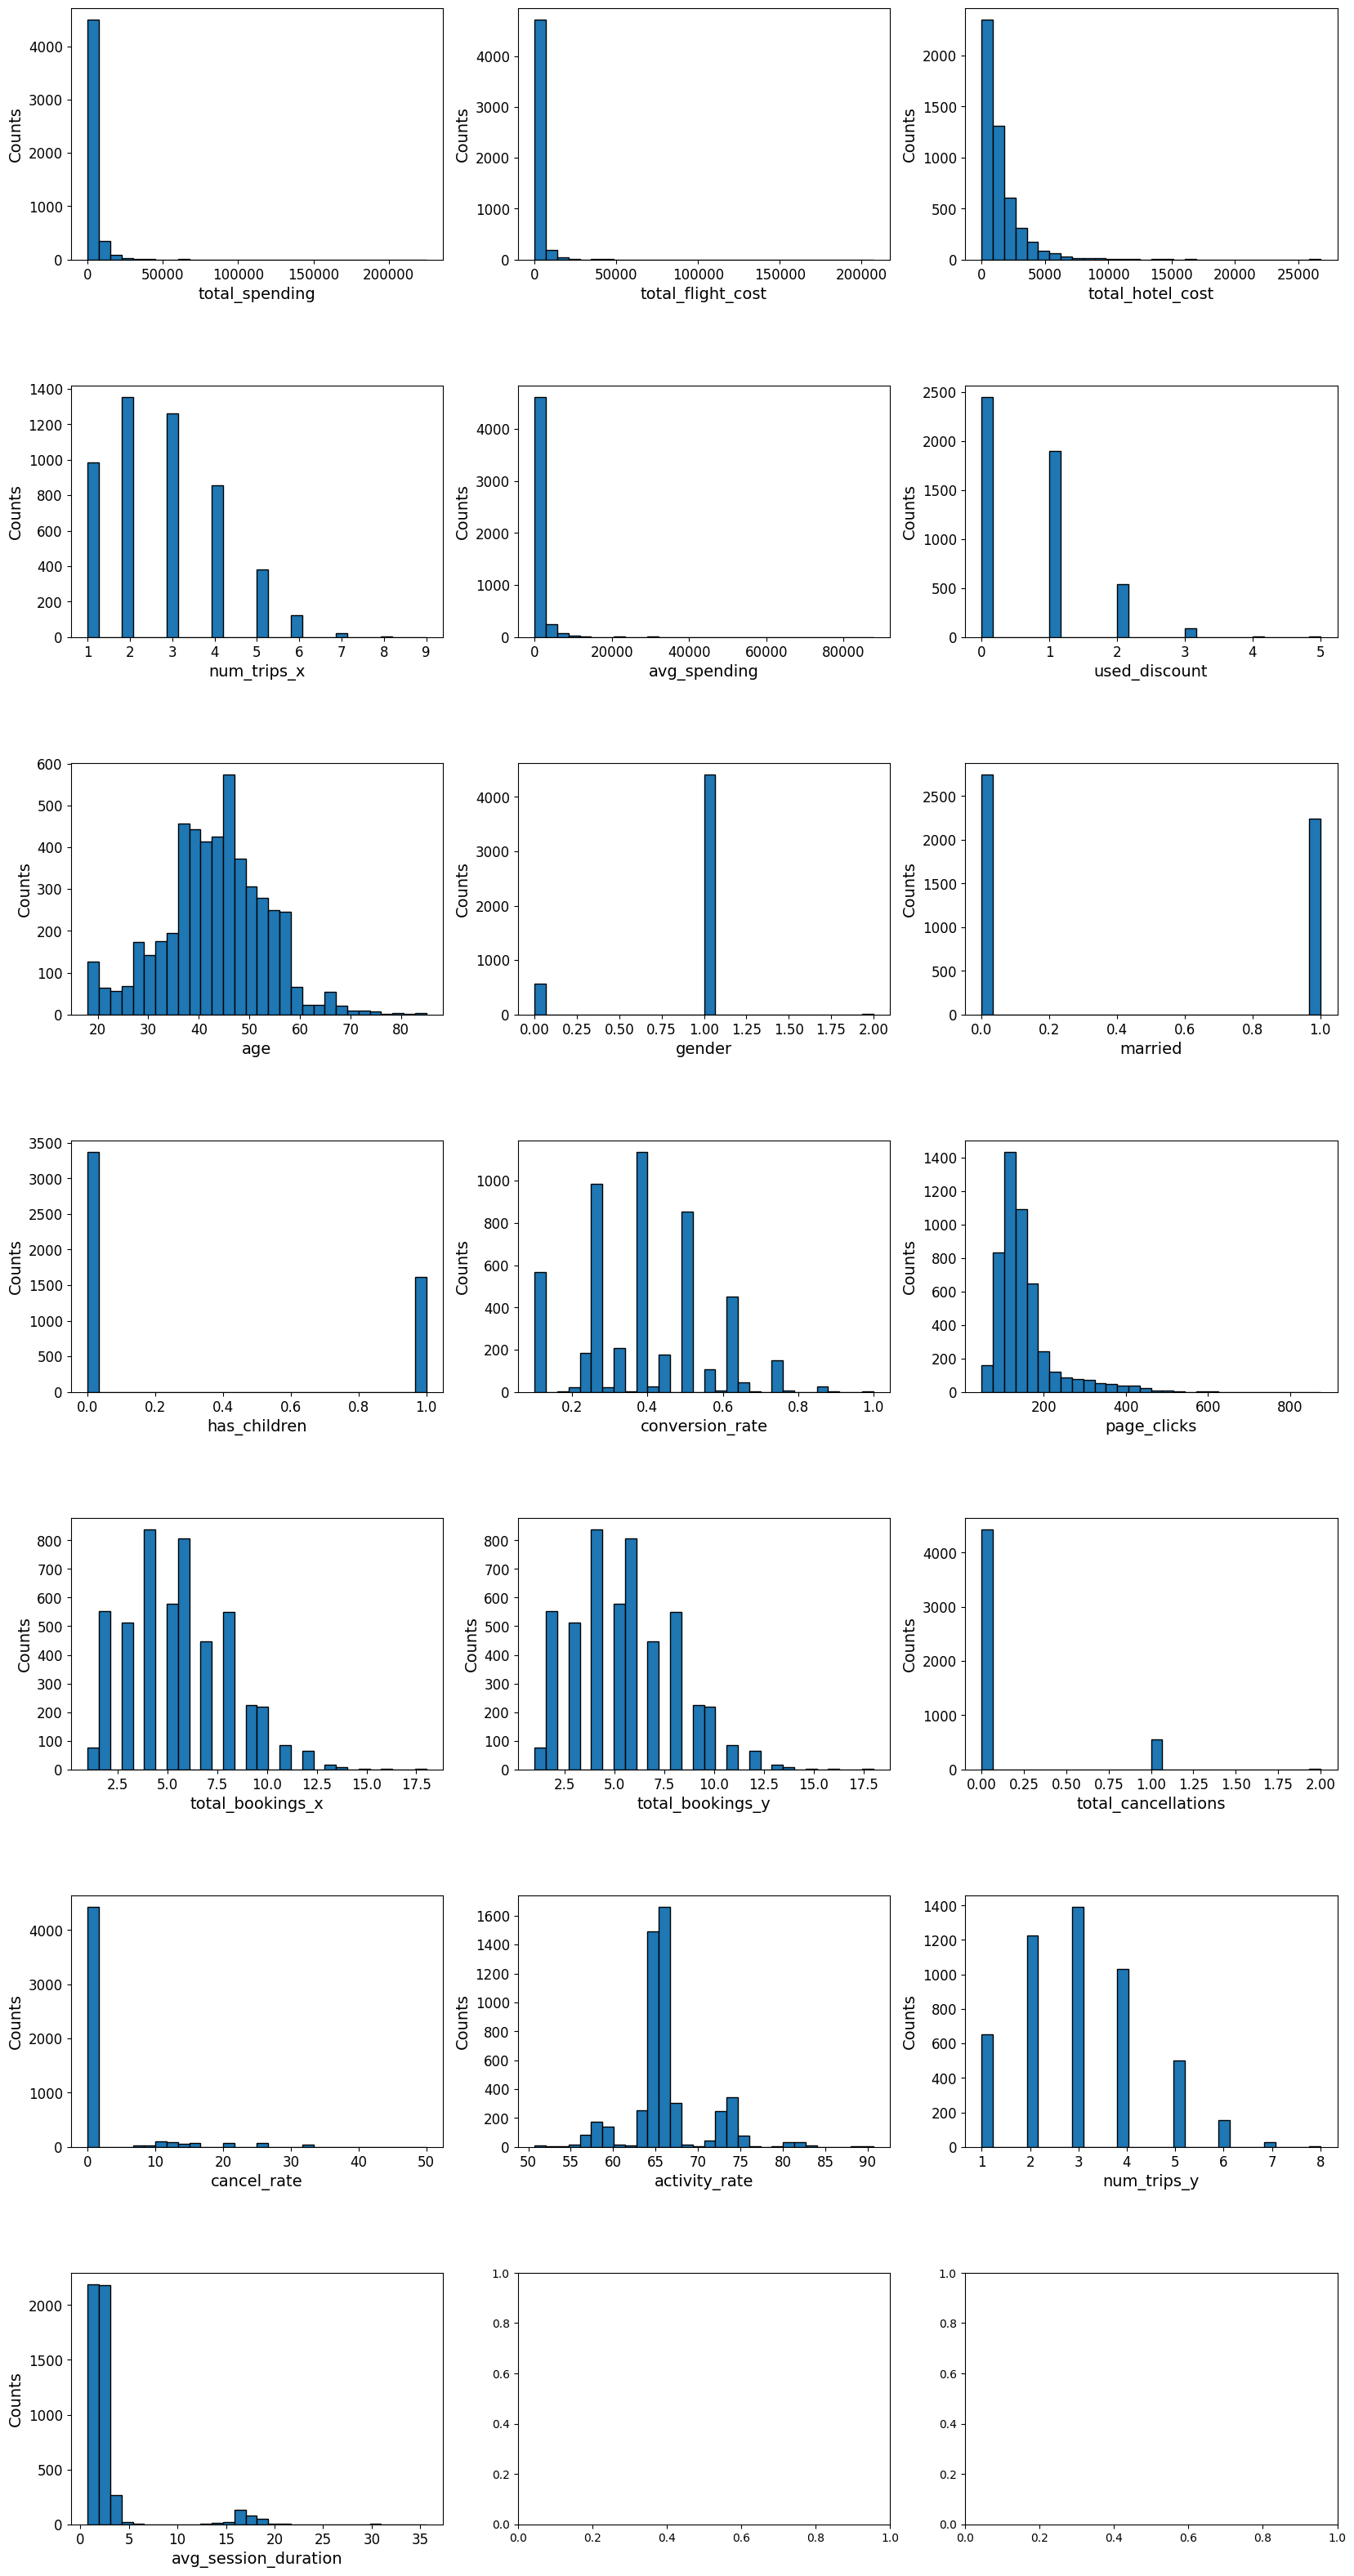

In [ ]:
# Let's check distributions
fig, axs = plt.subplots(7, 3, figsize=(20, 40))
axs = axs.flatten()

# Plot histograms for each column
for i, col in enumerate(df_copy):
    axs[i].hist(df_copy[col], bins=30, edgecolor='black')  # Changed feature_final_df to df
    axs[i].set_xlabel(col, fontsize=14)
    axs[i].set_ylabel('Counts', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

# Adjust layout manually (increase spacing between subplots)
plt.subplots_adjust(hspace=0.5, wspace=0.2)  # You can adjust these values

# Show the plot
plt.show()

#### correlation matrix

In [ ]:
def plotCorrelationMatrix(df, figsize=(10, 8)):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Check if there are numeric columns
    if numeric_df.empty:
        print("No numeric columns to plot.")
        return

    # Compute the correlation matrix
    corr = numeric_df.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Generate a heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

    # Set title and adjust layout
    plt.title('Correlation Matrix')
    plt.tight_layout()

    # Show plot
    plt.show()

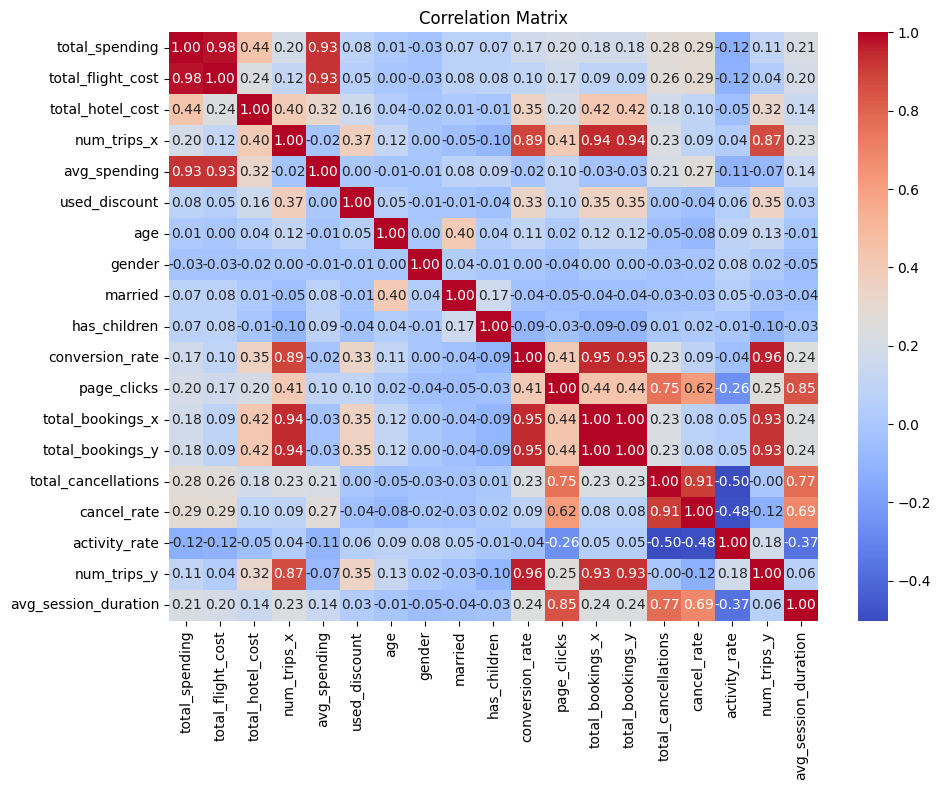

In [ ]:
plotCorrelationMatrix(df_copy)

#### Removing outliers

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit on your features (no scaling yet!)
iso = IsolationForest(contamination=0.05, random_state=42)  # 5% outliers expected
outliers = iso.fit_predict(df_copy)  # Use raw numeric data

# Keep only inliers (label = 1)
df_no_outliers = df_copy[outliers == 1].copy()
df_no_outliers

total_spending  total_flight_cost  total_hotel_cost  num_trips_x  \
0            1717.26            1487.26             230.0            2   
1             948.91             189.91             759.0            1   
2            3671.66            1242.66            2429.0            5   
4            9026.56            5126.56            3900.0            3   
5            3152.70            2463.70             689.0            3   
...              ...                ...               ...          ...   
4979          644.35             353.35             291.0            2   
4980         1183.17            1039.17             144.0            4   
4981        10982.76            9721.76            1261.0            4   
4982         1281.96             409.96             872.0            3   
4983         1431.79             579.79             852.0            1   

      avg_spending  used_discount  age  gender  married  has_children  \
0       858.630000              0   53       1        1             0   
1       948.910000              0   52       1        1             1   
2       734.332000              1   44       1        1             0   
4      3008.853333              1   52       1        0             1   
5      1050.900000              1   41       1        1             0   
...            ...            ...  ...     ...      ...           ...   
4979    322.175000              0   45       1        1             1   
4980    295.792500              0   47       1        0             0   
4981   2745.690000              1   52       1        1             0   
4982    427.320000              1   55       1        1             1   
4983   1431.790000              0   46       1        1             1   

      conversion_rate  page_clicks  total_bookings_x  total_bookings_y  \
0            0.250000           73                 4               4.0   
1            0.250000          131                 3               3.0   
2            0.625000          126                10              10.0   
4            0.625000          164                 7               7.0   
5            0.333333          159                 6               6.0   
...               ...          ...               ...               ...   
4979         0.250000          173                 4               4.0   
4980         0.500000          114                 5               5.0   
4981         0.500000          148                 7               7.0   
4982         0.375000          115                 6               6.0   
4983         0.125000          105                 2               2.0   

      total_cancellations  cancel_rate  activity_rate  num_trips_y  \
0                     0.0     0.000000      64.918560            2   
1                     0.0     0.000000      65.138120            2   
2                     0.0     0.000000      66.614913            5   
4                     0.0     0.000000      66.191998            5   
5                     0.0     0.000000      73.850923            3   
...                   ...          ...            ...          ...   
4979                  0.0     0.000000      64.430580            2   
4980                  0.0     0.000000      66.103961            4   
4981                  1.0    14.285714      57.593761            3   
4982                  0.0     0.000000      65.857010            3   
4983                  0.0     0.000000      63.584884            1   

      avg_session_duration  
0                 1.129167  
1                 2.037500  
2                 1.962500  
4                 2.552083  
5                 2.196296  
...                    ...  
4979              2.685417  
4980              1.781250  
4981              1.519048  
4982              1.766667  
4983              1.652083  

[4734 rows x 19 columns]

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
scaled_df = scaler.fit_transform(df_no_outliers)
scaled_df

array([[-4.73618527e-01, -1.15921752e-01, -7.73657025e-01, ...,
        -3.83056542e-01, -7.72320376e-01, -5.04376143e-01],
       [-7.40460655e-01, -7.27853001e-01, -4.07582315e-01, ...,
        -3.30360675e-01, -7.72320376e-01, -1.82562584e-01],
       [ 2.05129771e-01, -2.31294153e-01,  7.48078868e-01, ...,
         2.40800294e-02,  1.53732249e+00, -2.09134346e-01],
       ...,
       [ 2.74421936e+00,  3.76810944e+00, -6.01919474e-02, ...,
        -2.14105930e+00, -2.43942001e-03, -3.66245159e-01],
       [-6.24794916e-01, -6.24060292e-01, -3.29384882e-01, ...,
        -1.57821847e-01, -2.43942001e-03, -2.78516168e-01],
       [-5.72760093e-01, -5.43955244e-01, -3.43225135e-01, ...,
        -7.03148084e-01, -1.54220133e+00, -3.19111915e-01]])

# PCA

In [ ]:
from sklearn.decomposition import PCA # import PCA
import numpy as np

In [ ]:
# PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_df)
pca_result


array([[-2.03285630e+00, -3.72955866e-01,  6.94671763e-02, ...,
         7.39688027e-03,  3.54644486e-16, -7.04619800e-16],
       [-2.58316516e+00,  2.32799427e-01,  8.45097424e-03, ...,
         1.26999070e-02, -3.55724271e-16,  7.25164239e-16],
       [ 3.29329587e+00, -1.63529136e+00, -1.27912315e+00, ...,
        -3.91564934e-02,  6.25317854e-16, -5.45981791e-16],
       ...,
       [ 3.64554483e+00,  3.25483028e+00,  3.37080165e+00, ...,
        -3.04876495e-02,  5.18651997e-16, -1.56422905e-15],
       [-3.21068674e-01, -7.55551079e-01, -1.00188744e+00, ...,
        -1.47771783e-02,  5.69633152e-16,  2.21410293e-16],
       [-3.47465774e+00,  4.89428127e-01,  9.00077925e-01, ...,
         4.27395475e-02, -8.94679785e-17, -1.71834720e-16]])

In [ ]:
pca.explained_variance_ratio_

array([3.16034903e-01, 1.67870444e-01, 1.27597790e-01, 7.59345059e-02,
       5.34427484e-02, 4.97599400e-02, 4.47888103e-02, 4.29397799e-02,
       3.75472712e-02, 2.99261755e-02, 2.35768235e-02, 1.10323400e-02,
       8.29836803e-03, 5.55750612e-03, 3.09501715e-03, 2.50608596e-03,
       9.14923473e-05, 0.00000000e+00, 0.00000000e+00])

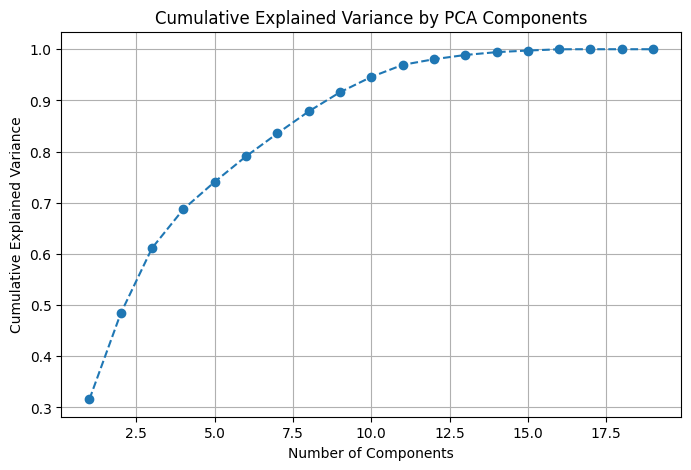

In [ ]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# only first 7 components are needed
pca_result = pca_result[:, :7]
pca_result

array([[-2.0328563 , -0.37295587,  0.06946718, ...,  0.41817406,
        -1.06827771,  0.11706099],
       [-2.58316516,  0.23279943,  0.00845097, ...,  0.07793281,
         0.75734872, -0.36419789],
       [ 3.29329587, -1.63529136, -1.27912315, ...,  0.25331735,
        -0.36553171,  0.23257634],
       ...,
       [ 3.64554483,  3.25483028,  3.37080165, ..., -0.11070408,
        -0.57065414,  1.6670355 ],
       [-0.32106867, -0.75555108, -1.00188744, ..., -0.12367012,
         0.97983668,  0.53394404],
       [-3.47465774,  0.48942813,  0.90007792, ...,  0.02314837,
         0.91294336, -0.03884968]])

# k-mean Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
X = pca_result # df_scaled can also be used

#### finding optimal N° of cluster Silhouette score

K=2, Silhouette Score: 0.2734
K=3, Silhouette Score: 0.2903
K=4, Silhouette Score: 0.2873
K=5, Silhouette Score: 0.1995
K=6, Silhouette Score: 0.2154
K=7, Silhouette Score: 0.2019
K=8, Silhouette Score: 0.2075
K=9, Silhouette Score: 0.2109
K=10, Silhouette Score: 0.1966


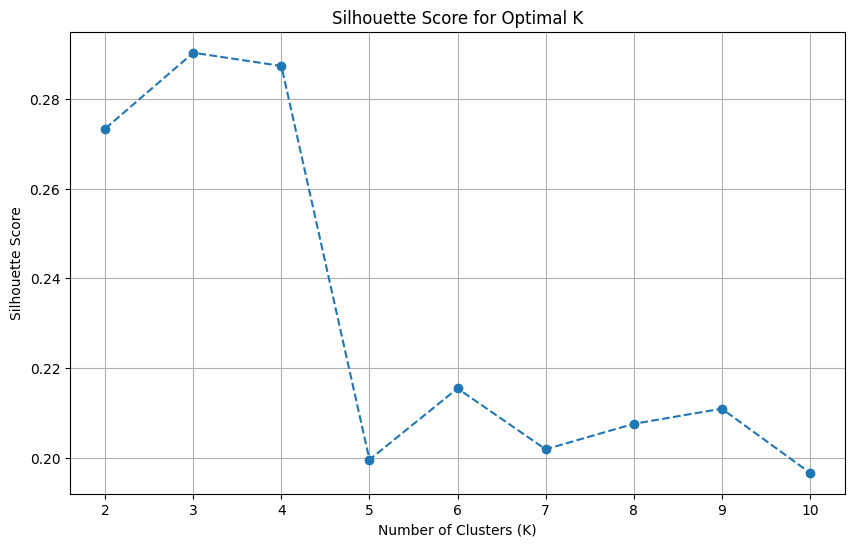


Optimal number of clusters (K): 3


In [ ]:
# Find optimal K using Silhouette Score
silhouette_scores = []
k_range = range(2, 11)  # Test K from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=100, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.grid(True)
plt.show()

# Best K (highest Silhouette Score)
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (K): {best_k}")

#### findung optimal N° of cluster WCSS score

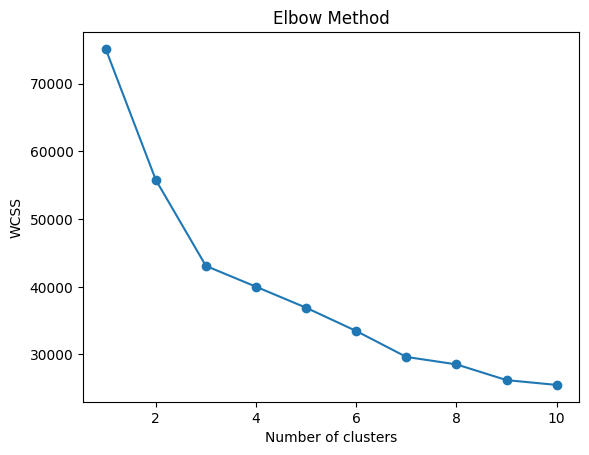

In [ ]:
# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

both suggest 2 (to 3) clusters
but the instructur used 5 .. i want to try 5 too

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=100,random_state=42) #7
kmeans.fit(X)

KMeans(n_clusters=5, n_init=100, random_state=42)

#### K-mean cluster results

In [ ]:
kmeans.labels_


array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [ ]:
df_no_outliers['cluster'] = kmeans.labels_
df_no_outliers

total_spending  total_flight_cost  total_hotel_cost  num_trips_x  \
0            1717.26            1487.26             230.0            2   
1             948.91             189.91             759.0            1   
2            3671.66            1242.66            2429.0            5   
4            9026.56            5126.56            3900.0            3   
5            3152.70            2463.70             689.0            3   
...              ...                ...               ...          ...   
4979          644.35             353.35             291.0            2   
4980         1183.17            1039.17             144.0            4   
4981        10982.76            9721.76            1261.0            4   
4982         1281.96             409.96             872.0            3   
4983         1431.79             579.79             852.0            1   

      avg_spending  used_discount  age  gender  married  has_children  ...  \
0       858.630000              0   53       1        1             0  ...   
1       948.910000              0   52       1        1             1  ...   
2       734.332000              1   44       1        1             0  ...   
4      3008.853333              1   52       1        0             1  ...   
5      1050.900000              1   41       1        1             0  ...   
...            ...            ...  ...     ...      ...           ...  ...   
4979    322.175000              0   45       1        1             1  ...   
4980    295.792500              0   47       1        0             0  ...   
4981   2745.690000              1   52       1        1             0  ...   
4982    427.320000              1   55       1        1             1  ...   
4983   1431.790000              0   46       1        1             1  ...   

      total_cancellations  cancel_rate  activity_rate  num_trips_y  \
0                     0.0     0.000000      64.918560            2   
1                     0.0     0.000000      65.138120            2   
2                     0.0     0.000000      66.614913            5   
4                     0.0     0.000000      66.191998            5   
5                     0.0     0.000000      73.850923            3   
...                   ...          ...            ...          ...   
4979                  0.0     0.000000      64.430580            2   
4980                  0.0     0.000000      66.103961            4   
4981                  1.0    14.285714      57.593761            3   
4982                  0.0     0.000000      65.857010            3   
4983                  0.0     0.000000      63.584884            1   

      avg_session_duration  cluster           cluster_label  age_group  \
0                 1.129167        0           High Spenders      51-60   
1                 2.037500        0           High Spenders      51-60   
2                 1.962500        4            Low Spenders      41-50   
4                 2.552083        3            Low Spenders      51-60   
5                 2.196296        1  High Cancellation Rate      41-50   
...                    ...      ...                     ...        ...   
4979              2.685417        0           High Spenders      41-50   
4980              1.781250        1  High Cancellation Rate      41-50   
4981              1.519048        3       Moderate Spenders      51-60   
4982              1.766667        1  High Cancellation Rate      51-60   
4983              1.652083        0           High Spenders      41-50   

      marital_status  has_children_status  
0            Married                   No  
1            Married                  Yes  
2            Married                   No  
4        Not Married                  Yes  
5            Married                   No  
...              ...                  ...  
4979         Married                  Yes  
4980     Not Married                   No  
4981         Married                   No  
4982      

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4734 entries, 0 to 4983
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_spending        4734 non-null   float64 
 1   total_flight_cost     4734 non-null   float64 
 2   total_hotel_cost      4734 non-null   float64 
 3   num_trips_x           4734 non-null   int64   
 4   avg_spending          4734 non-null   float64 
 5   used_discount         4734 non-null   int64   
 6   age                   4734 non-null   int64   
 7   gender                4734 non-null   int64   
 8   married               4734 non-null   int64   
 9   has_children          4734 non-null   int64   
 10  conversion_rate       4734 non-null   float64 
 11  page_clicks           4734 non-null   int64   
 12  total_bookings_x      4734 non-null   int64   
 13  total_bookings_y      4734 non-null   float64 
 14  total_cancellations   4734 non-null   float64 
 15  cancel_ra

In [ ]:
df_no_outliers['cluster'].value_counts()

cluster
0    1662
1    1561
4     940
2     318
3     253
Name: count, dtype: int64

#### exporting cluster results

In [ ]:
# Define the file path
file_path = base_path+ 'df_no_outliers.csv'
# Export the dataframe to CSV
df_no_outliers.to_csv(file_path, index=False)

# Analysing clusters

In [ ]:
# Define the cluster labels
cluster_labels = {
    0: 'Low Spenders',
    1: 'High Spenders',
    2: 'Frequent Travelers ',
    3: 'Moderate Spenders',
    4: 'High Cancellation Rate'
}

# Map the cluster numbers in the DataFrame to the labels
df_no_outliers['cluster_label'] = df_no_outliers['cluster'].map(cluster_labels)

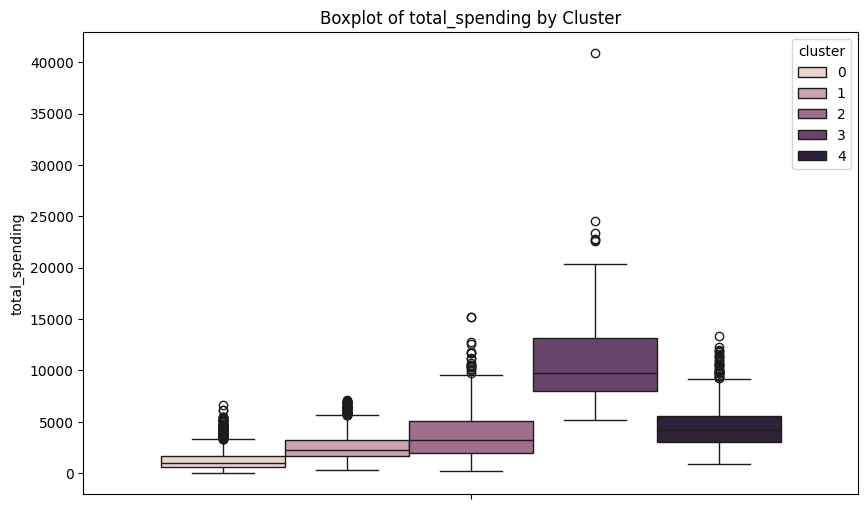

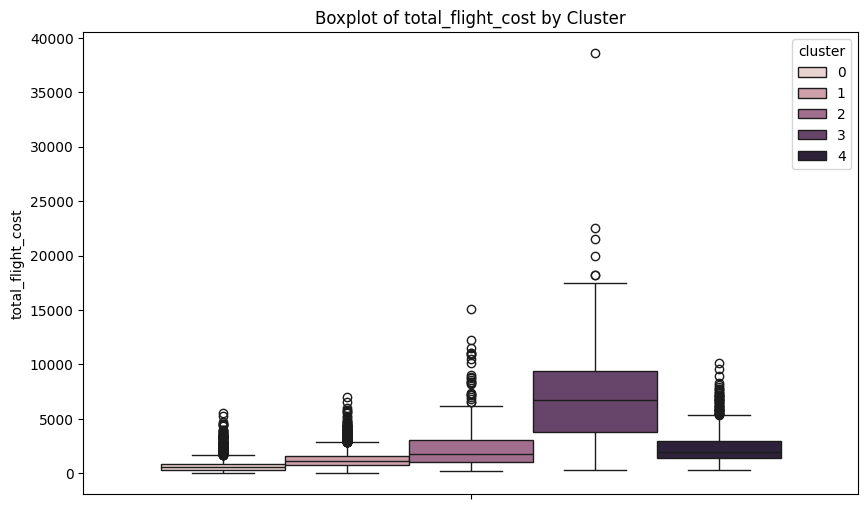

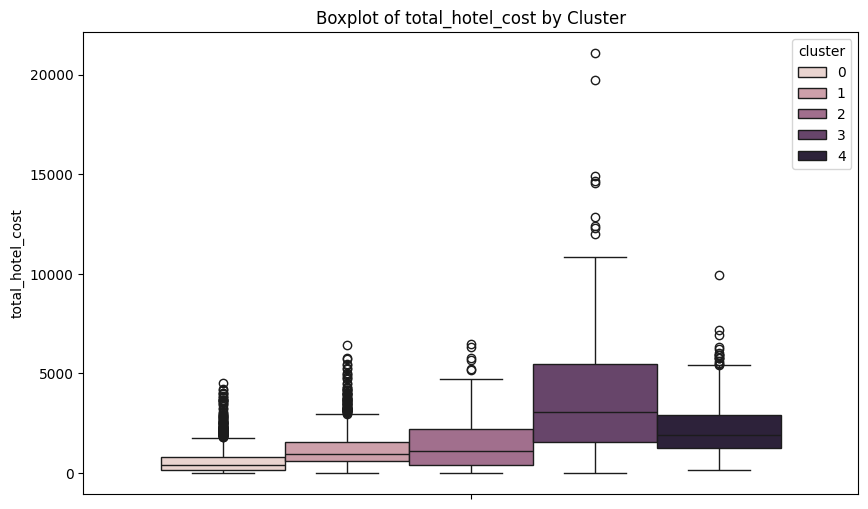

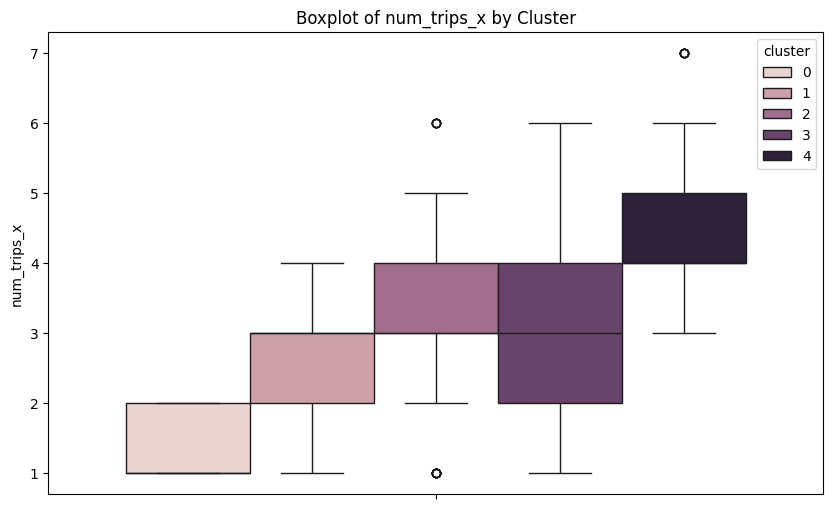

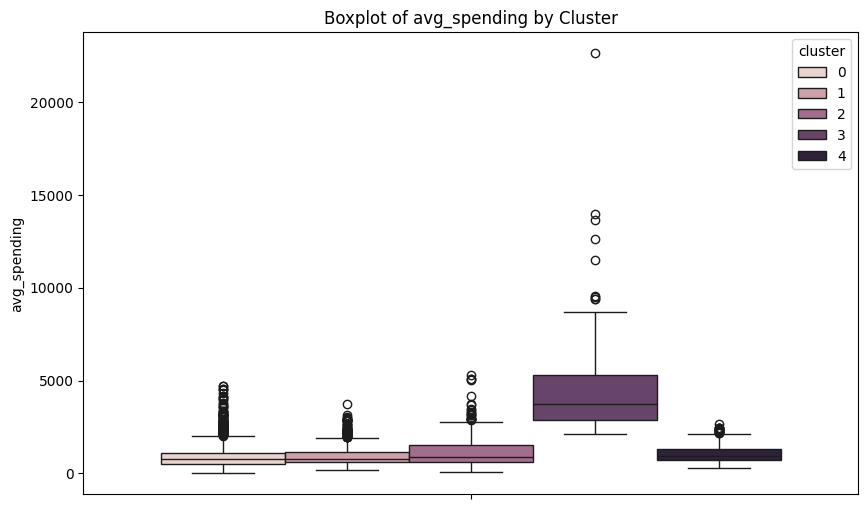

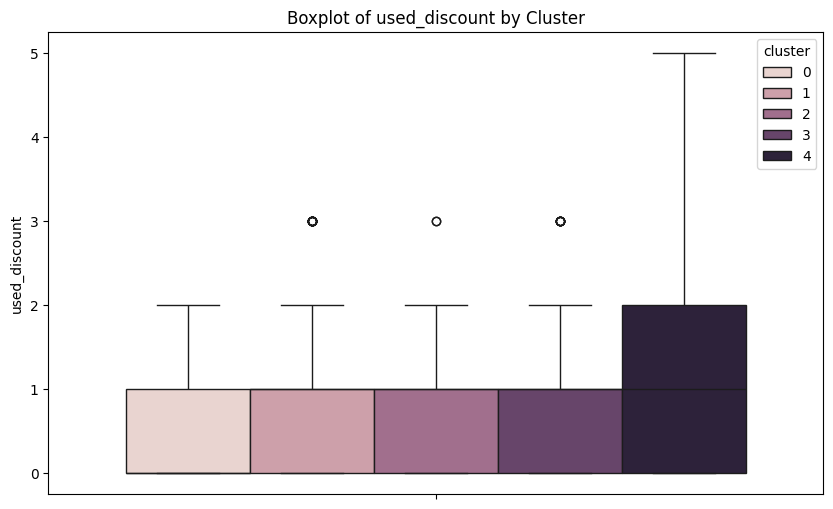

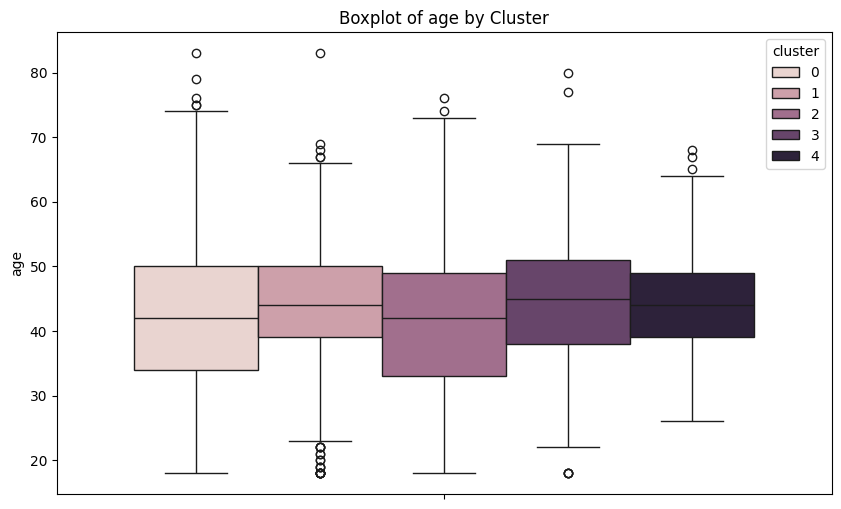

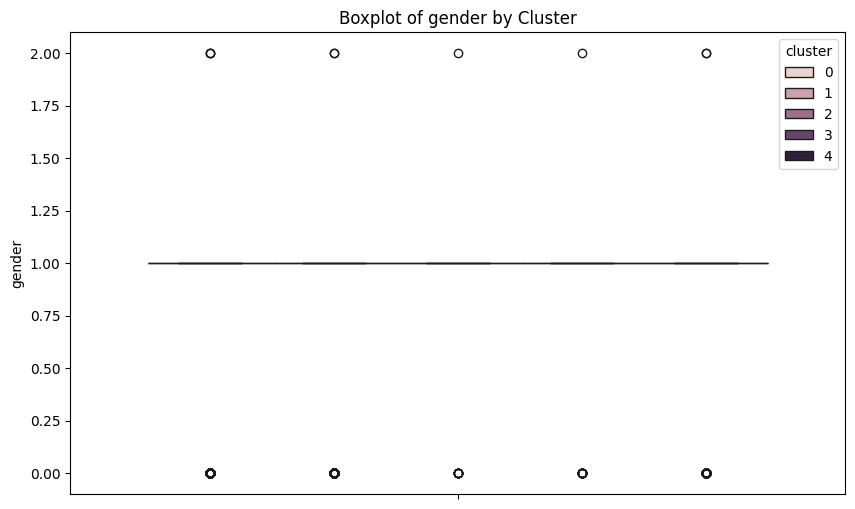

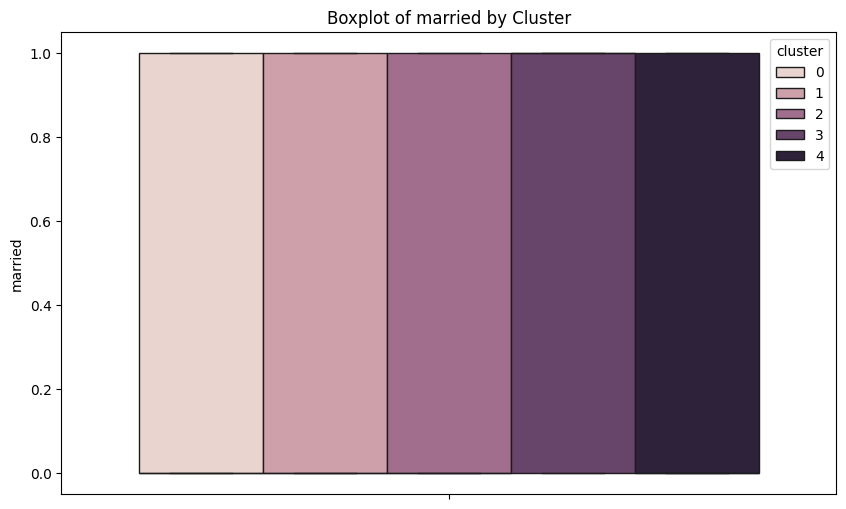

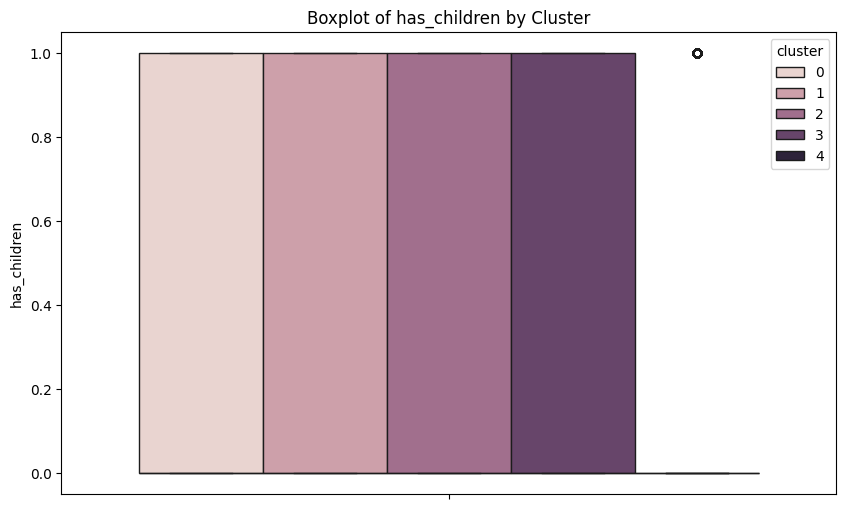

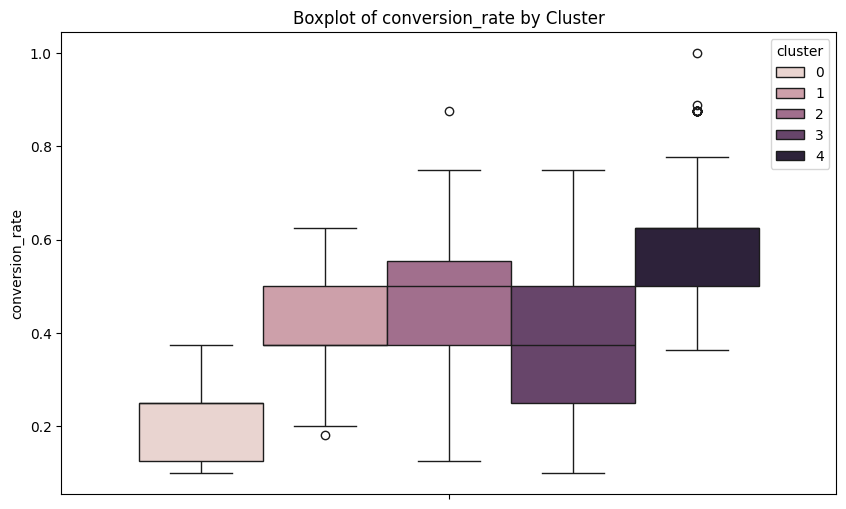

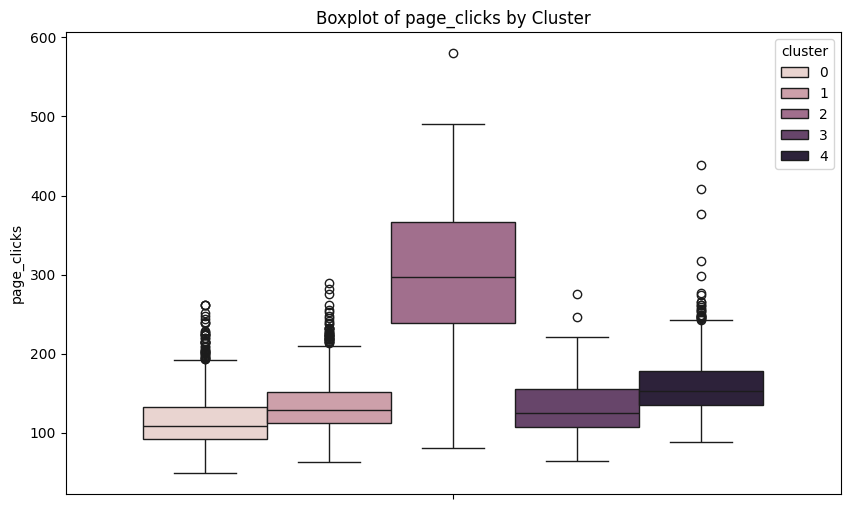

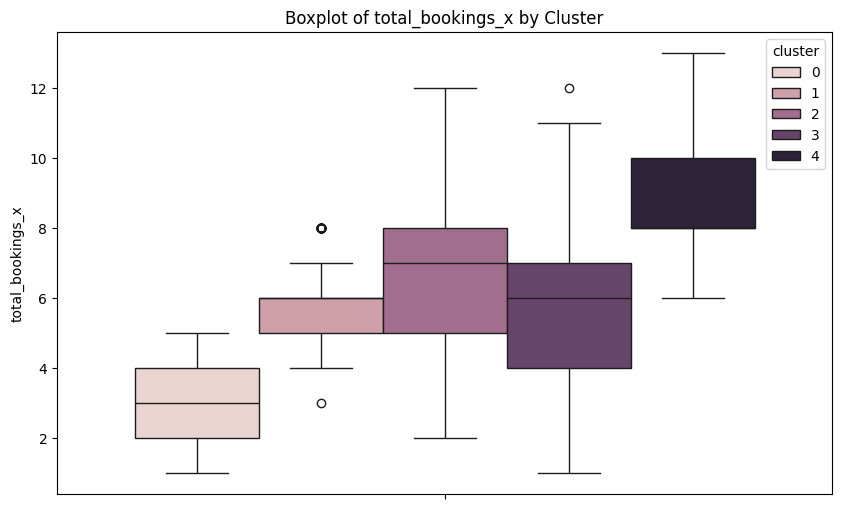

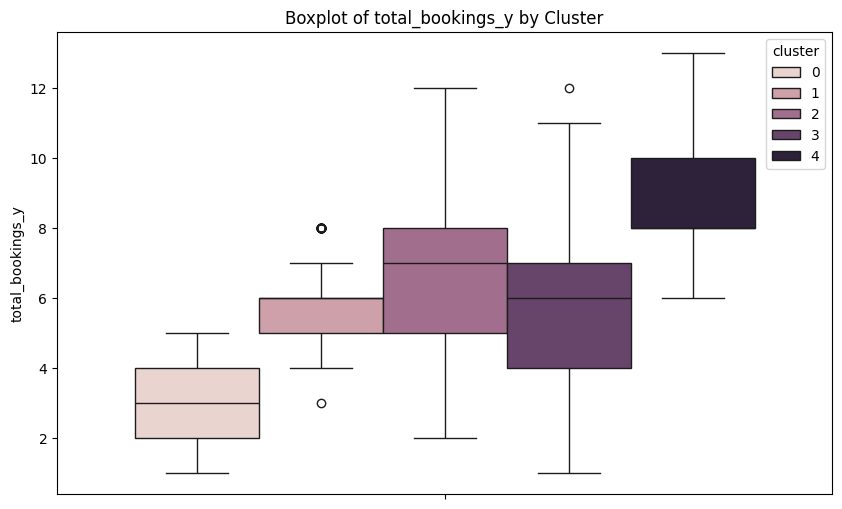

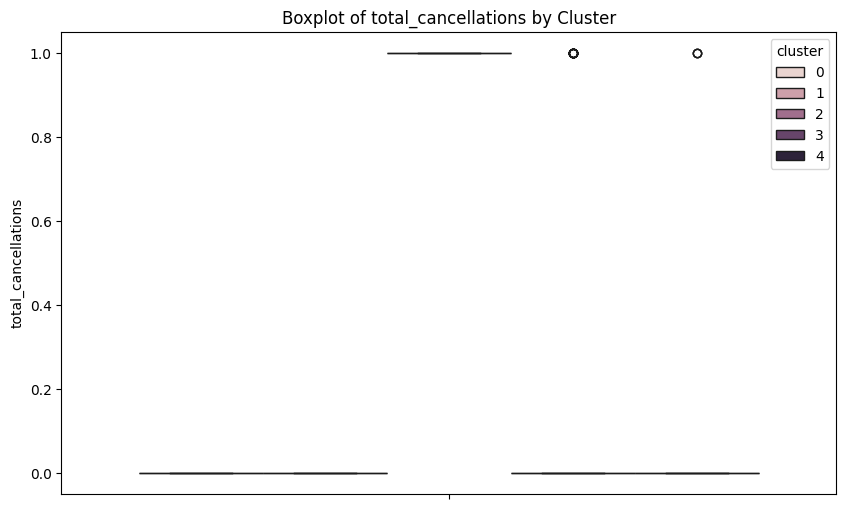

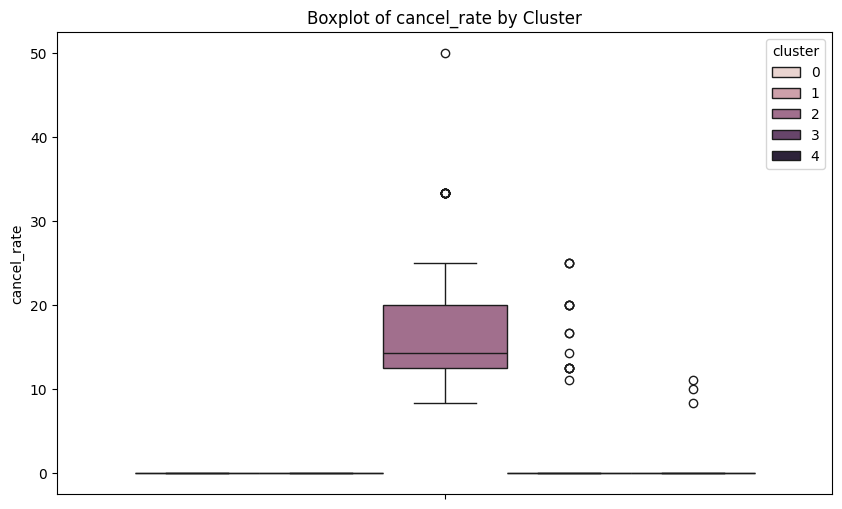

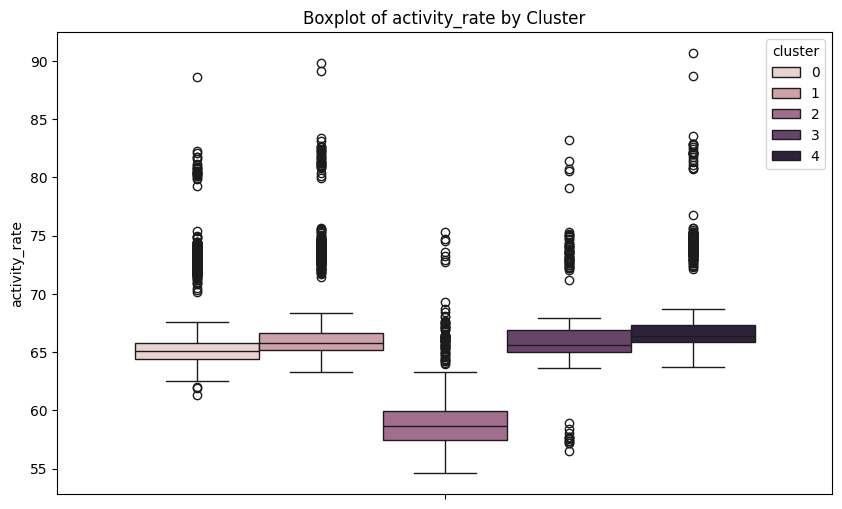

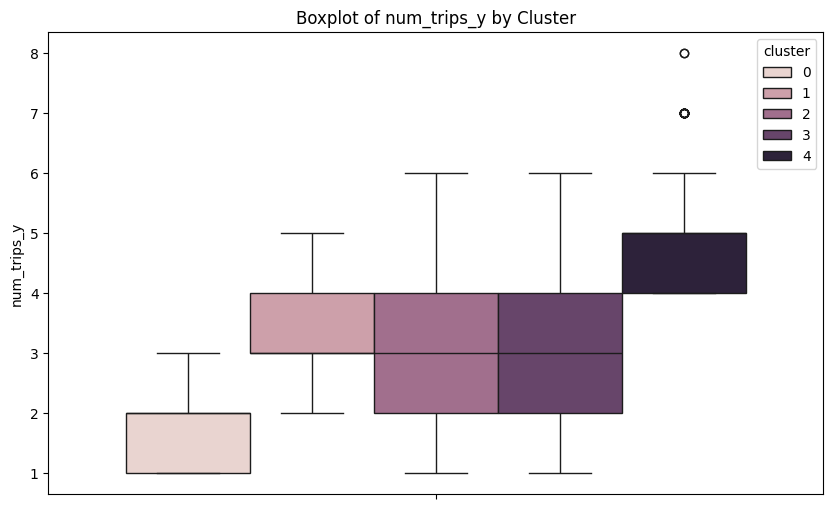

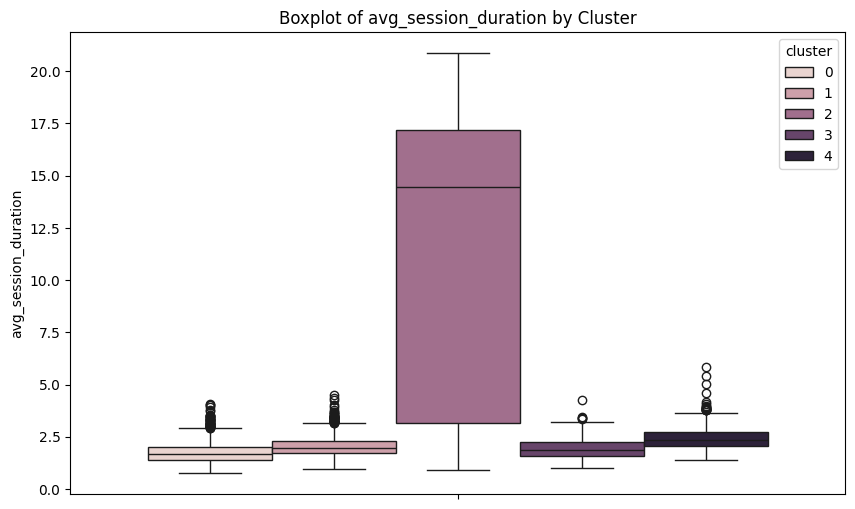

In [ ]:
# Ensure the 'cluster' column exists in the DataFrame
# (It already exists based on the output you've shared)

# Plot the boxplots for each feature, excluding 'cluster' column
for col in df_no_outliers.columns:
    if col not in ['cluster', 'cluster_label', 'age_group', 'marital_status', 'gender_status', 'has_children_status']:  # Exclude non-numeric or non-feature columns
        plt.figure(figsize=(10, 6))  # Optionally, adjust figure size
        sns.boxplot(data=df_no_outliers, y=col, hue='cluster')
        plt.title(f'Boxplot of {col} by Cluster')
        plt.show()


#### Demographic cluster analysis

In [ ]:
# Define the cluster labels
cluster_labels = {
    0: 'Low Spenders',
    1: 'High Spenders',
    2: 'Frequent Travelers ',
    3: 'Moderate Spenders',
    4: 'High Cancellation Rate'
}

# Map the cluster numbers in the DataFrame to the labels
df_no_outliers['cluster_label'] = df_no_outliers['cluster'].map(cluster_labels)

In [ ]:
# Define age groups
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=age_bins, labels=age_labels)

# Check the newly created age groups
df_no_outliers[['age', 'age_group']].head()

age age_group
0   53     51-60
1   52     51-60
2   44     41-50
4   52     51-60
5   41     41-50

<ipython-input-193-b5cedbbc08cd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_percentages = df_no_outliers.groupby(['cluster_label', 'age_group']).size().unstack().apply(lambda x: x / x.sum(), axis=1)


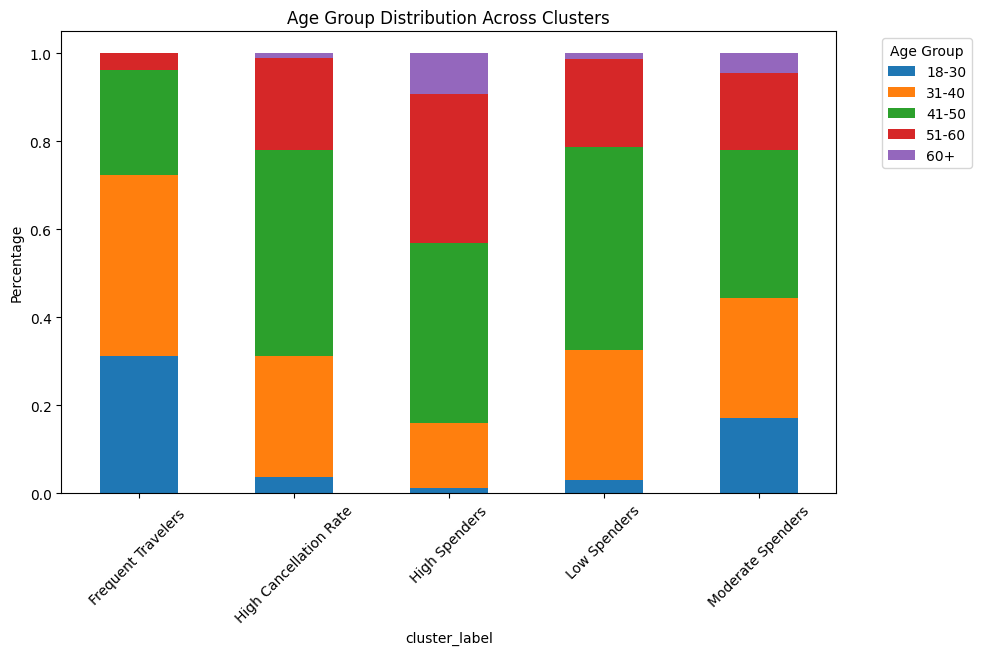

In [ ]:
# Group by the cluster label and age group
age_group_percentages = df_no_outliers.groupby(['cluster_label', 'age_group']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Transpose the data so that clusters are on the x-axis, and age groups are on the y-axis
age_group_percentages = age_group_percentages

# Plot the age group percentages with clusters on the x-axis and labels
age_group_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Age Group Distribution Across Clusters')
plt.ylabel('Percentage')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


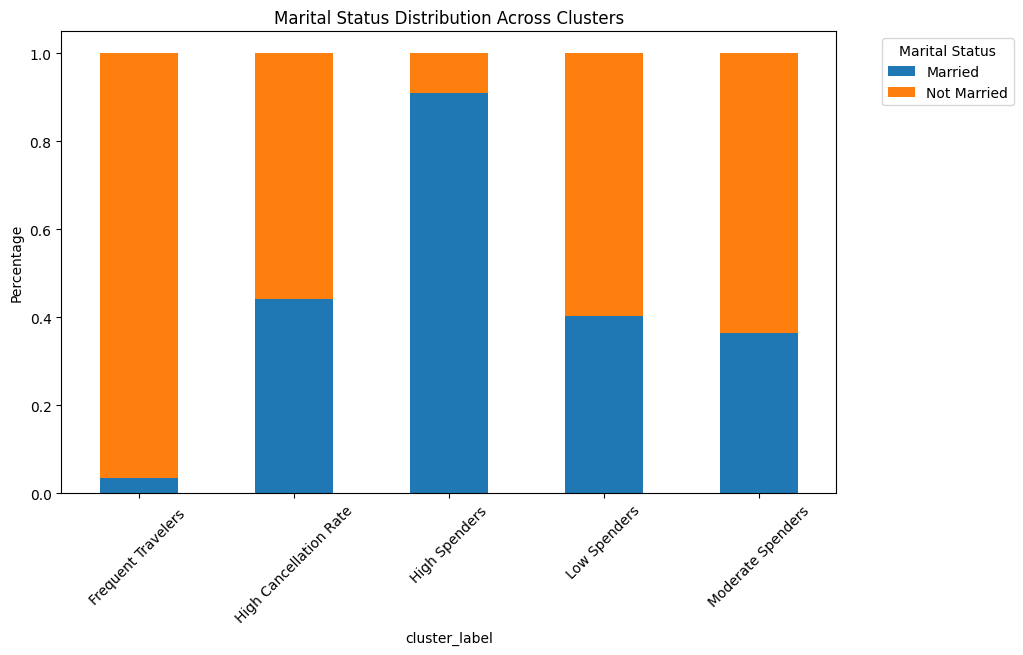

In [ ]:
# Assuming you have a 'married' column (1 for married, 0 for not married)
# Create a new column for the marital status in human-readable form
df_no_outliers['marital_status'] = df_no_outliers['married'].map({1: 'Married', 0: 'Not Married'})

# Group by the cluster label and marital status
marital_status_percentages = df_no_outliers.groupby(['cluster_label', 'marital_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Transpose the data so that clusters are on the x-axis, and marital status is on the y-axis
marital_status_percentages = marital_status_percentages

# Plot the marital status percentages with clusters on the x-axis
marital_status_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Marital Status Distribution Across Clusters')
plt.ylabel('Percentage')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


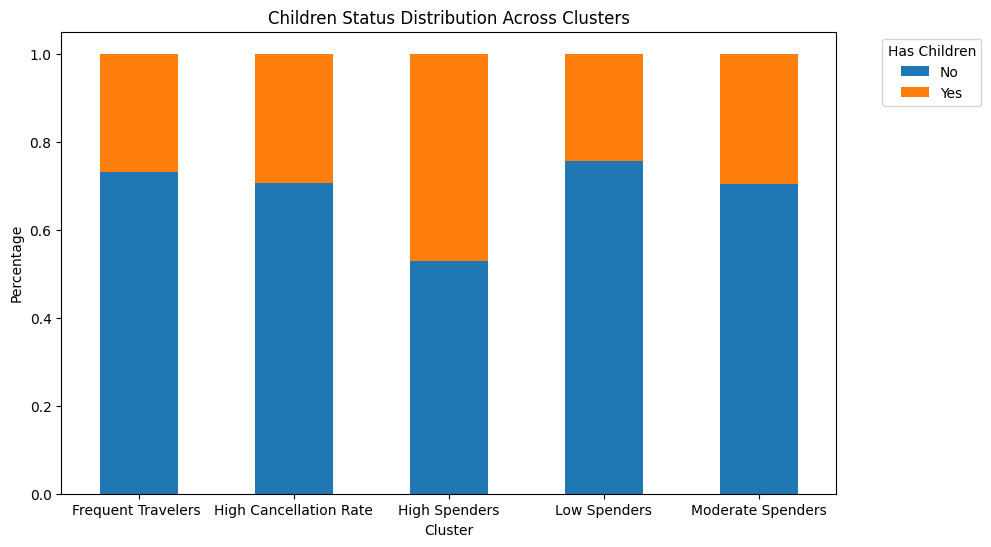

In [ ]:
# Assuming 'has_children' is 0 (No) and 1 (Yes)
# Map these values to readable labels
df_no_outliers['has_children_status'] = df_no_outliers['has_children'].map({0: 'No', 1: 'Yes'})

# Group by the cluster label and children status
children_percentages = df_no_outliers.groupby(['cluster_label', 'has_children_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Transpose the data so that clusters are on the x-axis, and 'has_children' status is on the y-axis
children_percentages = children_percentages

# Plot the 'has_children' percentages with clusters on the x-axis
children_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Children Status Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Has Children', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()
